# Exploratory Data Analysis

##### Before I move into the logistic regression portion of the project I am interested in what the data collected says about the performance of the teams. 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [6]:
stats_2019 = pd.read_csv('nfl_stats_2019.csv')

###### In this analysis, I'm interested in discovering what makes teams successful, which means it's important to define what success is. We'll call making the playoffs a success for all intense and purposes and will discuss this further later in the analysis. However, this means we need to only use data that occured prior to the playoffs which is up to week 17. 

In [8]:
#select only columns pre playoff 
data = stats_2019.loc[(stats_2019['Week_Of_Szn'].isin([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]))] 

In [9]:
#sanity check
print(data.shape)

(513, 74)


In [10]:
#sanity check 
data.loc[data['Team_Name']=='Jets']

Team_Name  Pts_Scored  Pts_Al  Win  TDs  First_Sc  Second_Sc  Third_Sc  \
261      Jets        16.0    17.0  0.0  1.0       6.0        0.0      10.0   
262      Jets         3.0    23.0  0.0  0.0       0.0        3.0       0.0   
263      Jets        14.0    30.0  0.0  0.0       0.0        0.0       7.0   
264      Jets         6.0    31.0  0.0  1.0       0.0        0.0       0.0   
265      Jets        24.0    22.0  1.0  3.0       7.0       14.0       0.0   
266      Jets         0.0    33.0  0.0  0.0       0.0        0.0       0.0   
267      Jets        15.0    29.0  0.0  2.0       7.0        0.0       0.0   
268      Jets        18.0    26.0  0.0  1.0       7.0        5.0       3.0   
269      Jets        34.0    27.0  1.0  3.0      14.0        0.0      10.0   
270      Jets        34.0    17.0  1.0  5.0       6.0       14.0       0.0   
271      Jets        34.0     3.0  1.0  3.0       3.0       10.0      21.0   
272      Jets         6.0    22.0  0.0  0.0       3.0        3.0       0.0   
273      Jets        22.0    21.0  1.0  2.0       0.0       16.0       0.0   
274      Jets        21.0    42.0  0.0  2.0       0.0        7.0       0.0   
275      Jets        16.0    10.0  1.0  1.0       7.0        3.0       3.0   
276      Jets        13.0     6.0  1.0  1.0       0.0        3.0       0.0   

     Fourth_Sc  First_Al  ...  Penalties  Penalty_Gm  Penalty_Yds_Gm  \
261        0.0       0.0  ...       8-67         8.0            67.0   
262        0.0       6.0  ...      12-89        12.0            89.0   
263        7.0      13.0  ...       5-67         5.0            67.0   
264        6.0      14.0  ...       9-52         9.0            52.0   
265        3.0       0.0  ...      8-105         8.0           105.0   
266        0.0      17.0  ...       8-60         8.0            60.0   
267        8.0      13.0  ...      10-83        10.0            83.0   
268        3.0       0.0  ...     10-105        10.0           105.0   
269       10.0       0.0  ...       7-54         7.0            54.0   
270       14.0       0.0  ...       6-55         6.0            55.0   
271        0.0       3.0  ...       4-37         4.0            37.0   
272        0.0       7.0  ...     10-106        10.0           106.0   
273        6.0       3.0  ...       5-88         5.0            88.0   
274       14.0      13.0  ...       8-94         8.0            94.0   
275        3.0       0.0  ...       3-30         3.0            30.0   
276       10.0       0.0  ...       2-13         2.0            13.0   

     Playoff_app_5_yrs  Superbowl_Win  Draft_Pos  Week_Of_Szn  Perc_Pro_Bowl  \
261                0.0            0.0        3.0          1.0       0.056604   
262                0.0            0.0        3.0          2.0       0.056604   
263                0.0            0.0        3.0          3.0       0.056604   
264                0.0            0.0        3.0          5.0       0.056604   
265                0.0            0.0        3.0          6.0       0.056604   
266                0.0            0.0        3.0          7.0       0.056604   
267                0.0            0.0        3.0          8.0       0.056604   
268                0.0            0.0        3.0          9.0       0.056604   
269                0.0            0.0        3.0         10.0       0.056604   
270                0.0            0.0        3.0         11.0       0.056604   
271                0.0            0.0        3.0         12.0       0.056604   
272                0.0            0.0        3.0         13.0       0.056604   
273                0.0            0.0        3.0         14.0       0.056604   
274                0.0            0.0        3.0         15.0       0.056604   
275                0.0            0.0        3.0         16.0       0.056604   
276                0.0            0.0        3.0         17.0       0.056604   

                Opp_Name    Year  
261         BillsBuffalo  2019.0  
262      BrownsClevel

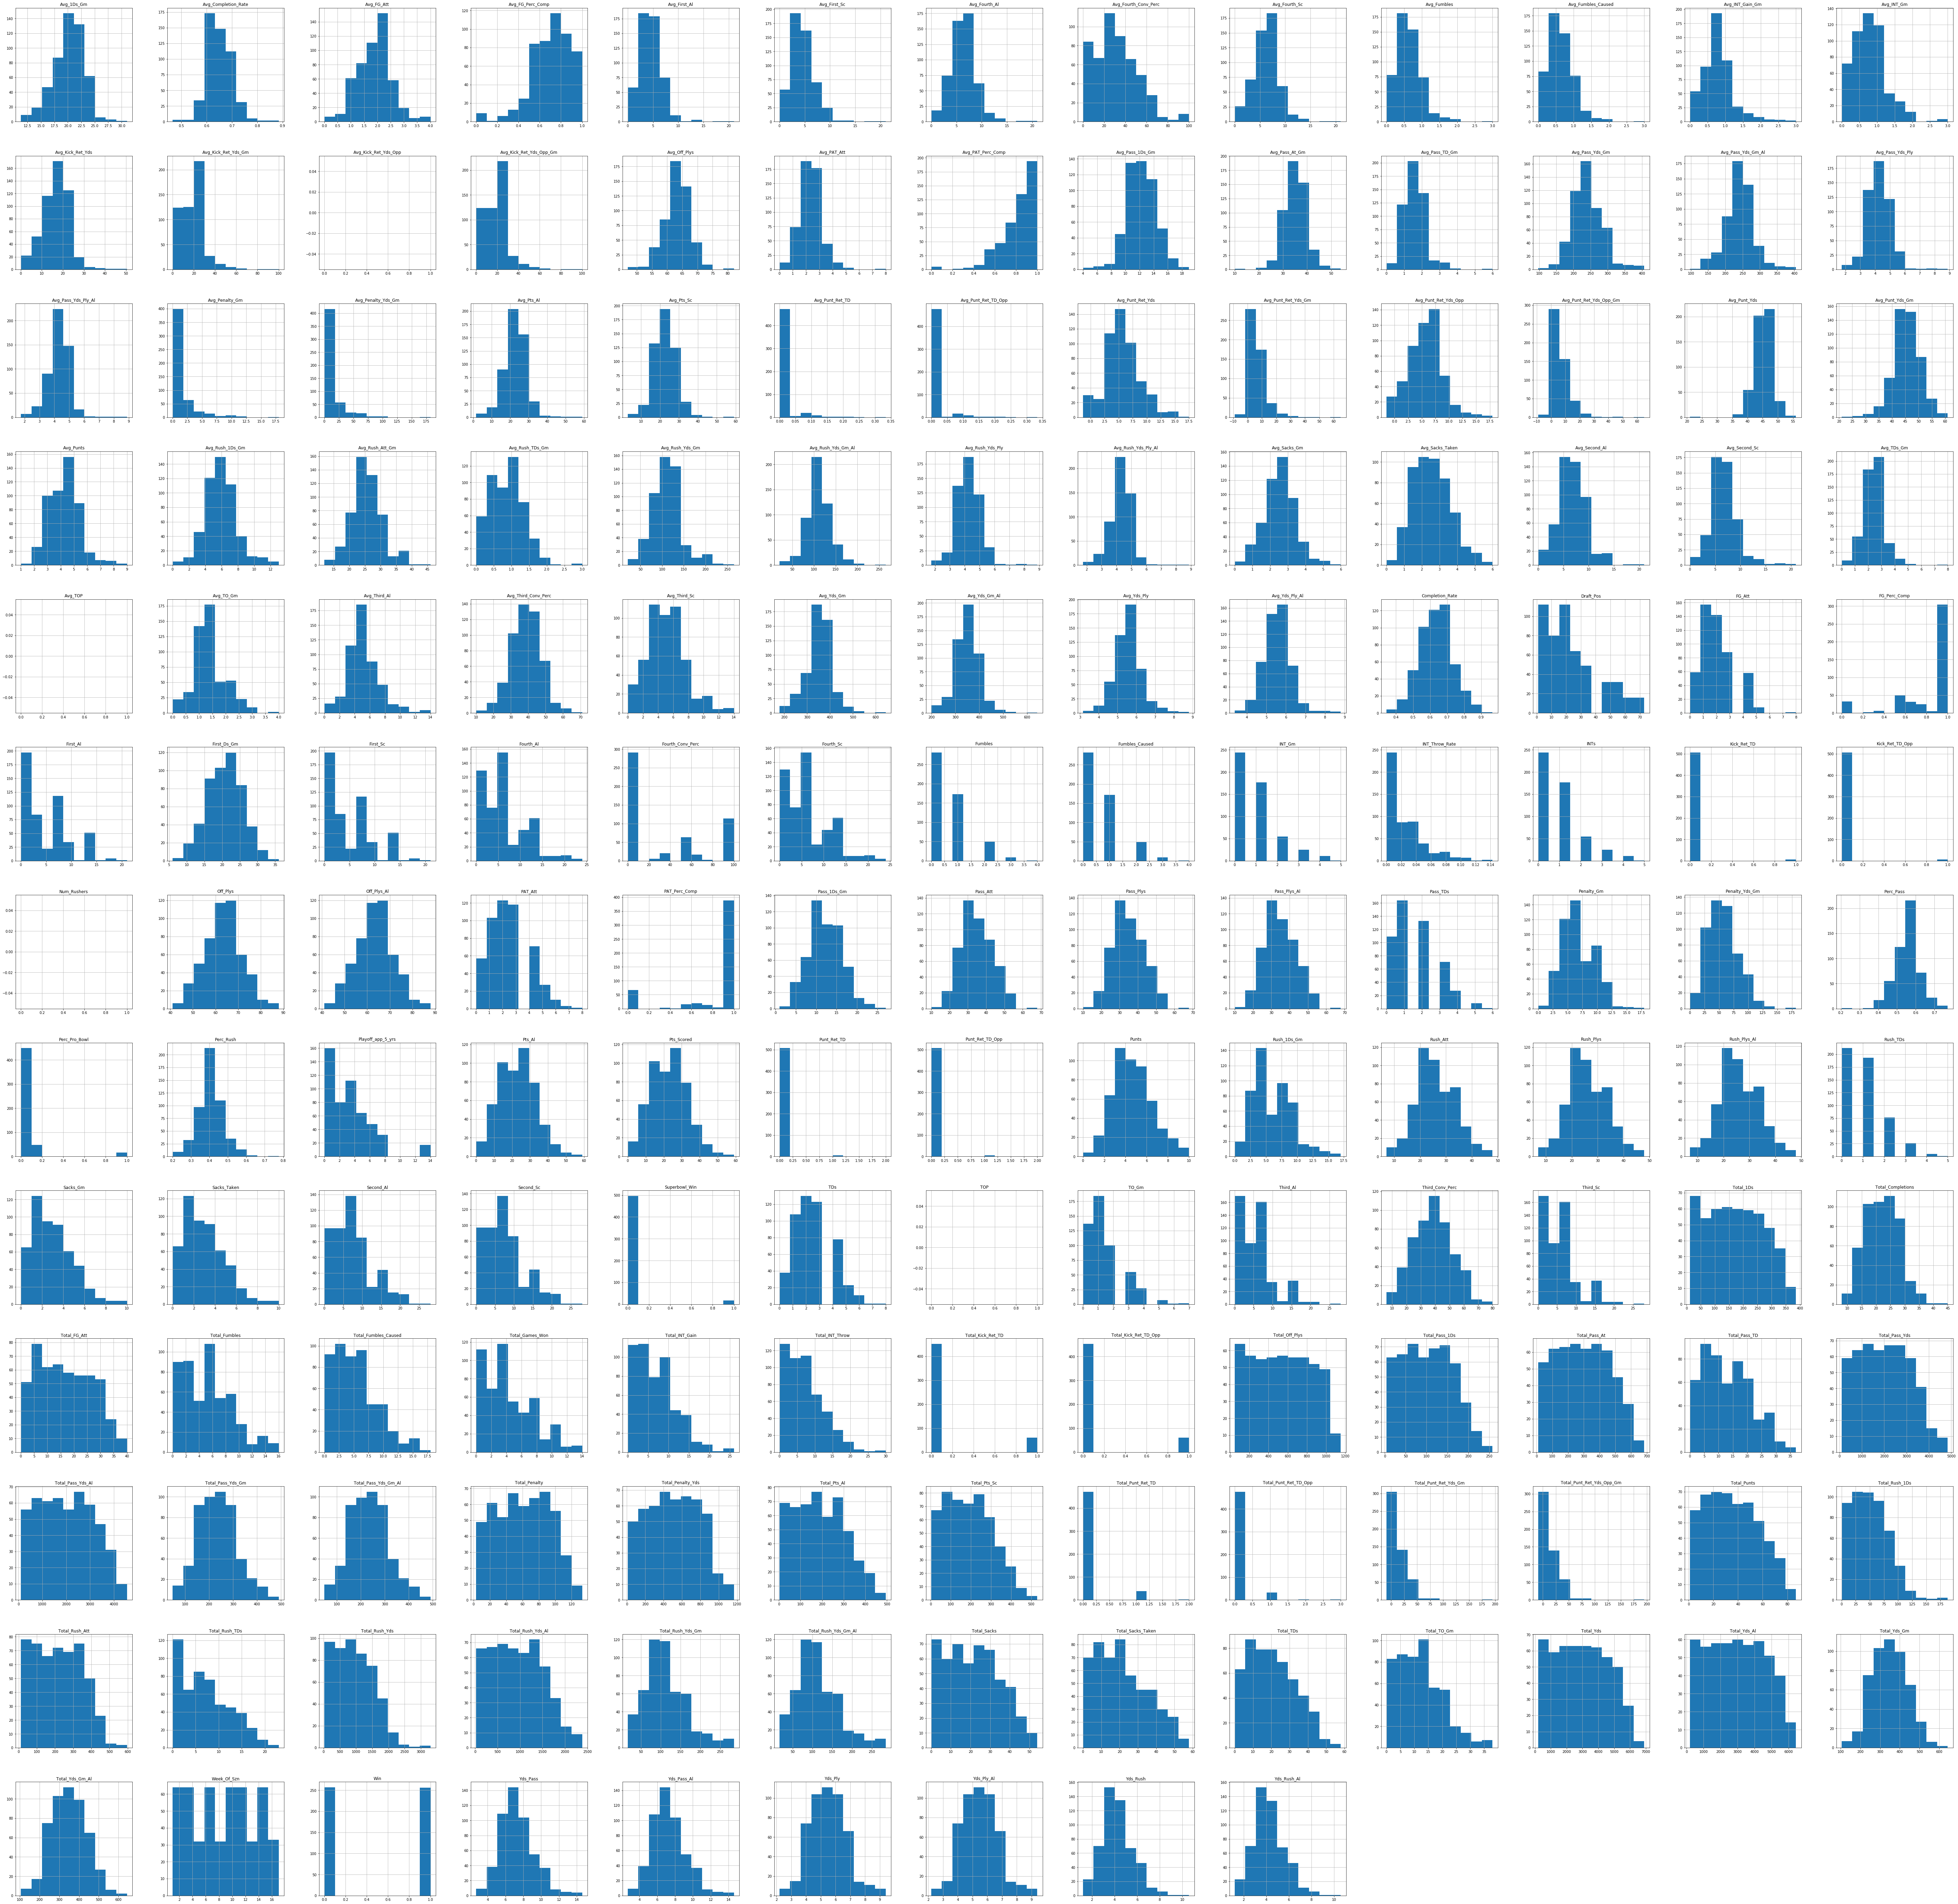

In [7]:
data.hist(figsize=[100,100]);

### Breaking down the analysis

###### Without doing any official analysis, as a long time football fan there are a few things that come to mind when I think about what might make a team effective. Wins and losses are what I'll be trying to predict later in the process but the analysis will focus on discovering factors which lead to success. 

###### Let's keep in mind that the teams which made it to the playoffs in 2019 were:

 - AFC:
     - Baltimore Ravens
     - Kansas City Chiefs
     - New England Patriots
     - Houston Texans
     - Buffalo Bills 
     - Tennessee Titans

 - NFC:
     - San Francisco 49ers 
     - Green Bay Packers
     - New Orleans Saints
     - Philadelphia Eagles
     - Seattle Seahawks
     - Minnesota Vikings
     
###### And the final four were:

    - Green Bay Packers
    - San Francisco 49ers 
    - Tenessee Titans 
    - Kansas City Chiefs
    
###### And the Superbowl was:

    -San Francisco 49ers
    -Kansas City Chiefs (winners)
    
###### At the end of the day winning is what matters, which is why that's what I'll be predicting. As we're working thru the exploration of the data I'll continue to reference this list to assess how the teams who won got there - which factors seem to lead to success? 

###### I'll work through this information somewhat incrementally but sometimes borrow from other disciplines. The rough outline will be:

1. Offense/Scoring
2. Defense
3. Special Teams
4. Misc. 

##### Let's begin.

### Offense & Scoring

##### First, let's look at total yardage and scoring by team.

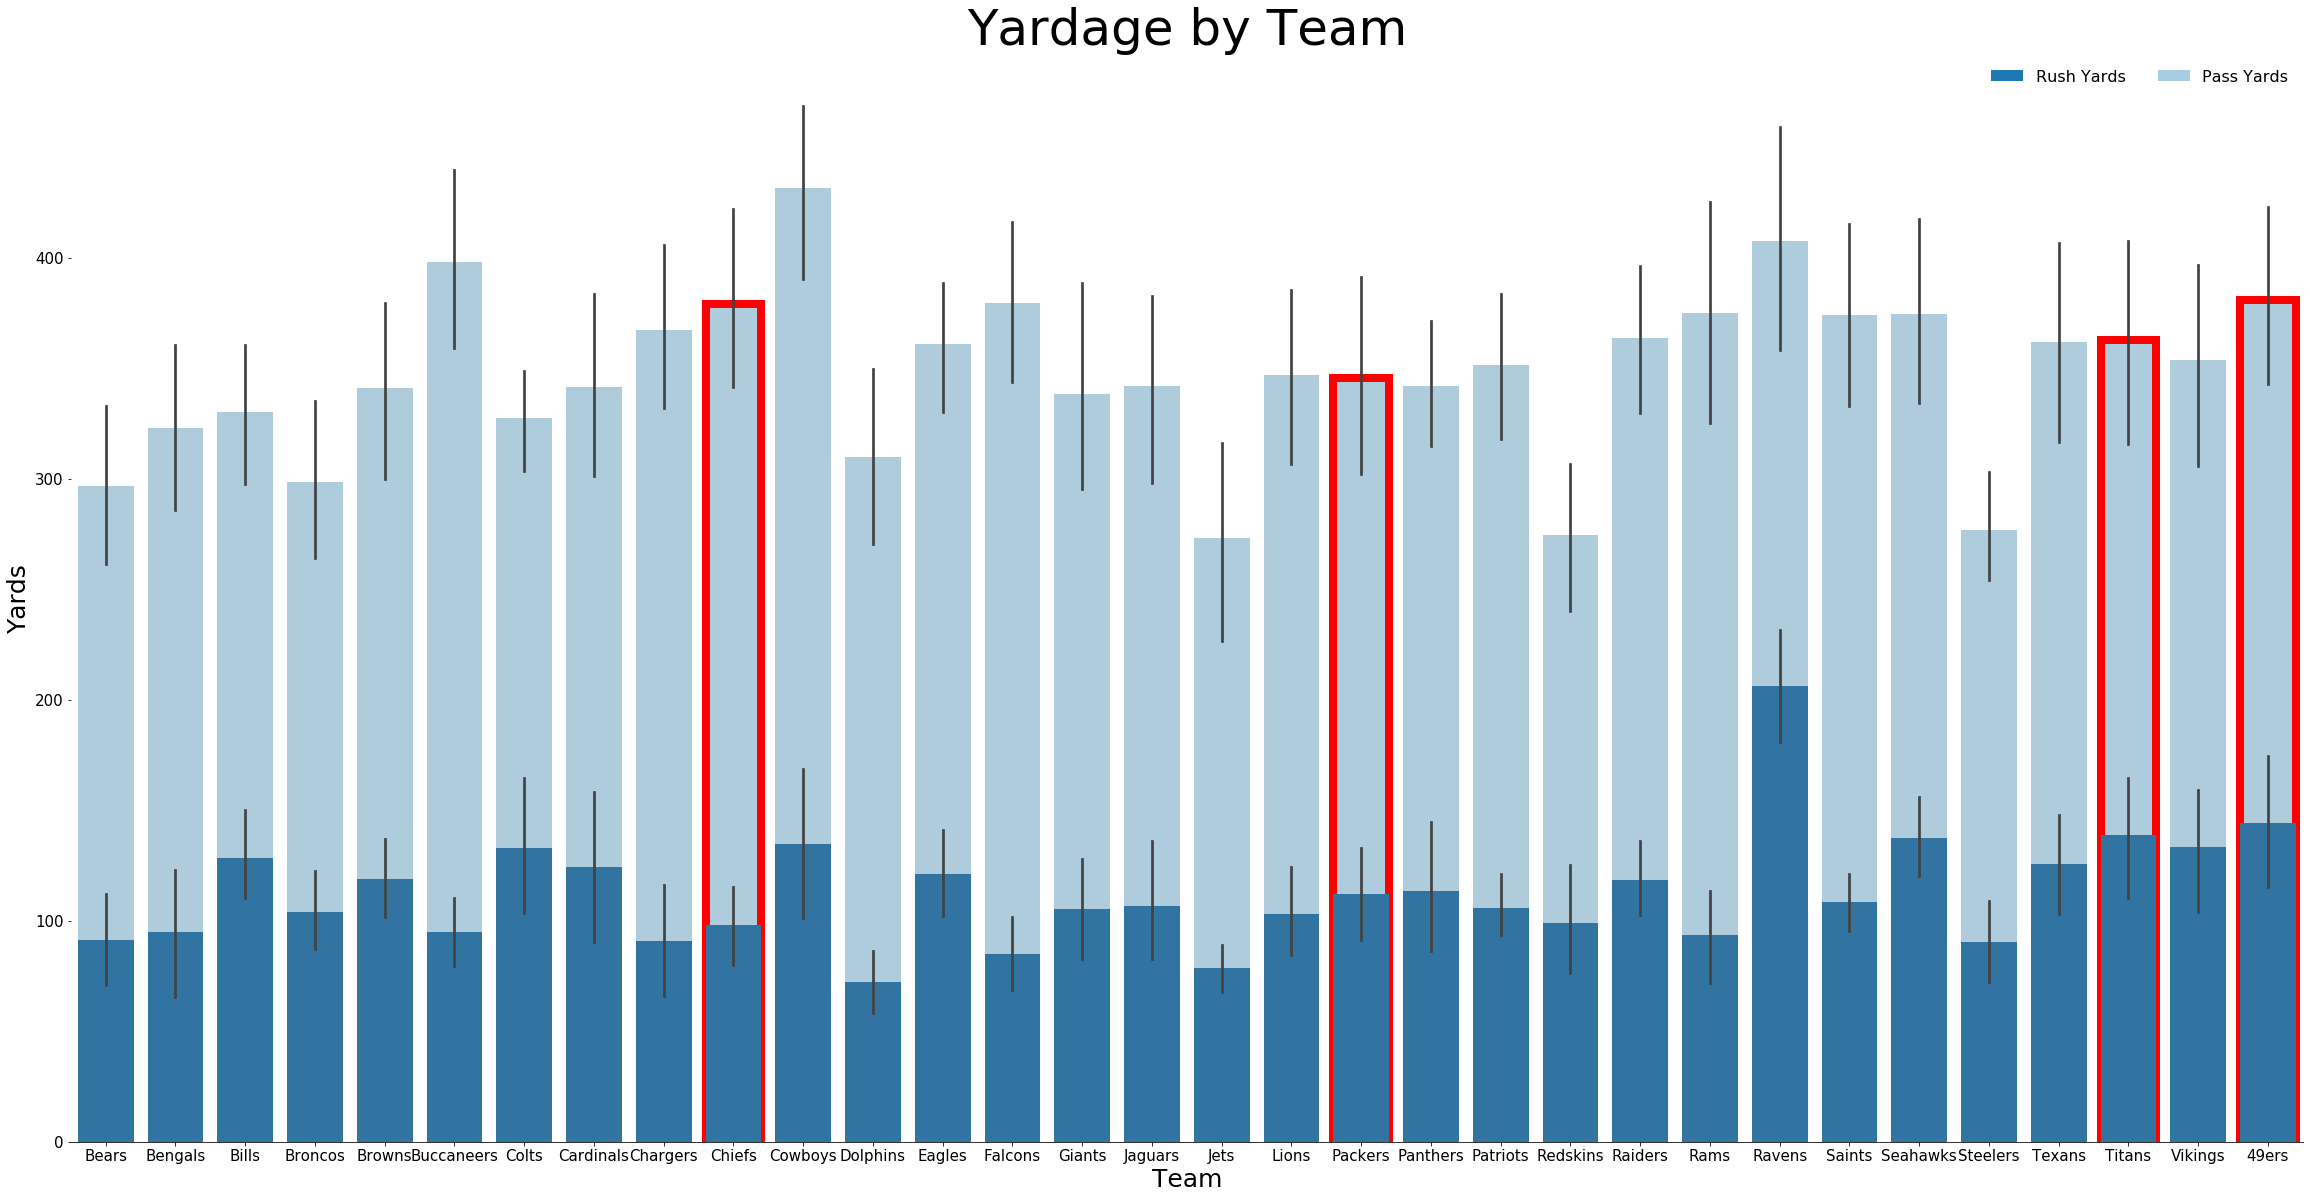

In [16]:
#prep data 
stacked_bar_data = data
stacked_bar_data["total"] = stacked_bar_data['Total_Rush_Yds_Gm'] + stacked_bar_data['Total_Pass_Yds_Gm']
palette = iter(sns.color_palette("Paired", 2))

#plot top series
top_plot = sns.barplot(x = stacked_bar_data['Team_Name'], y = stacked_bar_data.total, color = next(palette))

#plot bottom series
bottom_plot = sns.barplot(x = stacked_bar_data['Team_Name'], y = stacked_bar_data['Total_Rush_Yds_Gm'], 
                          color = next(palette))

# Loop over the bars to set unique edgecolor for top 4
for thisbar in top_plot.patches:
    # Set a different hatch for each bar
    if thisbar == top_plot.patches[9]:
        thisbar.set_edgecolor("red")
        thisbar.set_linewidth(8)
    elif thisbar == top_plot.patches[18]:
        thisbar.set_edgecolor("red")
        thisbar.set_linewidth(8)
    elif thisbar == top_plot.patches[29]:
        thisbar.set_edgecolor("red")
        thisbar.set_linewidth(8)
    elif thisbar == top_plot.patches[31]:
        thisbar.set_edgecolor("red")
        thisbar.set_linewidth(8)  
    else:
        continue 

#prep plot
palette = iter(sns.color_palette("Paired", 2))

topbar = plt.Rectangle((0,0),1,1,fc=next(palette), edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc=next(palette),  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Rush Yards', 'Pass Yards'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

#graph beautifucation
sns.set_context({"figure.figsize": (40, 20)})
sns.despine(left=True)
bottom_plot.set_ylabel("Yards")
bottom_plot.set_xlabel("Team")
bottom_plot.set_title("Avg Yardage by Team", fontsize=50)

#font regularization
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label]):
    item.set_fontsize(25)
    
for item in (bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(15)

##### Interesting - the top yardage teams didn't exactly coordinate with the top four teams from the year but it's not far off either. It's not exactly clear from the graph who had the most yards so let's take the guess work out of it.

In [9]:
data.nlargest(14, ['Total_Yds'])['Team_Name'].unique()

array(['Cowboys', 'Ravens', 'Buccaneers', '49ers', 'Falcons', 'Chiefs',
       'Rams', 'Seahawks', 'Saints', 'Patriots'], dtype=object)

###### Looking at the top 10 by yardage we see four of the top five (Cowboys/Buccaneers/falcons/rams) didn't even make the playoffs. In the two spot the ravens made it, and we see our superbowl contenders in the 4th and 6th spots. Of the top 10, six went to the playoffs. So it looks like yardage is probably important but certainly coudln't be used as a sole predictor.  

##### Let's examine scoring now. 

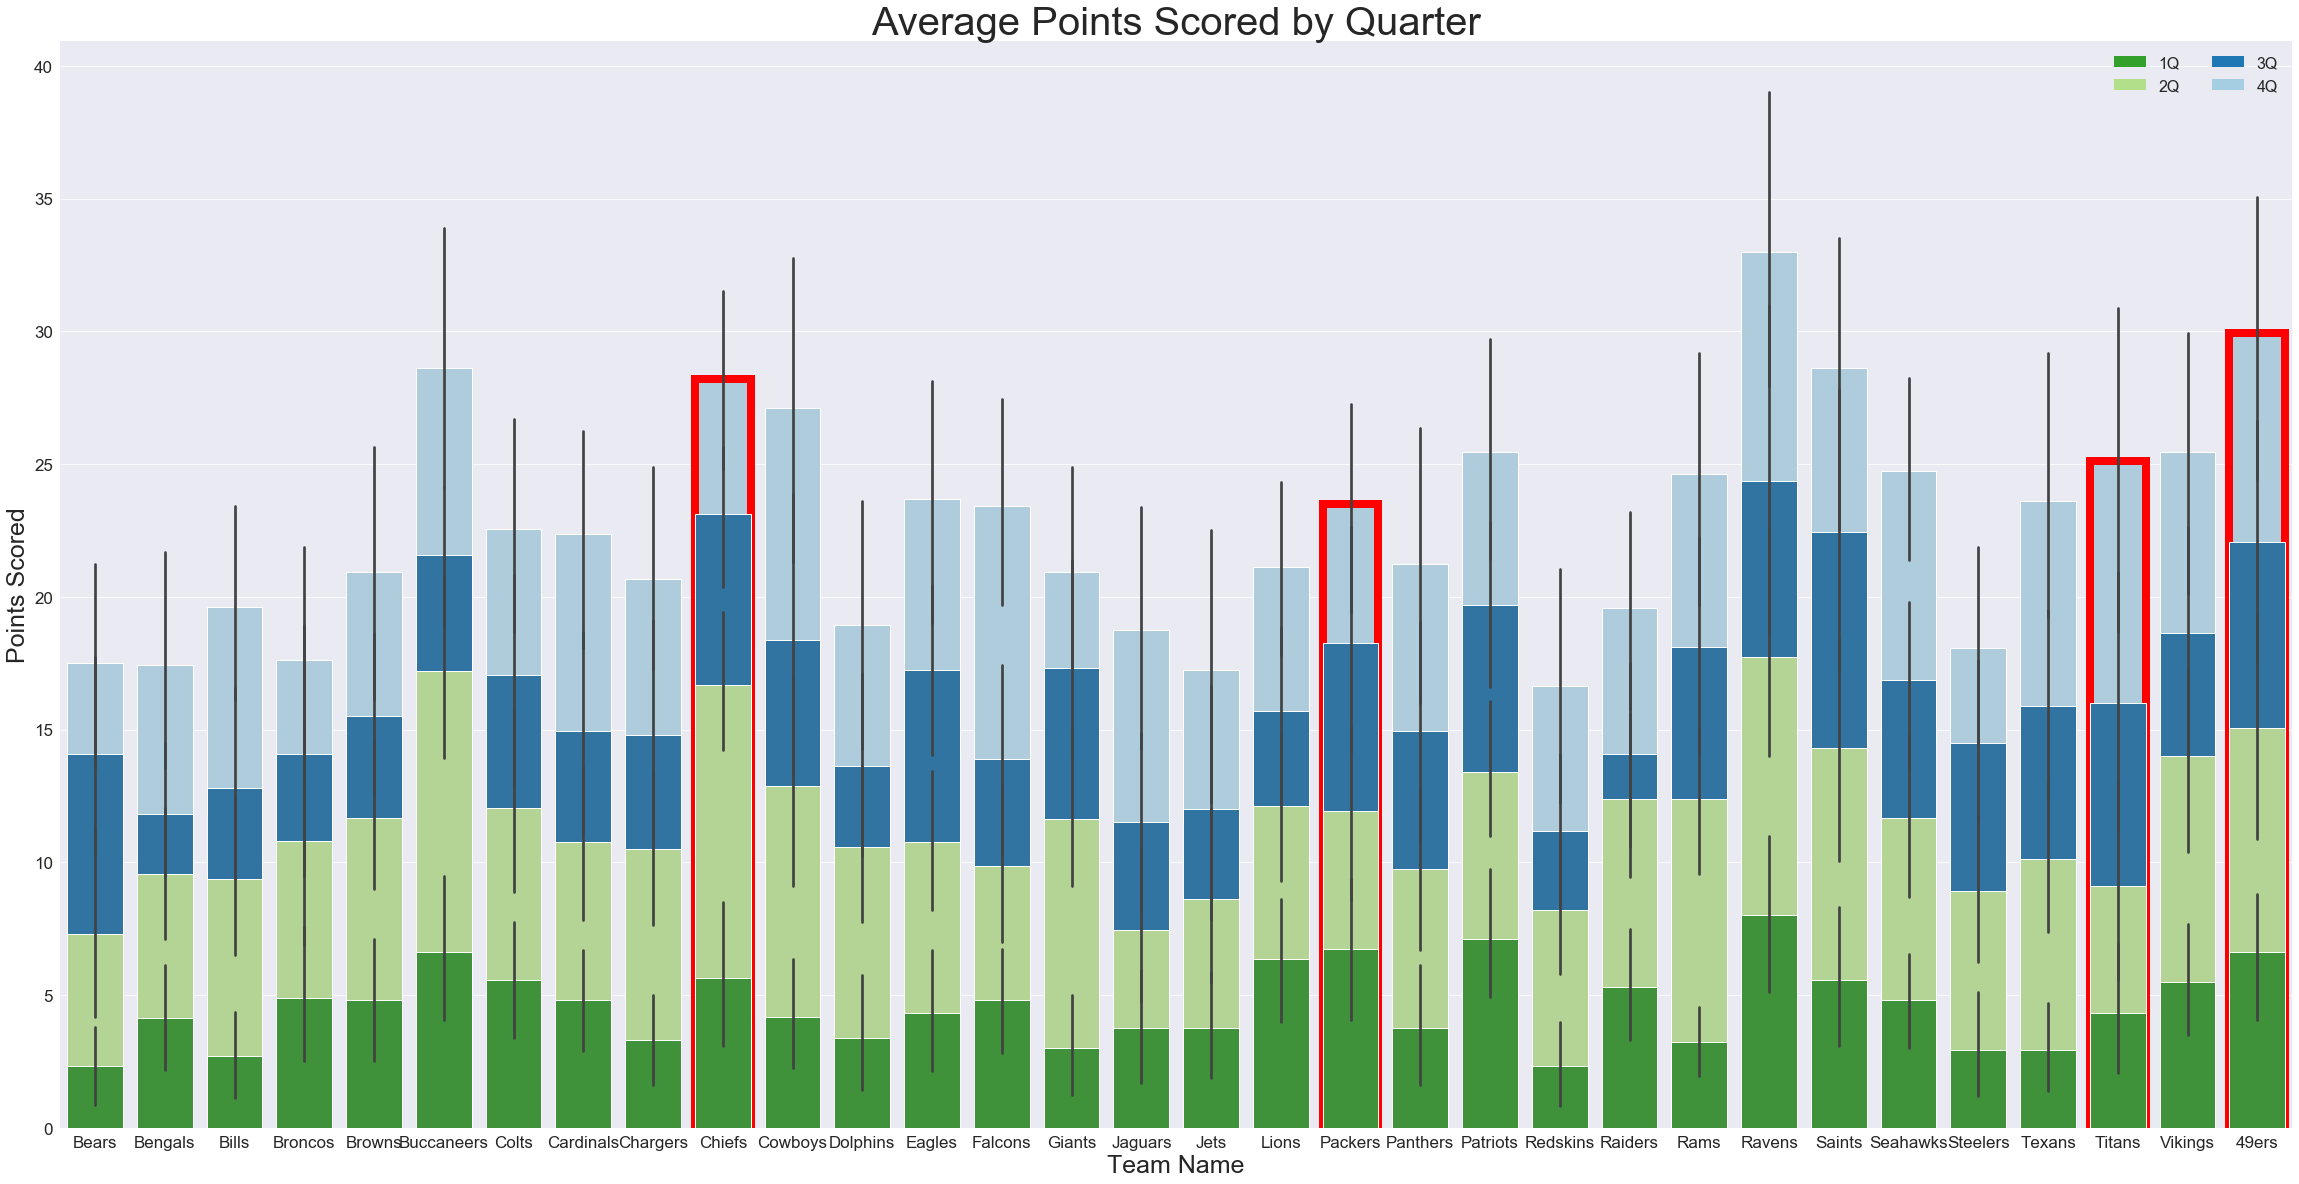

In [10]:
#setup
stacked_bar_data = data
stacked_bar_data["total"] = (stacked_bar_data.First_Sc + stacked_bar_data.Second_Sc + stacked_bar_data.Third_Sc +
stacked_bar_data.Fourth_Sc)
stacked_bar_data['third'] = (stacked_bar_data.First_Sc + stacked_bar_data.Second_Sc + stacked_bar_data.Third_Sc)
stacked_bar_data['second'] = (stacked_bar_data.First_Sc + stacked_bar_data.Second_Sc)

#Set general plot properties
sns.set_style("darkgrid")
sns.set_context({"figure.figsize": (40, 20)})
palette = iter(sns.color_palette("Paired", 4))

#plot
fourQ = sns.barplot(x = stacked_bar_data.Team_Name, y = stacked_bar_data.total, color = next(palette))

threeQ = sns.barplot(x = stacked_bar_data.Team_Name, y = stacked_bar_data.third, color = next(palette))

twoQ = sns.barplot(x = stacked_bar_data.Team_Name, y = stacked_bar_data.second, color=next(palette))

oneQ = sns.barplot(x = stacked_bar_data.Team_Name, y = stacked_bar_data.First_Sc, color =next(palette))

palette = iter(sns.color_palette("Paired", 4))

# Loop over the bars to set unique edgecolor for top 4
for thisbar in fourQ.patches:
    # Set a different hatch for each bar
    if thisbar == fourQ.patches[9]:
        thisbar.set_edgecolor("red")
        thisbar.set_linewidth(8)
    elif thisbar == fourQ.patches[18]:
        thisbar.set_edgecolor("red")
        thisbar.set_linewidth(8)
    elif thisbar == fourQ.patches[29]:
        thisbar.set_edgecolor("red")
        thisbar.set_linewidth(8)
    elif thisbar == fourQ.patches[31]:
        thisbar.set_edgecolor("red")
        thisbar.set_linewidth(8)  
    else:
        continue

#more settings
leg4 = plt.Rectangle((0,0),1,1,fc=next(palette), edgecolor = 'none')
leg3 = plt.Rectangle((0,0),1,1,fc=next(palette), edgecolor = 'none')
leg2 = plt.Rectangle((0,0),1,1,fc=next(palette), edgecolor = 'none')
leg1 = plt.Rectangle((0,0),1,1,fc=next(palette),  edgecolor = 'none')
l = plt.legend([leg1, leg2, leg3, leg4], ['1Q', '2Q', '3Q','4Q'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

#Labeling
sns.despine(left=True)
fourQ.set_ylabel("Points Scored")
fourQ.set_xlabel("Team Name")
fourQ.set_title("Average Points Scored by Quarter", fontsize=40)

#Set fonts to consistent 16pt size
for item in ([fourQ.xaxis.label, fourQ.yaxis.label]):
    item.set_fontsize(25)
    
for item in (fourQ.get_xticklabels() + fourQ.get_yticklabels()):
    item.set_fontsize(17)

##### A quick glance at this graph demonstrates that average scoring is, like yardage, probably a good predictor of success as well, but not completely accurate. 

##### Let's look at total points too.

In [11]:
teams = data.Team_Name.unique()
Total_Scores = {}

for team in teams:
    Total_Scores.update({team : data.loc[data['Team_Name'] == team]['Pts_Scored'].sum()})

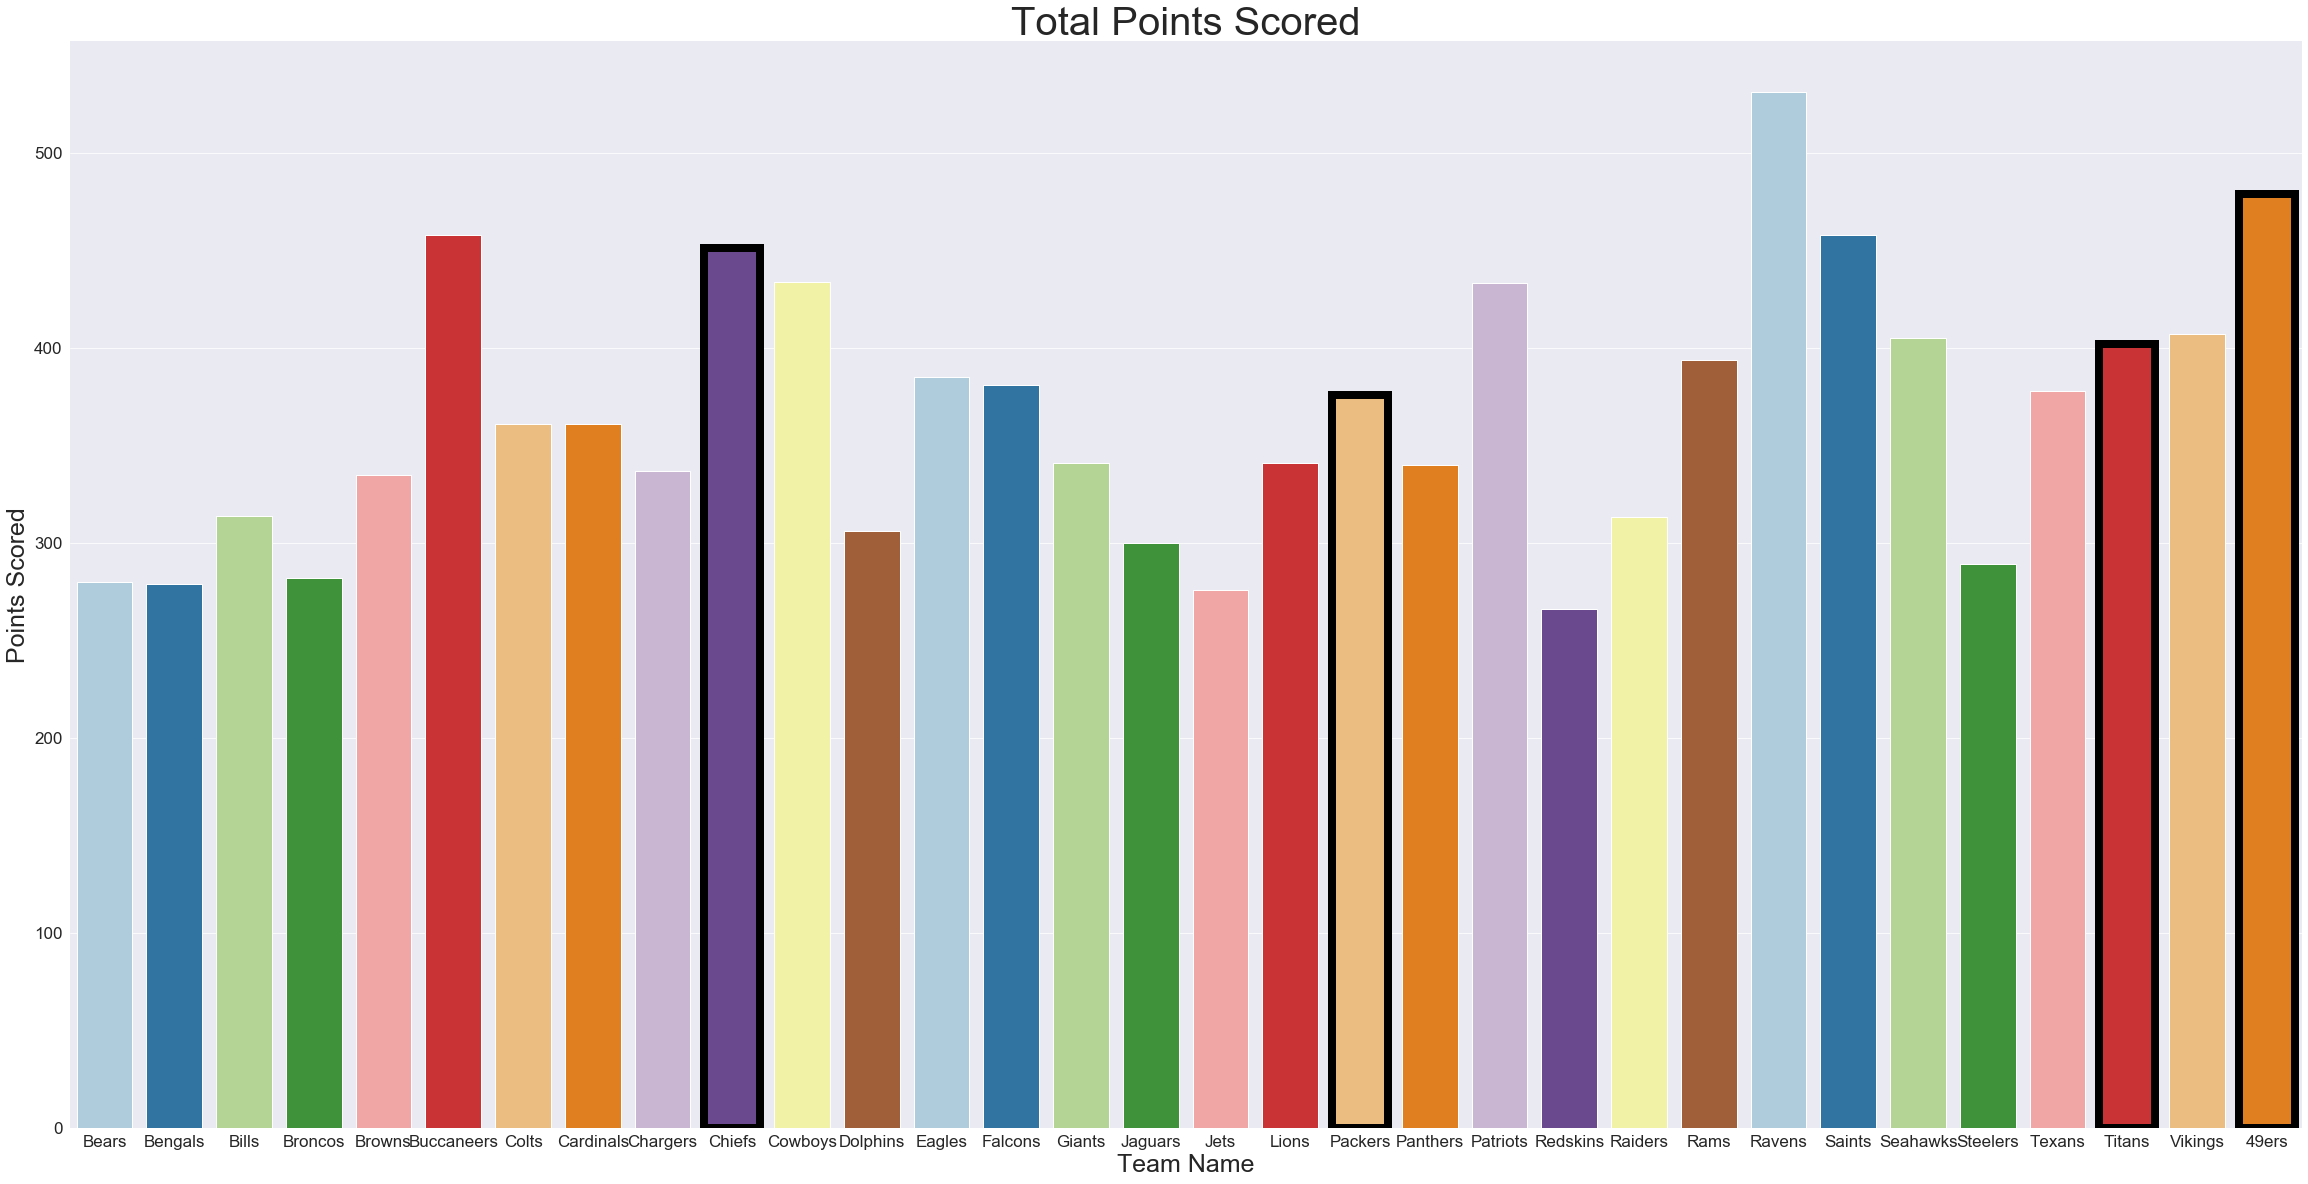

In [12]:
sns.set_style("darkgrid")
sns.set_context({"figure.figsize": (40, 20)})

scores = sns.barplot(x=list(Total_Scores.keys()), y=list(Total_Scores.values()), 
                     palette = sns.color_palette('Paired',32))

for thisbar in scores.patches:
    # Set a different hatch for each bar
    if thisbar == scores.patches[9]:
        thisbar.set_edgecolor("black")
        thisbar.set_linewidth(8)
    elif thisbar == scores.patches[18]:
        thisbar.set_edgecolor("black")
        thisbar.set_linewidth(8)
    elif thisbar == scores.patches[29]:
        thisbar.set_edgecolor("black")
        thisbar.set_linewidth(8)
    elif thisbar == scores.patches[31]:
        thisbar.set_edgecolor("black")
        thisbar.set_linewidth(8)  
    else:
        continue
        
        #Labeling
sns.despine(left=True)
scores.set_ylabel("Points Scored")
scores.set_xlabel("Team Name")
scores.set_title("Total Points Scored", fontsize=40)

#Set fonts to consistent 16pt size
for item in ([scores.xaxis.label, scores.yaxis.label]):
    item.set_fontsize(25)
    
for item in (scores.get_xticklabels() + scores.get_yticklabels()):
    item.set_fontsize(17)

##### Just by looking it's clear the SB contenders are in the top quarter of scoring, but let's look more specifically

In [13]:
Sorted_Scores = sorted(Total_Scores.items(), key=lambda x: x[1], reverse=True)

for i in Sorted_Scores:
    print(i[0], i[1])

Ravens 531
49ers 479
Buccaneers 458
Saints 458
Chiefs 451
Cowboys 434
Patriots 433
Vikings 407
Seahawks 405
Titans 402
Rams 394
Eagles 385
Falcons 381
Texans 378
Packers 376
Colts 361
Cardinals 361
Giants 341
Lions 341
Panthers 340
Chargers 337
Browns 335
Bills 314
Raiders 313
Dolphins 306
Jaguars 300
Steelers 289
Broncos 282
Bears 280
Bengals 279
Jets 276
Redskins 266


##### Looking at our top ten scorers we see again that both SB contenders and several other playoff teams are present. The Eagles(12th), Bills(23rd), and Texans(14th) are the only playoff contenders who don't breach the top 10. 

##### Even more intersting is that we find the Buccaneers(7-9) & Cowboys(8-8), two teams who didn't make the playoffs in the top 10. These teams demonstrate some firepower on offense coming in at the top of both the yardage and scoring sections but don't make the cut in the playoffs. It's not as if they're in high powered divisions either - the winners went to playofs with a 13-3 and 9-7 records respectively. 

#### I'll admit at this point that I am sadly a Washington Football Team Fan. Yes, you've not seen this name in any "top lists" so far and I doubt you will. Yes, have pity on me.

##### While it's clear that an explosive offense is helpful but not the whole picture, I'd like to keep digging into the offensive stats. Let's explore other attributes that may contribute to yardage and points scored. 

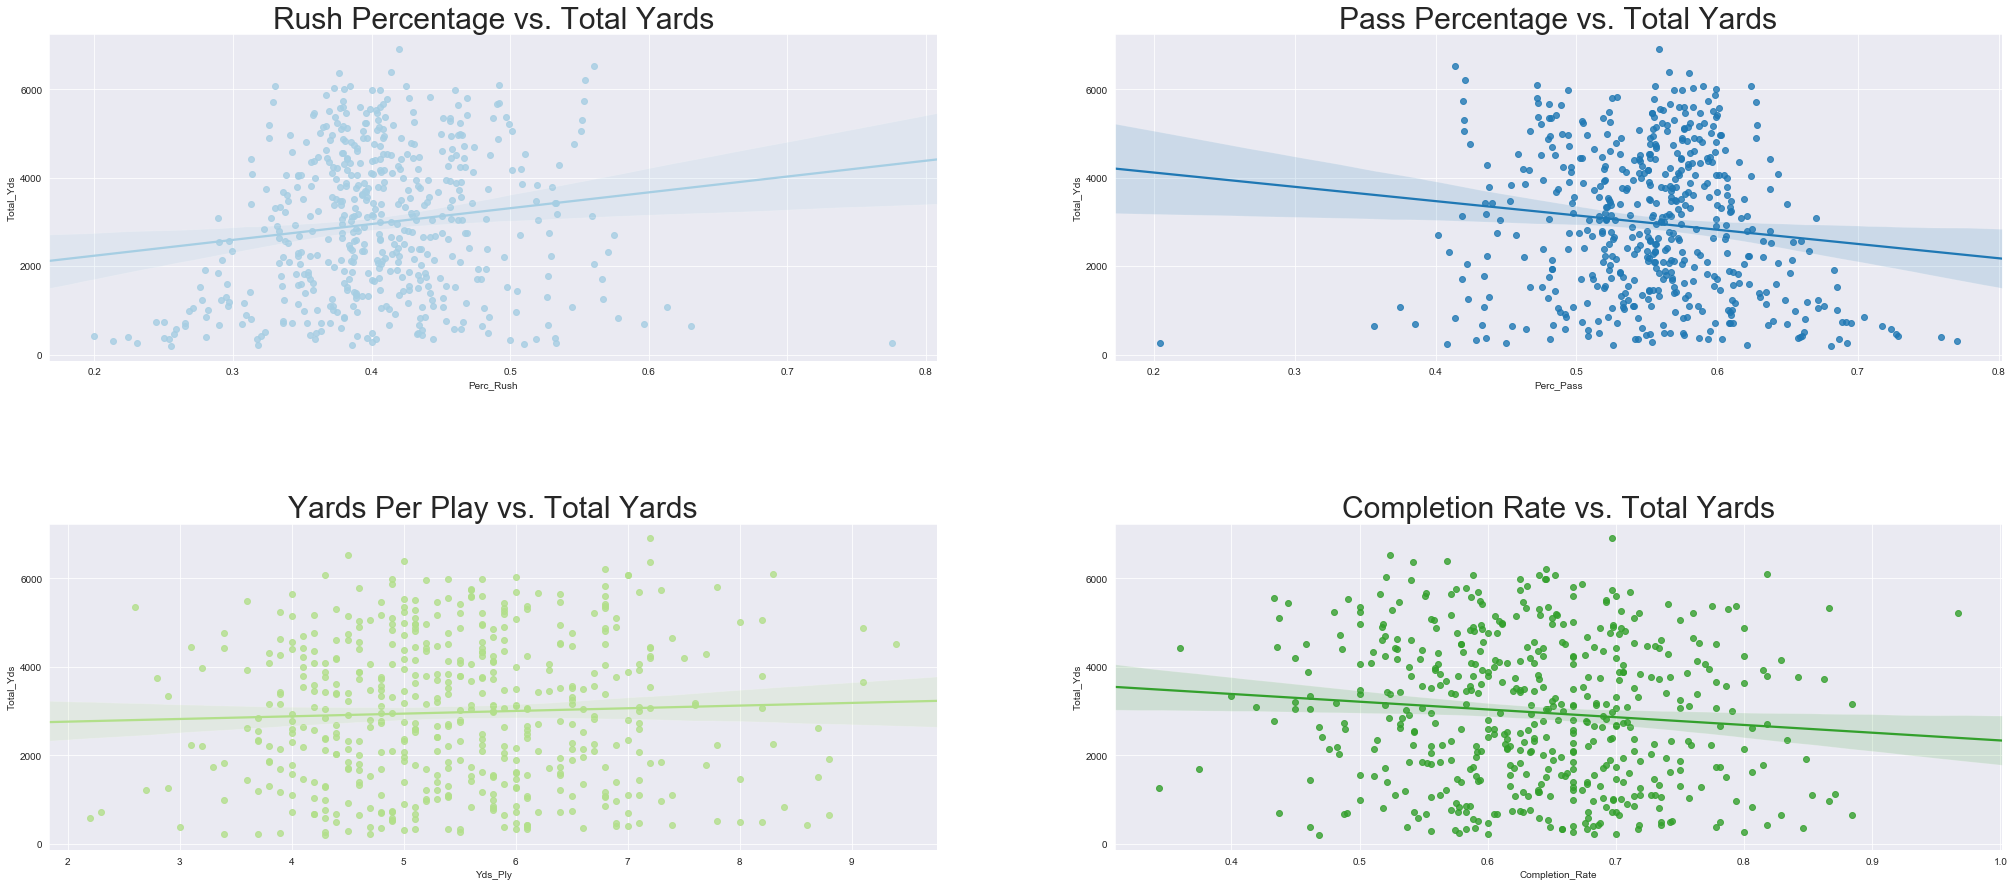

In [14]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(35,15))
palette = iter(sns.color_palette("Paired", 4))

plt.subplots_adjust(hspace = .5);
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["axes.titlesize"] = 30
plt.rcParams["xtick.labelsize"] = 28
plt.rcParams["ytick.labelsize"] = 28

sns.regplot('Perc_Rush','Total_Yds', data=data, color = next(palette),
            ax=axs[0,0]).set_title('Rush Percentage vs. Total Yards');
sns.regplot('Perc_Pass', 'Total_Yds', data=data,  color = next(palette),
            ax=axs[0,1]).set_title('Pass Percentage vs. Total Yards');
sns.regplot('Yds_Ply','Total_Yds', data=data,  color = next(palette),
            ax=axs[1,0]).set_title('Yards Per Play vs. Total Yards');
sns.regplot('Completion_Rate','Total_Yds', data=data,  color = next(palette),
            ax=axs[1,1]).set_title('Completion Rate vs. Total Yards');

##### This is a curious result. Recently NFL teams at large have moved towards a more pass-heavy, air raid style offensive style (which, as a fan, I LOVE). However, seeing total yardage increase as the scheme moves towards a higher percentage of run plays and down as the percentage skews towards passing is interesting. The relativity of this should be noted - the majority of the rush percentages are below 50% and the majority passing percentages are above 50%. Likely these two results demonstrate the idea of a potential ideal "balance".

##### Yards per play and completion rate seem to have little to no effect on total yardage as well which is somewhat curious. 

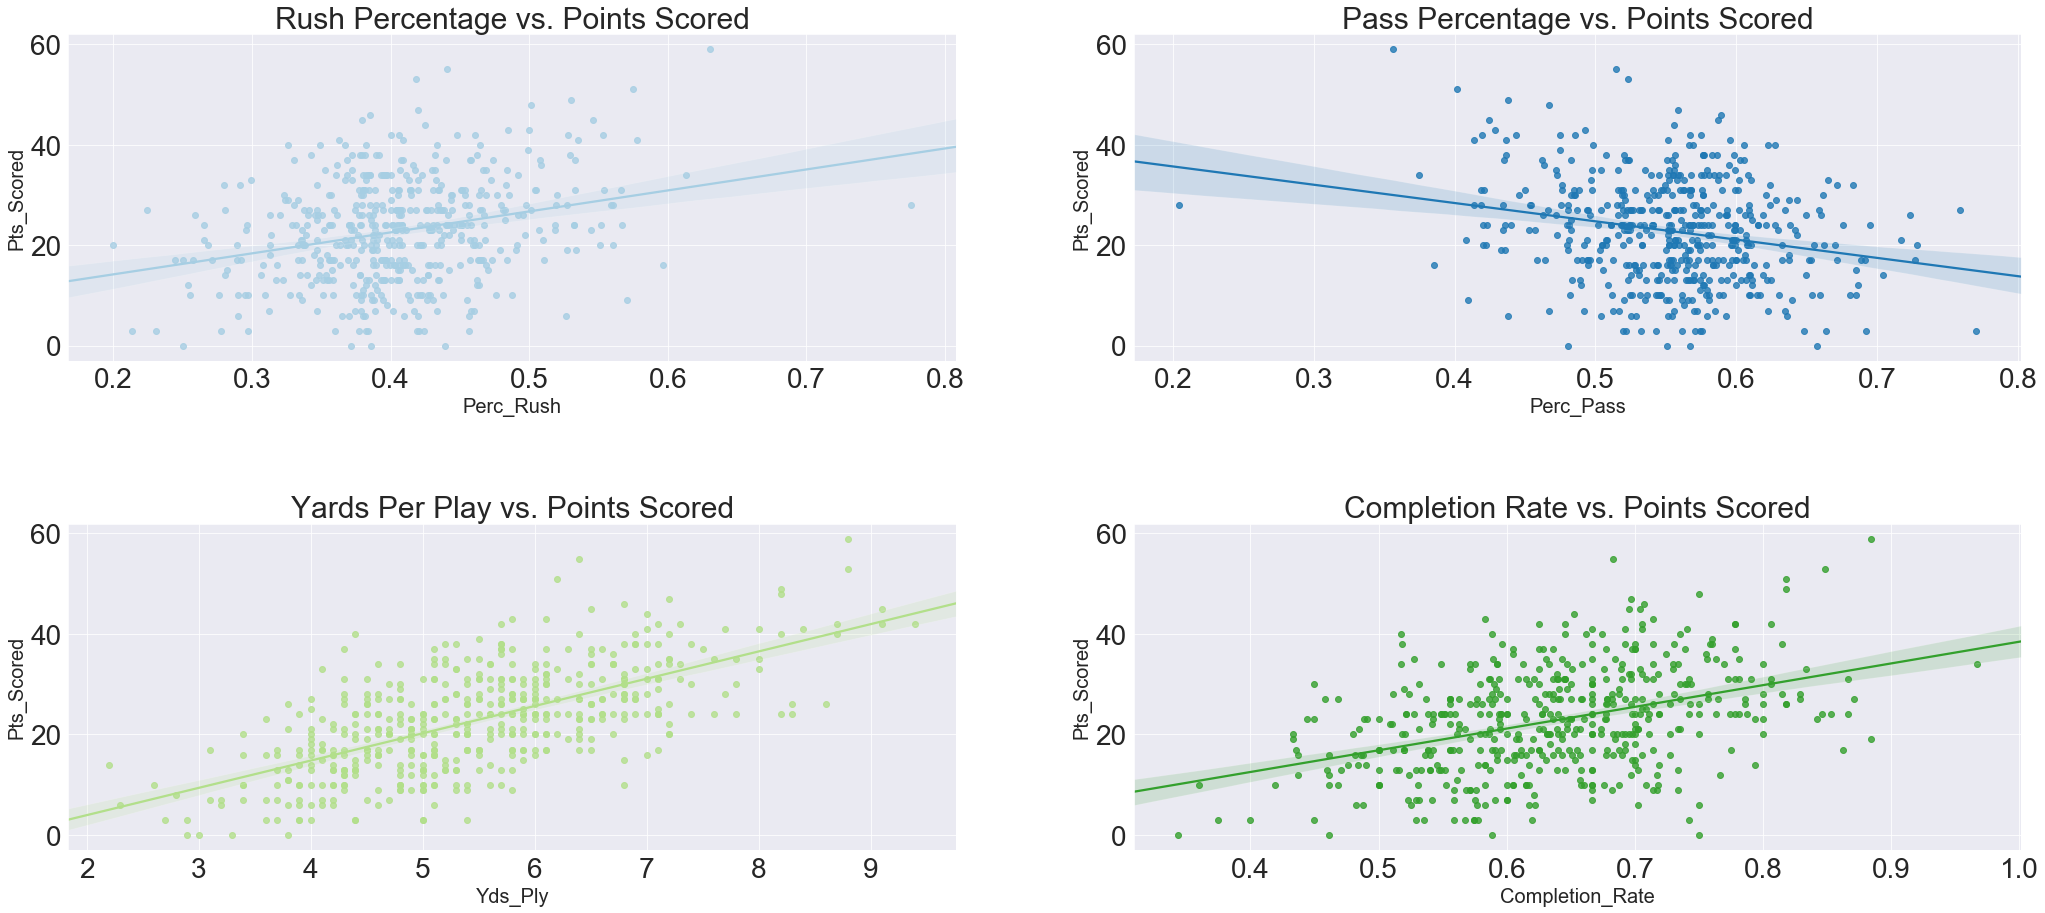

In [15]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(35,15))
palette = iter(sns.color_palette("Paired", 4))

plt.subplots_adjust(hspace = .5);
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["axes.titlesize"] = 30
plt.rcParams["xtick.labelsize"] = 28
plt.rcParams["ytick.labelsize"] = 28

sns.regplot('Perc_Rush','Pts_Scored', data=data, color = next(palette),
            ax=axs[0,0]).set_title('Rush Percentage vs. Points Scored');
sns.regplot('Perc_Pass', 'Pts_Scored', data=data,  color = next(palette),
            ax=axs[0,1]).set_title('Pass Percentage vs. Points Scored');
sns.regplot('Yds_Ply','Pts_Scored', data=data,  color = next(palette),
            ax=axs[1,0]).set_title('Yards Per Play vs. Points Scored');
sns.regplot('Completion_Rate','Pts_Scored', data=data,  color = next(palette),
            ax=axs[1,1]).set_title('Completion Rate vs. Points Scored');

##### There is a smiliar phenomena occuring with rush/pass percentage affect on points scored as yardage here. However we see yards per play and completion rate have a much more significant positive affect on points scored. 

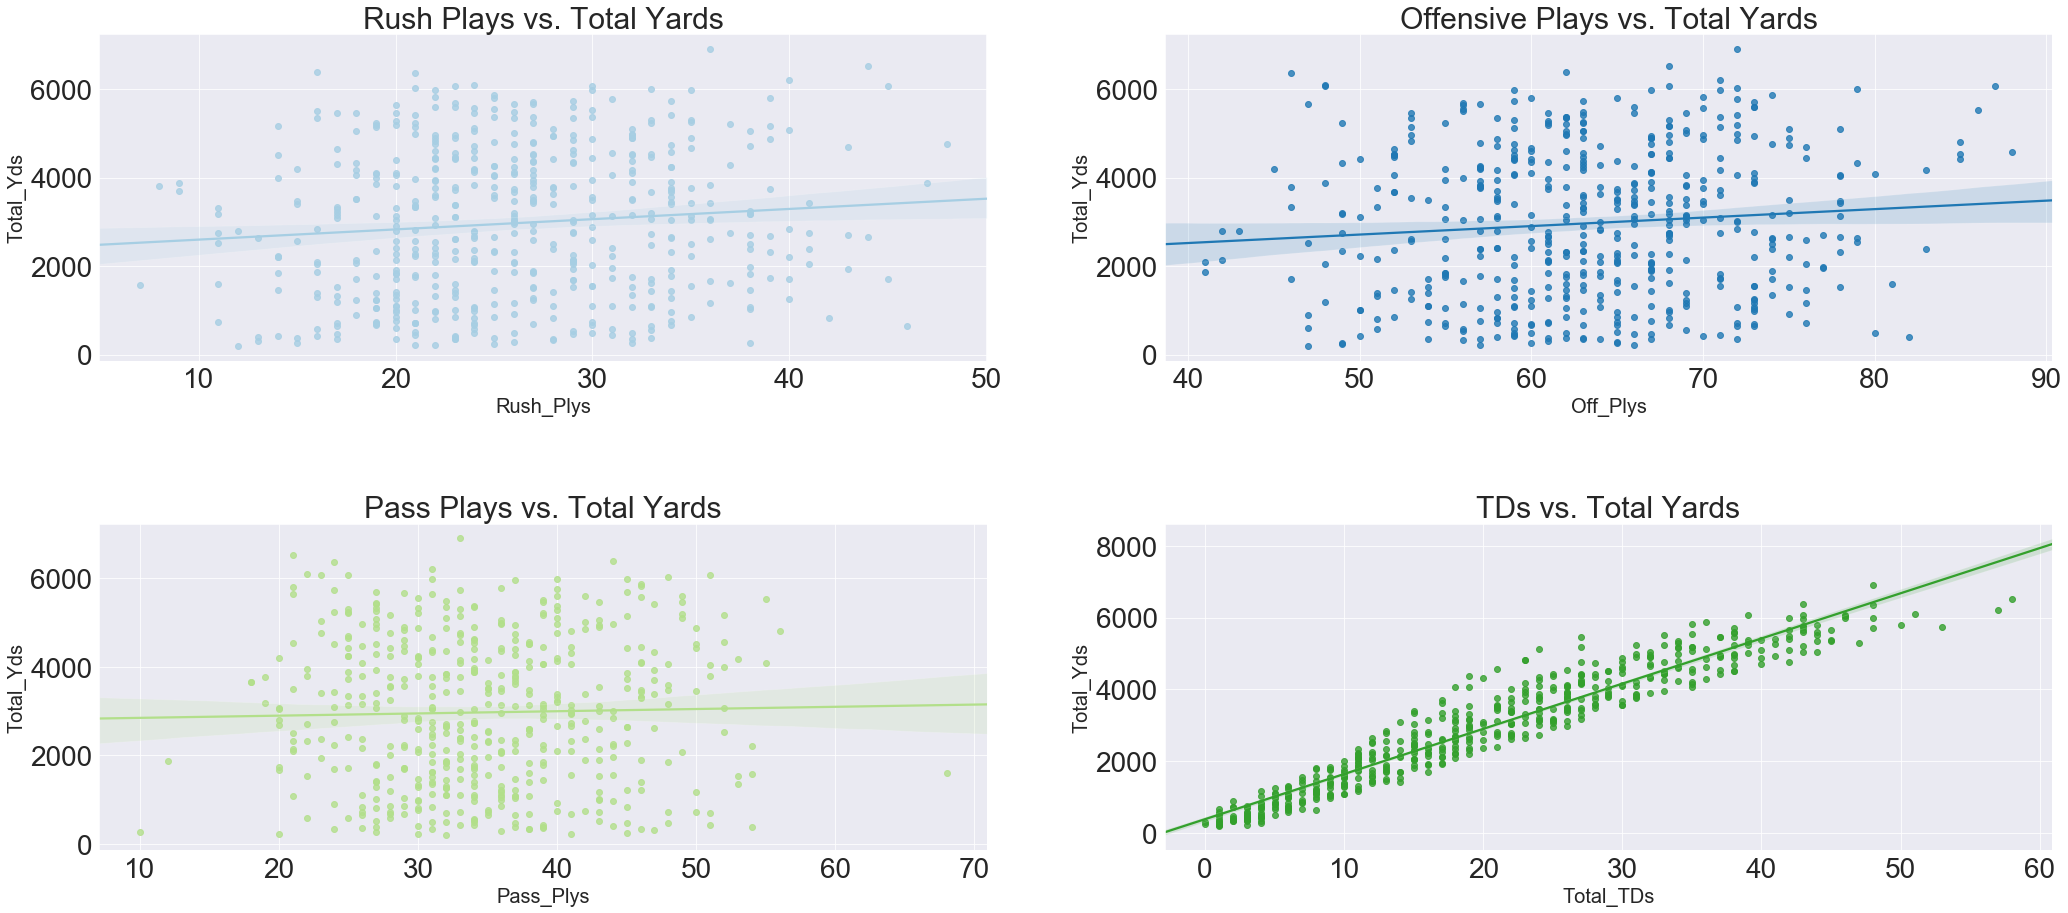

In [16]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(35,15))
palette = iter(sns.color_palette("Paired", 4))

plt.subplots_adjust(hspace = .5);
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["axes.titlesize"] = 30
plt.rcParams["xtick.labelsize"] = 28
plt.rcParams["ytick.labelsize"] = 28

sns.regplot('Rush_Plys','Total_Yds', data=data, color = next(palette),
            ax=axs[0,0]).set_title('Rush Plays vs. Total Yards');
sns.regplot('Off_Plys', 'Total_Yds', data=data,  color = next(palette),
            ax=axs[0,1]).set_title('Offensive Plays vs. Total Yards');
sns.regplot('Pass_Plys','Total_Yds', data=data,  color = next(palette),
            ax=axs[1,0]).set_title('Pass Plays vs. Total Yards');
sns.regplot('Total_TDs','Total_Yds', data=data,  color = next(palette),
            ax=axs[1,1]).set_title('TDs vs. Total Yards');

##### Nothing overwhelmingly interesting here - it doesn't look that any of these have a significant effect on total yardage which agrees with the findings from the previous graphs. I am interested now in a graph demonstrating the total TDs. 

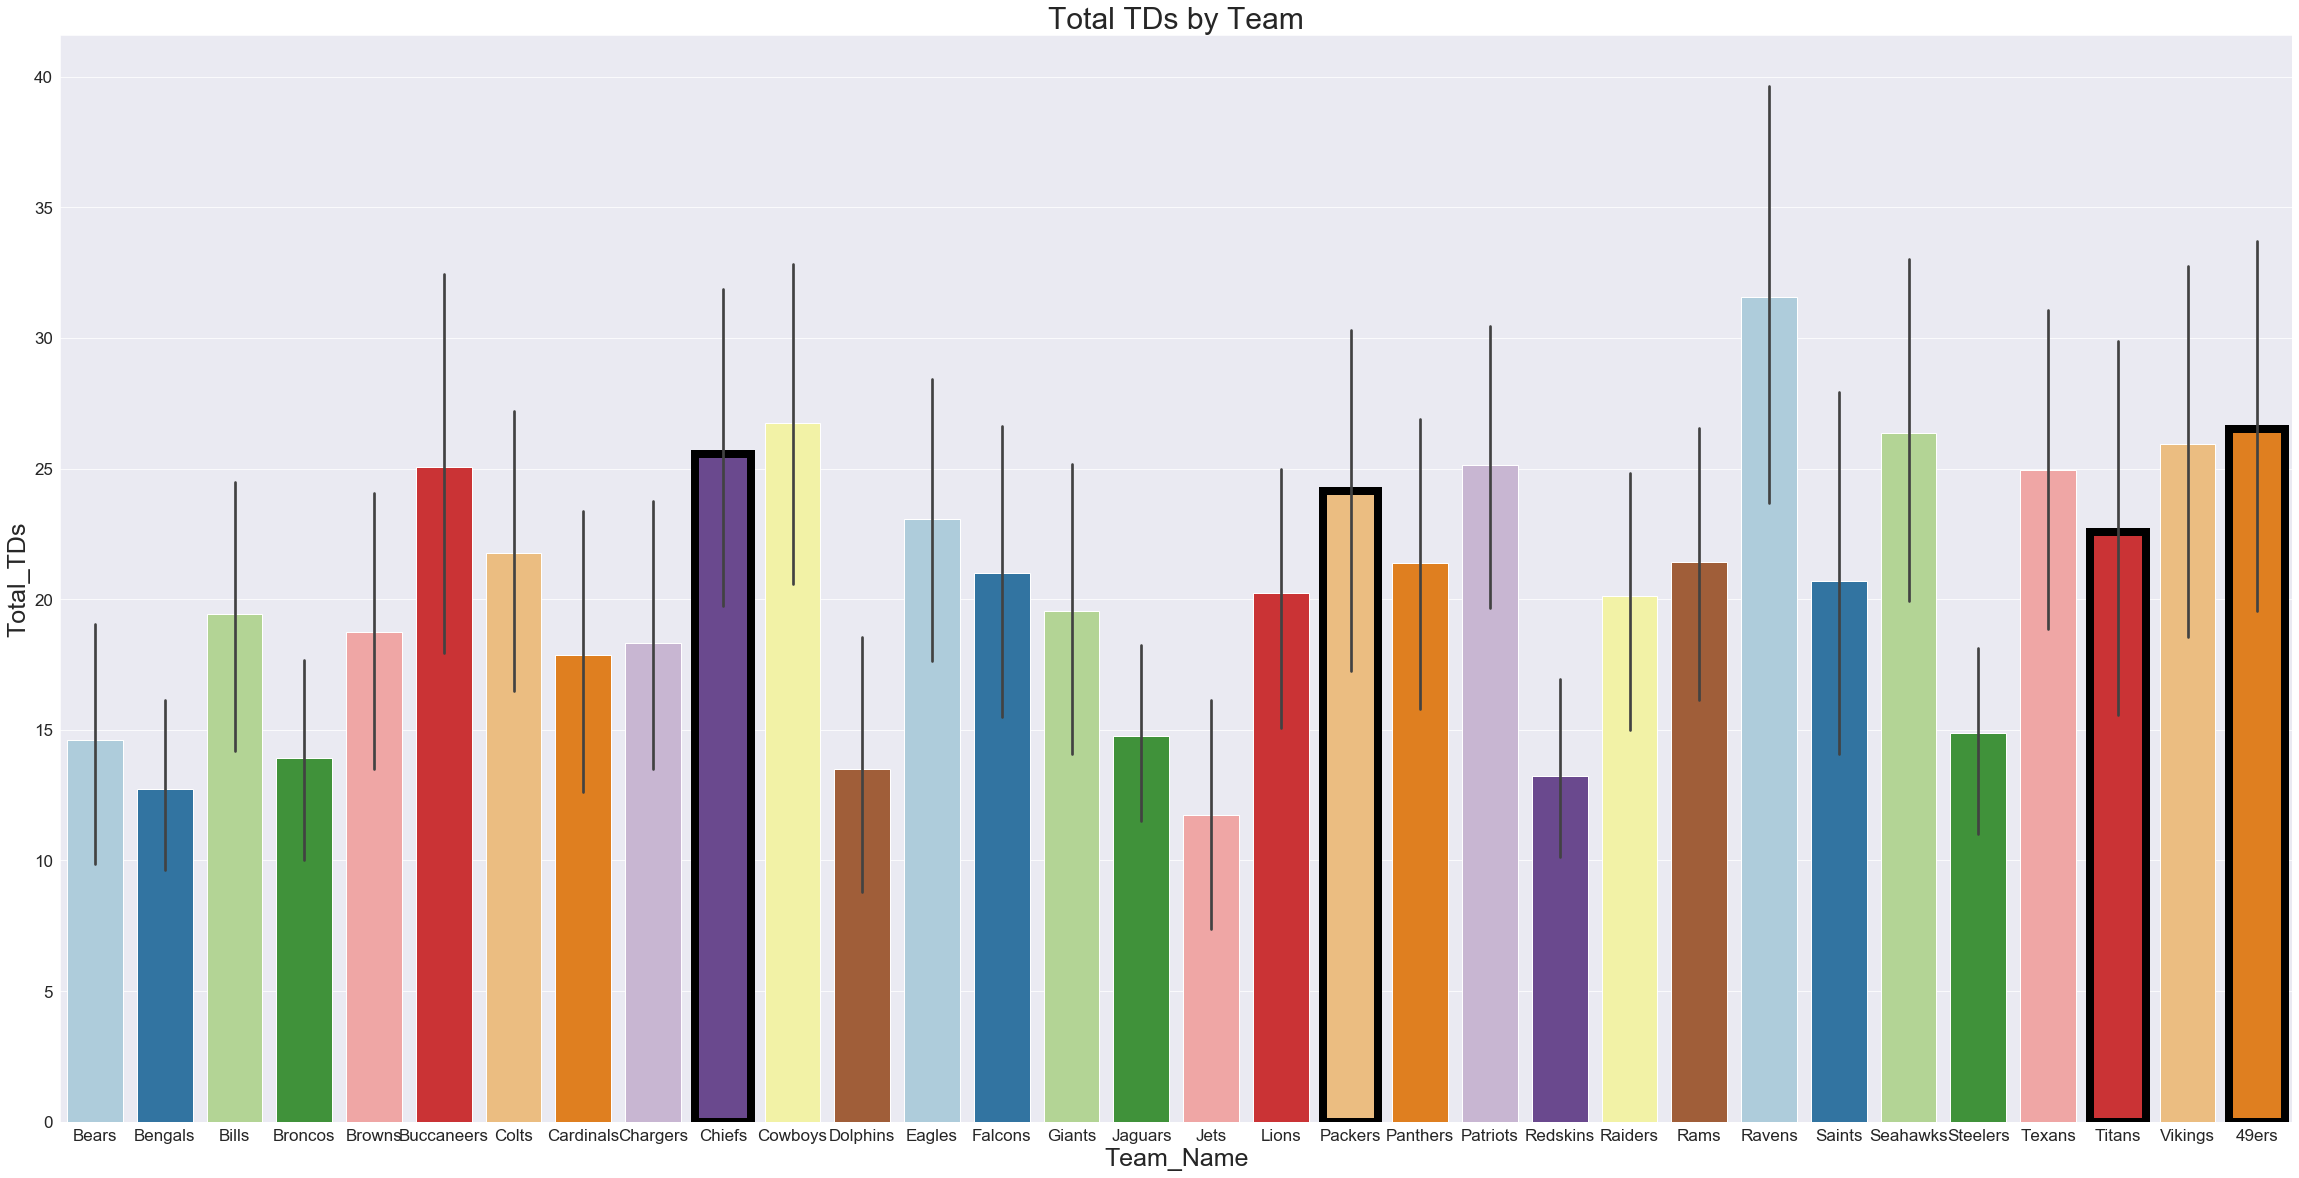

In [17]:
TD_plot = sns.barplot(x=data['Team_Name'], y=data['Total_TDs'], palette = sns.color_palette('Paired', 32), data=data)

for thisbar in TD_plot.patches:
    # Set a different hatch for each bar
    if thisbar == TD_plot.patches[9]:
        thisbar.set_edgecolor("black")
        thisbar.set_linewidth(8)
    elif thisbar == TD_plot.patches[18]:
        thisbar.set_edgecolor("black")
        thisbar.set_linewidth(8)
    elif thisbar == TD_plot.patches[29]:
        thisbar.set_edgecolor("black")
        thisbar.set_linewidth(8)
    elif thisbar == TD_plot.patches[31]:
        thisbar.set_edgecolor("black")
        thisbar.set_linewidth(8)  
    else:
        continue

TD_plot.set_title('Total TDs by Team')
        
for item in ([TD_plot.xaxis.label, TD_plot.yaxis.label]):
    item.set_fontsize(25)
    
for item in (TD_plot.get_xticklabels() + TD_plot.get_yticklabels()):
    item.set_fontsize(17)

In [18]:
data.nlargest(18, ['Total_TDs'])['Team_Name'].unique()

array(['Ravens', '49ers', 'Titans', 'Buccaneers', 'Cowboys', 'Saints',
       'Chiefs', 'Seahawks', 'Vikings', 'Packers'], dtype=object)

##### Another curious result for the Cowboys and Buccaneers who roll in at third and fourth but still don't make the playoffs. The rest however did make it, so it seems TDs are important. 

##### It should be noted at this point that there are several teams who DID make the playoffs who have yet to appear yet - Packers, Eagles & Bills. Apparently you don't have to be top ten in total yardage, total points scored, or total TDs to make a playoff run. (Yes, the Packers are seen here as the 10th top TD scorers, but still). 

##### Let's keep exploring.

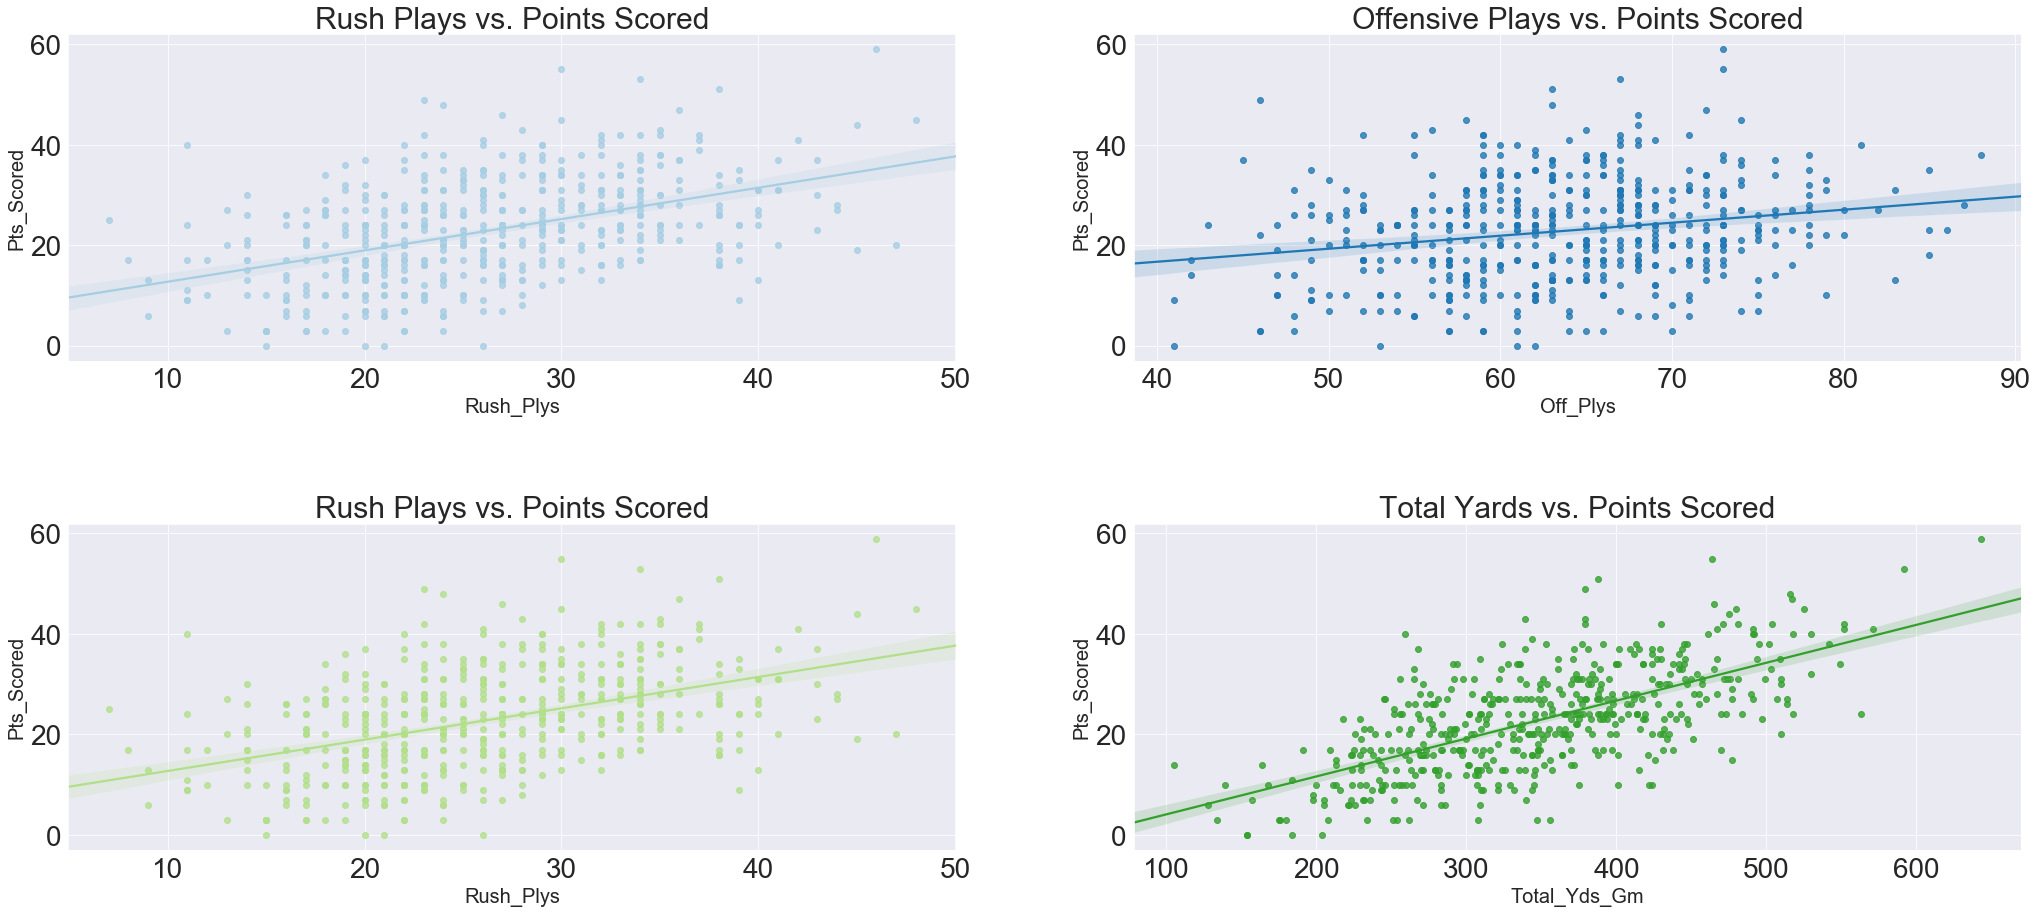

In [19]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(35,15))
palette = iter(sns.color_palette("Paired", 4))

plt.subplots_adjust(hspace = .5);
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["axes.titlesize"] = 30
plt.rcParams["xtick.labelsize"] = 28
plt.rcParams["ytick.labelsize"] = 28

sns.regplot('Rush_Plys','Pts_Scored', data=data, color = next(palette),
            ax=axs[0,0]).set_title('Rush Plays vs. Points Scored');
sns.regplot('Off_Plys', 'Pts_Scored', data=data,  color = next(palette),
            ax=axs[0,1]).set_title('Offensive Plays vs. Points Scored');
sns.regplot('Rush_Plys','Pts_Scored', data=data,  color = next(palette),
            ax=axs[1,0]).set_title('Rush Plays vs. Points Scored');
sns.regplot('Total_Yds_Gm','Pts_Scored', data=data,  color = next(palette),
            ax=axs[1,1]).set_title('Total Yards vs. Points Scored');

##### Nothing groundbreaking here: more plays = more points. Also more yards = more points. 

##### Let's look now at some more categorical-ish data (it's really still continuous but has less variable so is visualized more easily with boxplots). These will be a mix of features

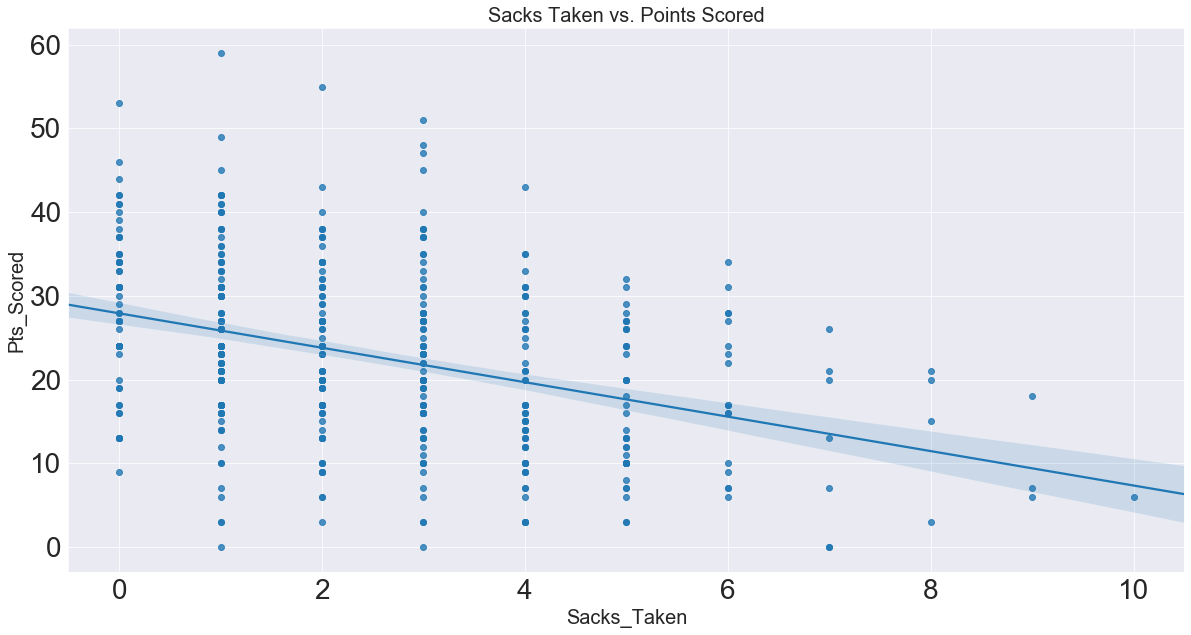

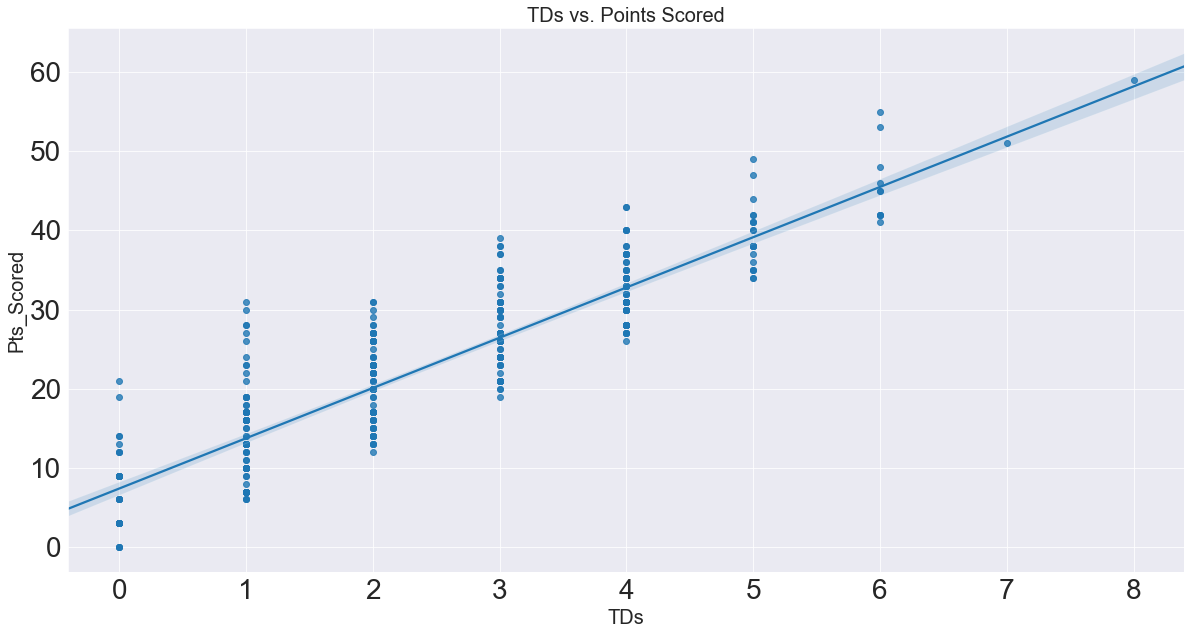

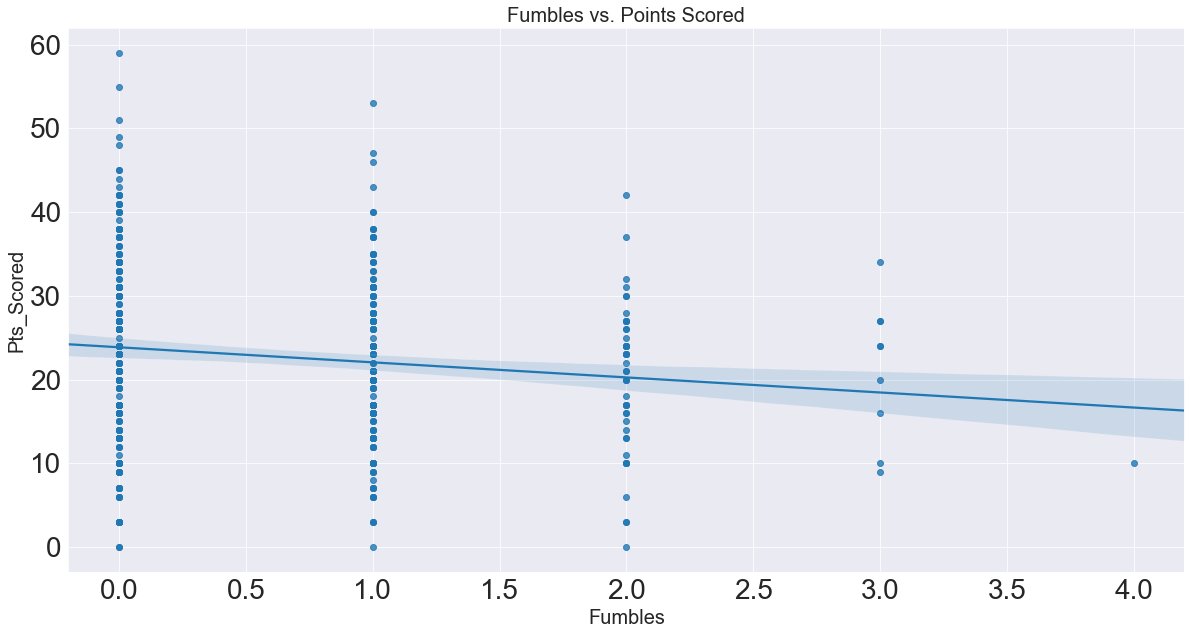

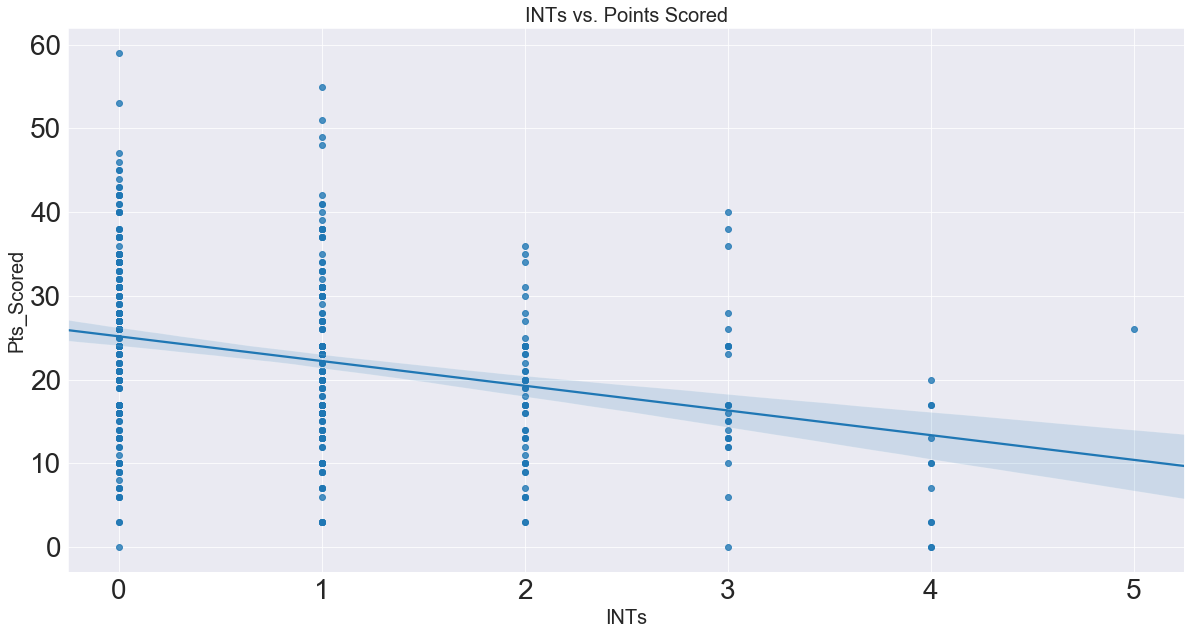

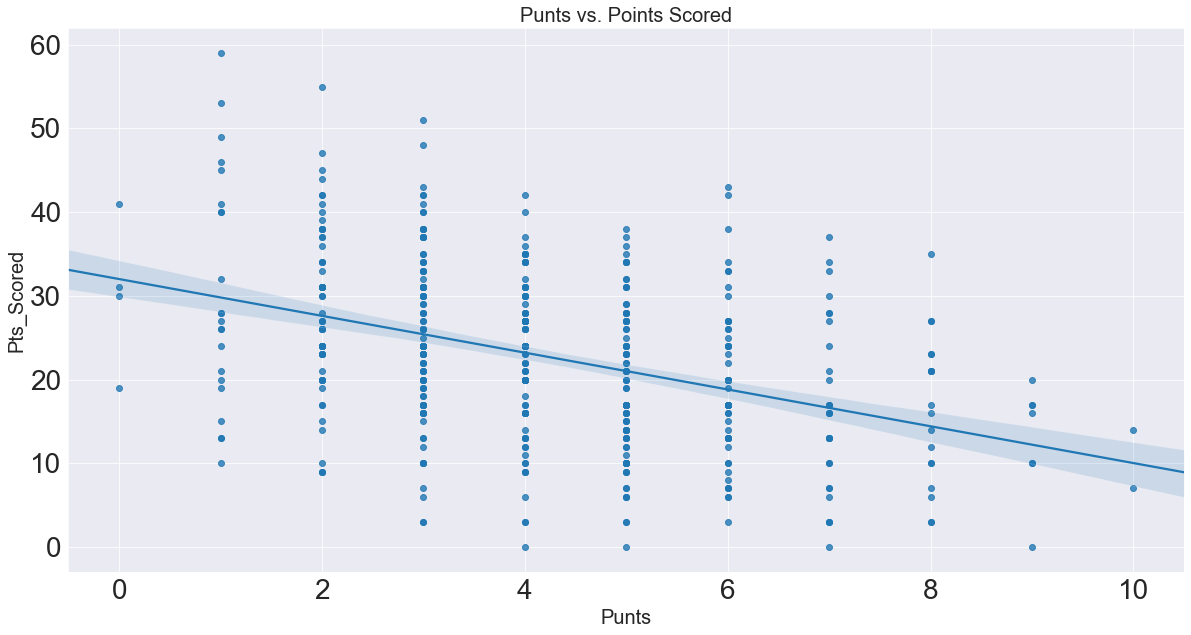

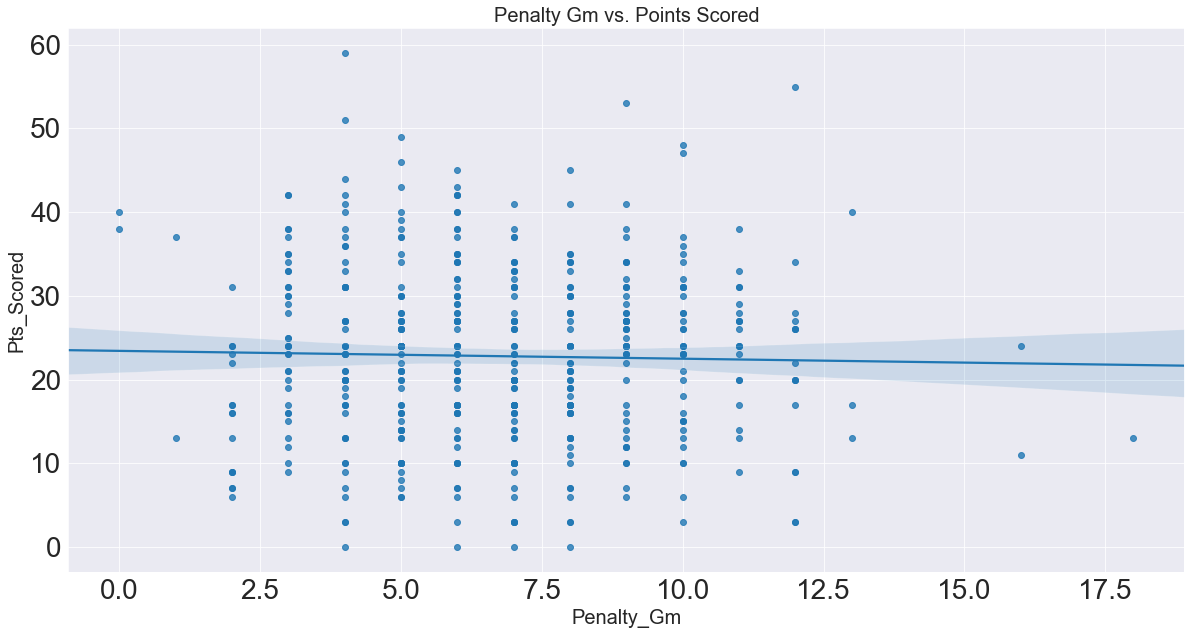

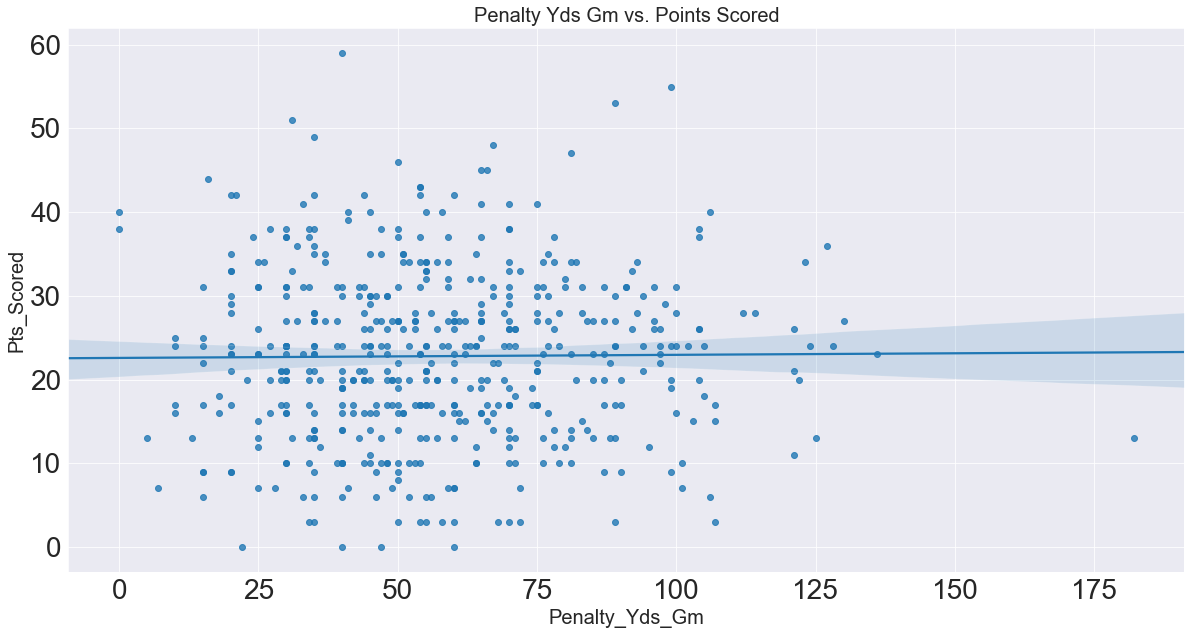

In [74]:
features = ['Sacks_Taken','TDs','Fumbles','INTs', 'Punts', 'Penalty_Gm', 'Penalty_Yds_Gm']

sns.set_style("darkgrid")
sns.set_context({"figure.figsize": (20, 10)})
palette = iter(sns.color_palette("Paired", 4))

for i,feat in enumerate(features): #creating boxplots of every categorical feature
        plt.figure(i)
        y = 'Points Scored'
        sns.regplot(x=feat, y='Pts_Scored', 
                    data=data).set_title(feat.replace('_',' ') + ' vs. ' + y, fontsize=20);

##### What I'm taking from this:

    1. More sacks corresponds with less points scored.
    2. An increase in fumbles lightly corresponds with less points scored 
    3. Interceptions corresponds with less points scored 
    4. Seems obvious but more punts corresponds to less points scored.
    5. Interestingly, penalties don't seem to affect points scored much.

##### Let's keep going.

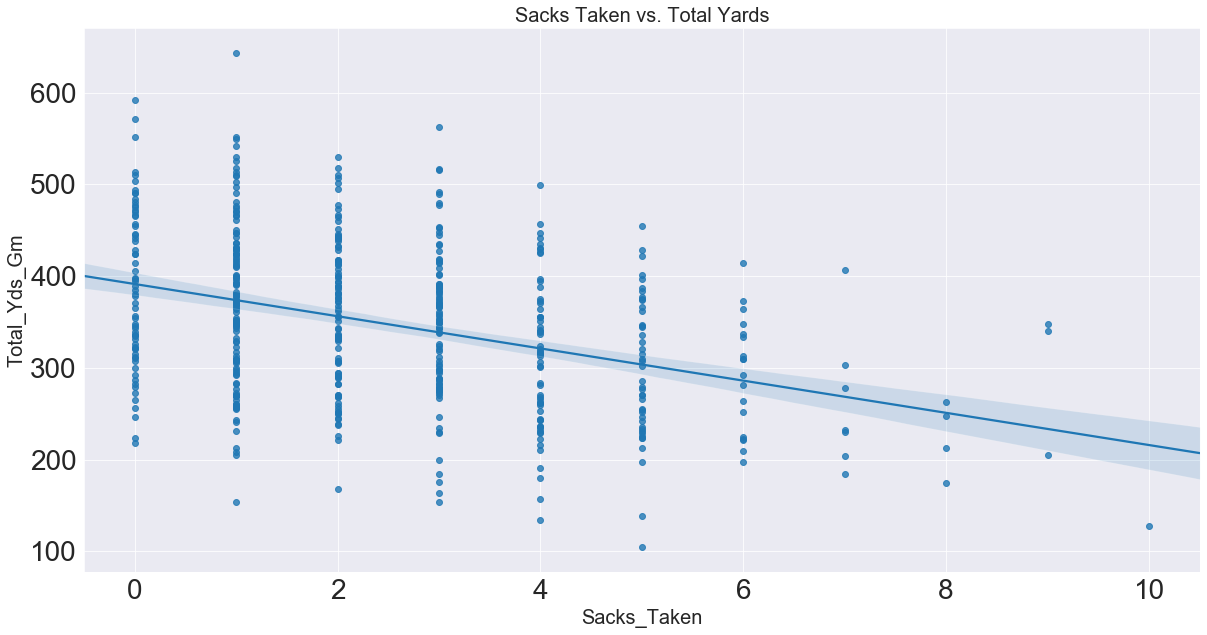

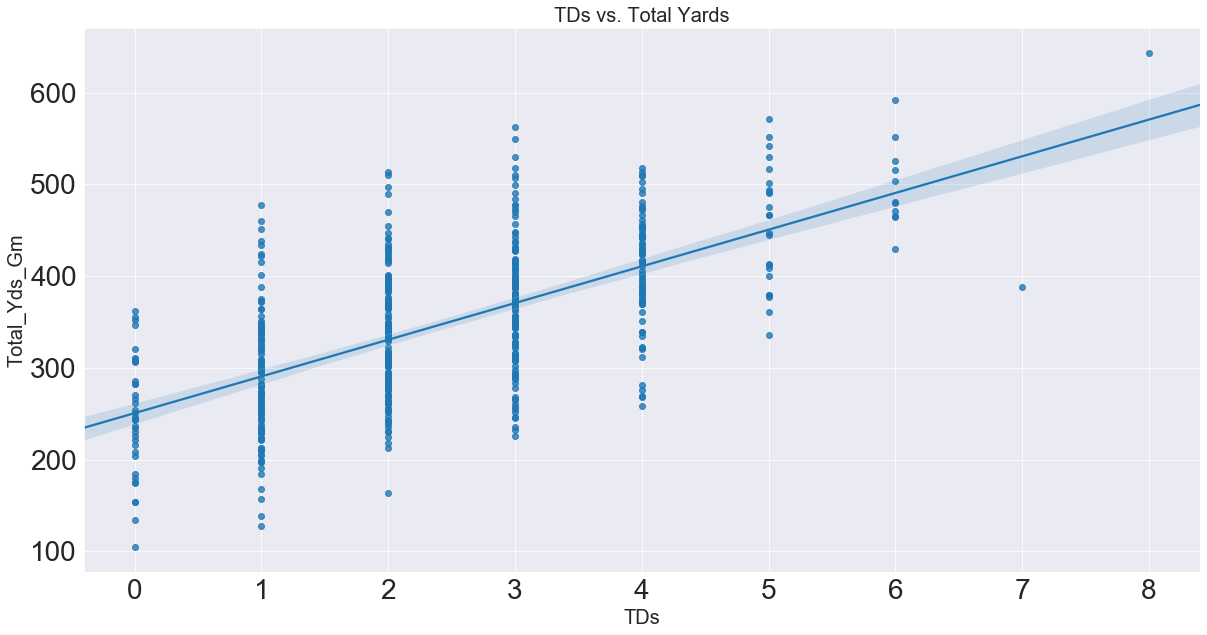

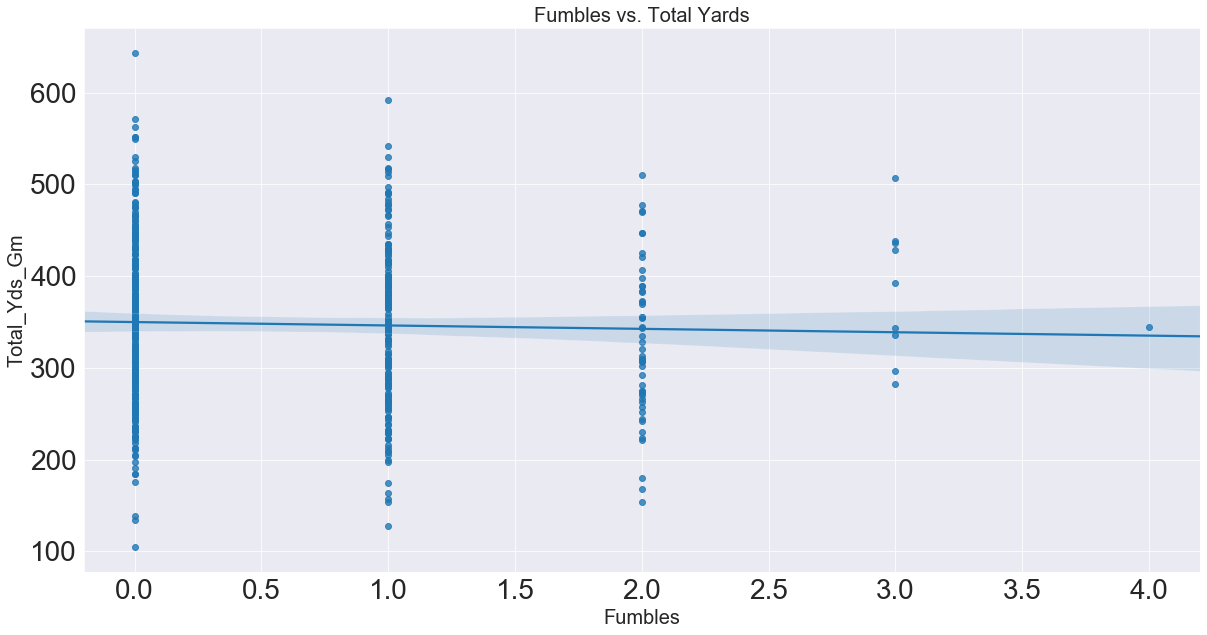

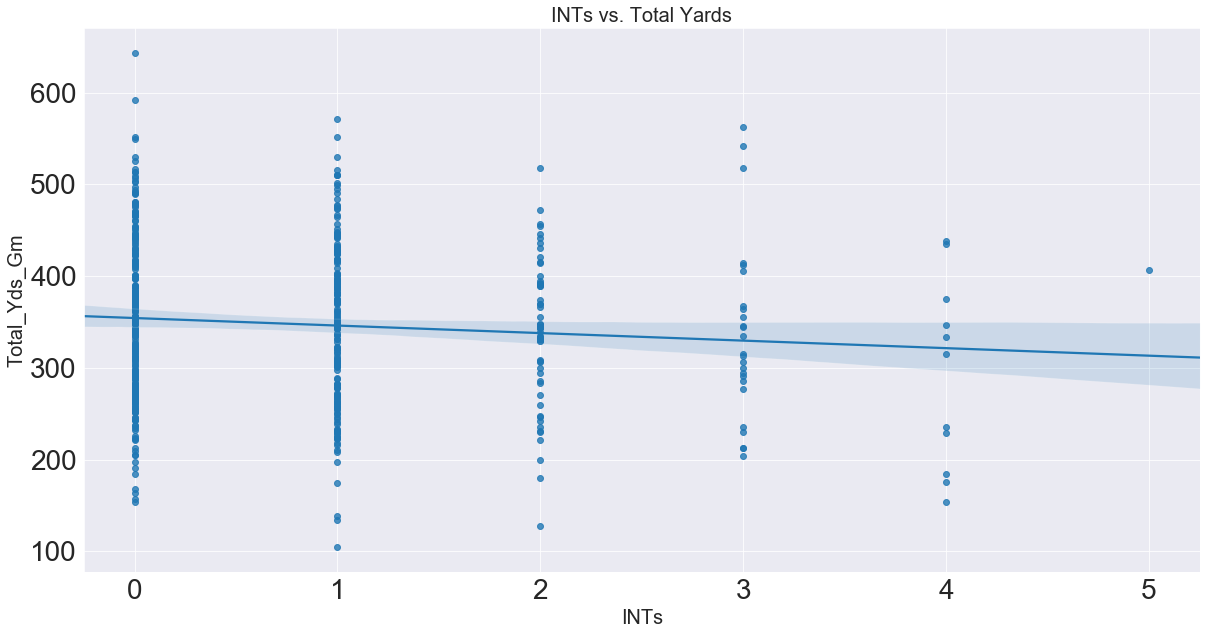

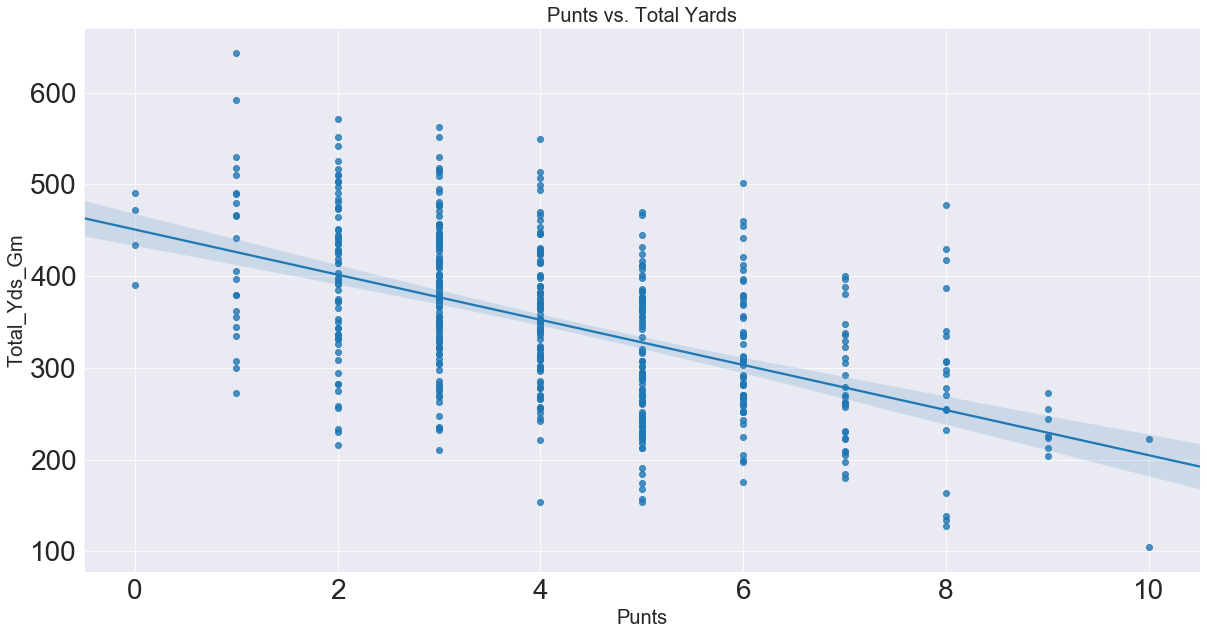

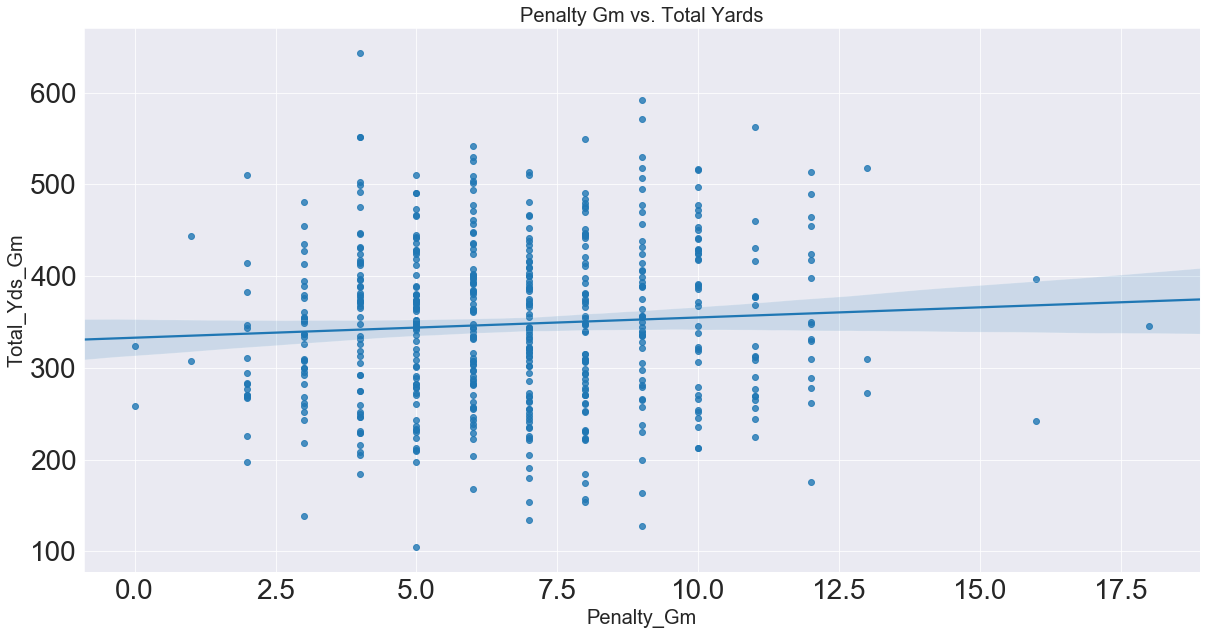

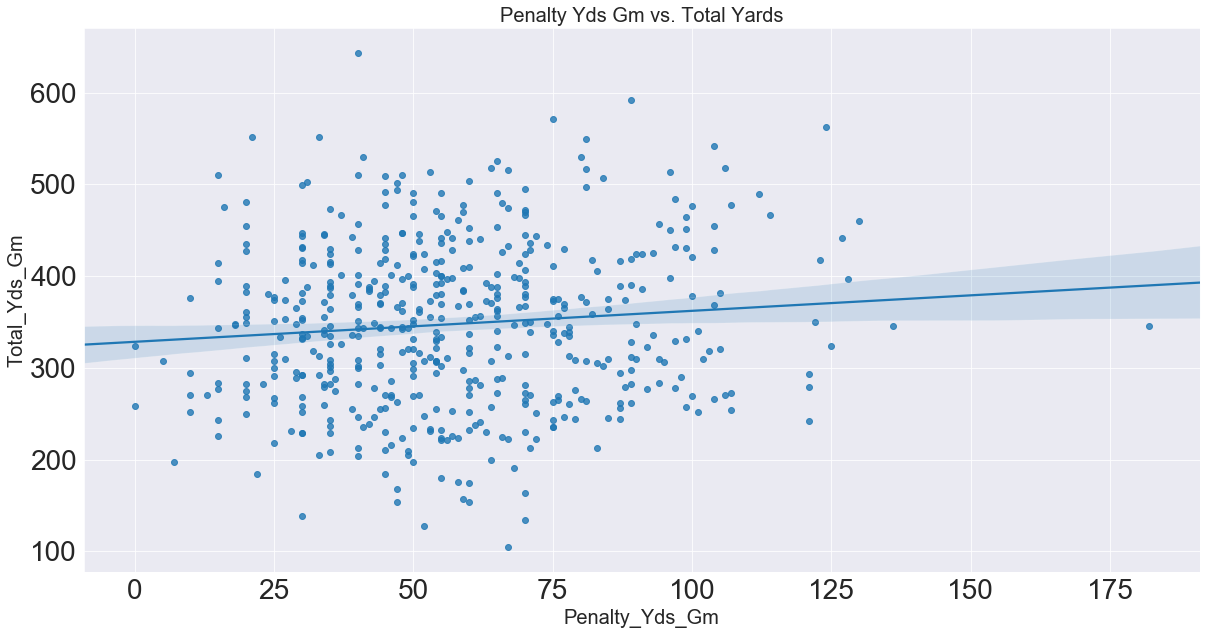

In [73]:
features = ['Sacks_Taken','TDs','Fumbles','INTs', 'Punts', 'Penalty_Gm', 'Penalty_Yds_Gm']

sns.set_style("darkgrid")
sns.set_context({"figure.figsize": (20, 10)})
palette = iter(sns.color_palette("Paired", 4))

for i,feat in enumerate(features): #creating boxplots of every categorical feature
        plt.figure(i)
        y = 'Total Yards'
        sns.regplot(x=feat, y='Total_Yds_Gm', 
                    data=data).set_title(feat.replace('_',' ') + ' vs. ' + y, fontsize=20);

##### Very similar findings to above except that fumbles don't seem to correspond to decrease in total yardage.

#### Just curious now about turnovers - let's look at total fumbles and ints.

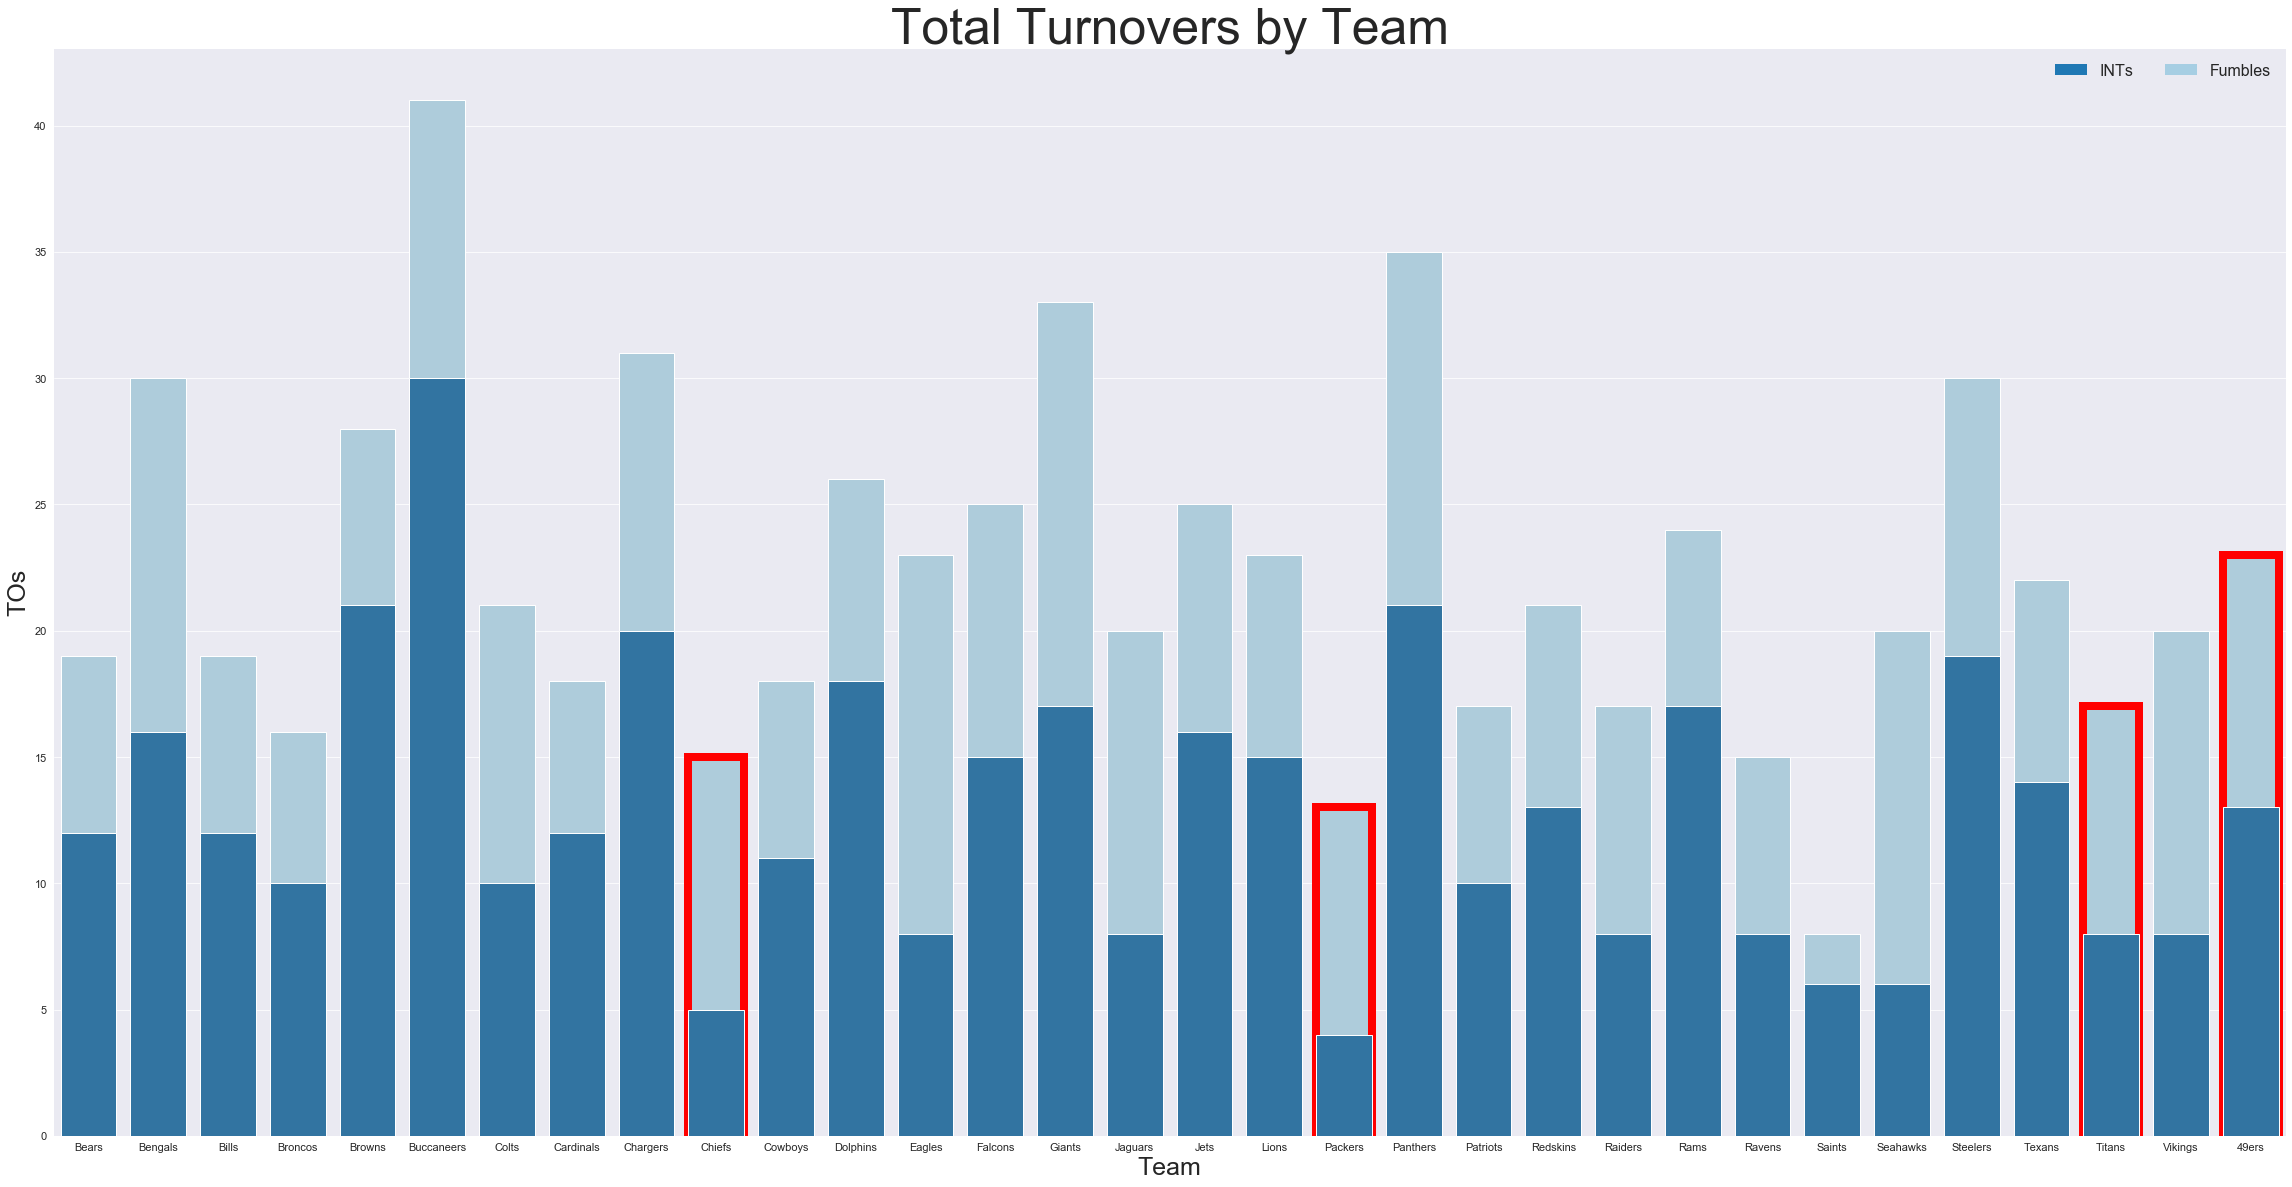

In [76]:
#prep data 
stacked_bar_data = data
stacked_bar_data["total"] = stacked_bar_data.loc[stacked_bar_data['Week'] == 'Week_17']['Total_INT_Throw'] + stacked_bar_data.loc[stacked_bar_data['Week'] == 'Week_17']['Total_Fumbles']
palette = iter(sns.color_palette("Paired", 2))

#plot top series
top_plot = sns.barplot(x = stacked_bar_data['Team_Name'], y = stacked_bar_data.total, color = next(palette))

#plot bottom series
bottom_plot = sns.barplot(x = stacked_bar_data['Team_Name'], y = stacked_bar_data.loc[stacked_bar_data['Week'] == 'Week_17']['Total_INT_Throw'], 
                          color = next(palette))

# Loop over the bars to set unique edgecolor for top 4
for thisbar in top_plot.patches:
    # Set a different hatch for each bar
    if thisbar == top_plot.patches[9]:
        thisbar.set_edgecolor("red")
        thisbar.set_linewidth(8)
    elif thisbar == top_plot.patches[18]:
        thisbar.set_edgecolor("red")
        thisbar.set_linewidth(8)
    elif thisbar == top_plot.patches[29]:
        thisbar.set_edgecolor("red")
        thisbar.set_linewidth(8)
    elif thisbar == top_plot.patches[31]:
        thisbar.set_edgecolor("red")
        thisbar.set_linewidth(8)  
    else:
        continue 

#prep plot
palette = iter(sns.color_palette("Paired", 2))

topbar = plt.Rectangle((0,0),1,1,fc=next(palette), edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc=next(palette),  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['INTs', 'Fumbles'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

#graph beautifucation
sns.set_context({"figure.figsize": (40, 20)})
sns.despine(left=True)
bottom_plot.set_ylabel("TOs")
bottom_plot.set_xlabel("Team")
bottom_plot.set_title("Total Turnovers by Team", fontsize=50)

#font regularization
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label]):
    item.set_fontsize(25)
    
for item in (bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(11)

##### Ah, we begin to get some idea of why the Buccaneers may not have been very successful despite an explosive offense. Also, it appears that most of our playoff teams are in the lower end of this.

In [23]:
data['Total_TOs'] = data.loc[data['Week']=='Week_17']['Total_INT_Throw'] + data.loc[data['Week']=='Week_17']['Total_Fumbles']
print('The teams with the least turnovers were:')
print(data.nsmallest(10, ['Total_TOs'])['Team_Name'].unique(), '\n')
print('The teams with the most turnovers were:')
print(data.nlargest(10, ['Total_TOs'])['Team_Name'].unique())

The teams with the least turnovers were:
['Saints' 'Packers' 'Chiefs' 'Ravens' 'Broncos' 'Patriots' 'Raiders'
 'Titans' 'Cardinals' 'Cowboys'] 

The teams with the most turnovers were:
['Buccaneers' 'Panthers' 'Giants' 'Chargers' 'Bengals' 'Steelers' 'Browns'
 'Dolphins' 'Falcons' 'Jets']


#### As demonstrated earlier, turnovers do seem to play a role in scoring and yardage which in turn play a role in overall success. 6/10 of teams with the least turnovers went to the playoffs. 

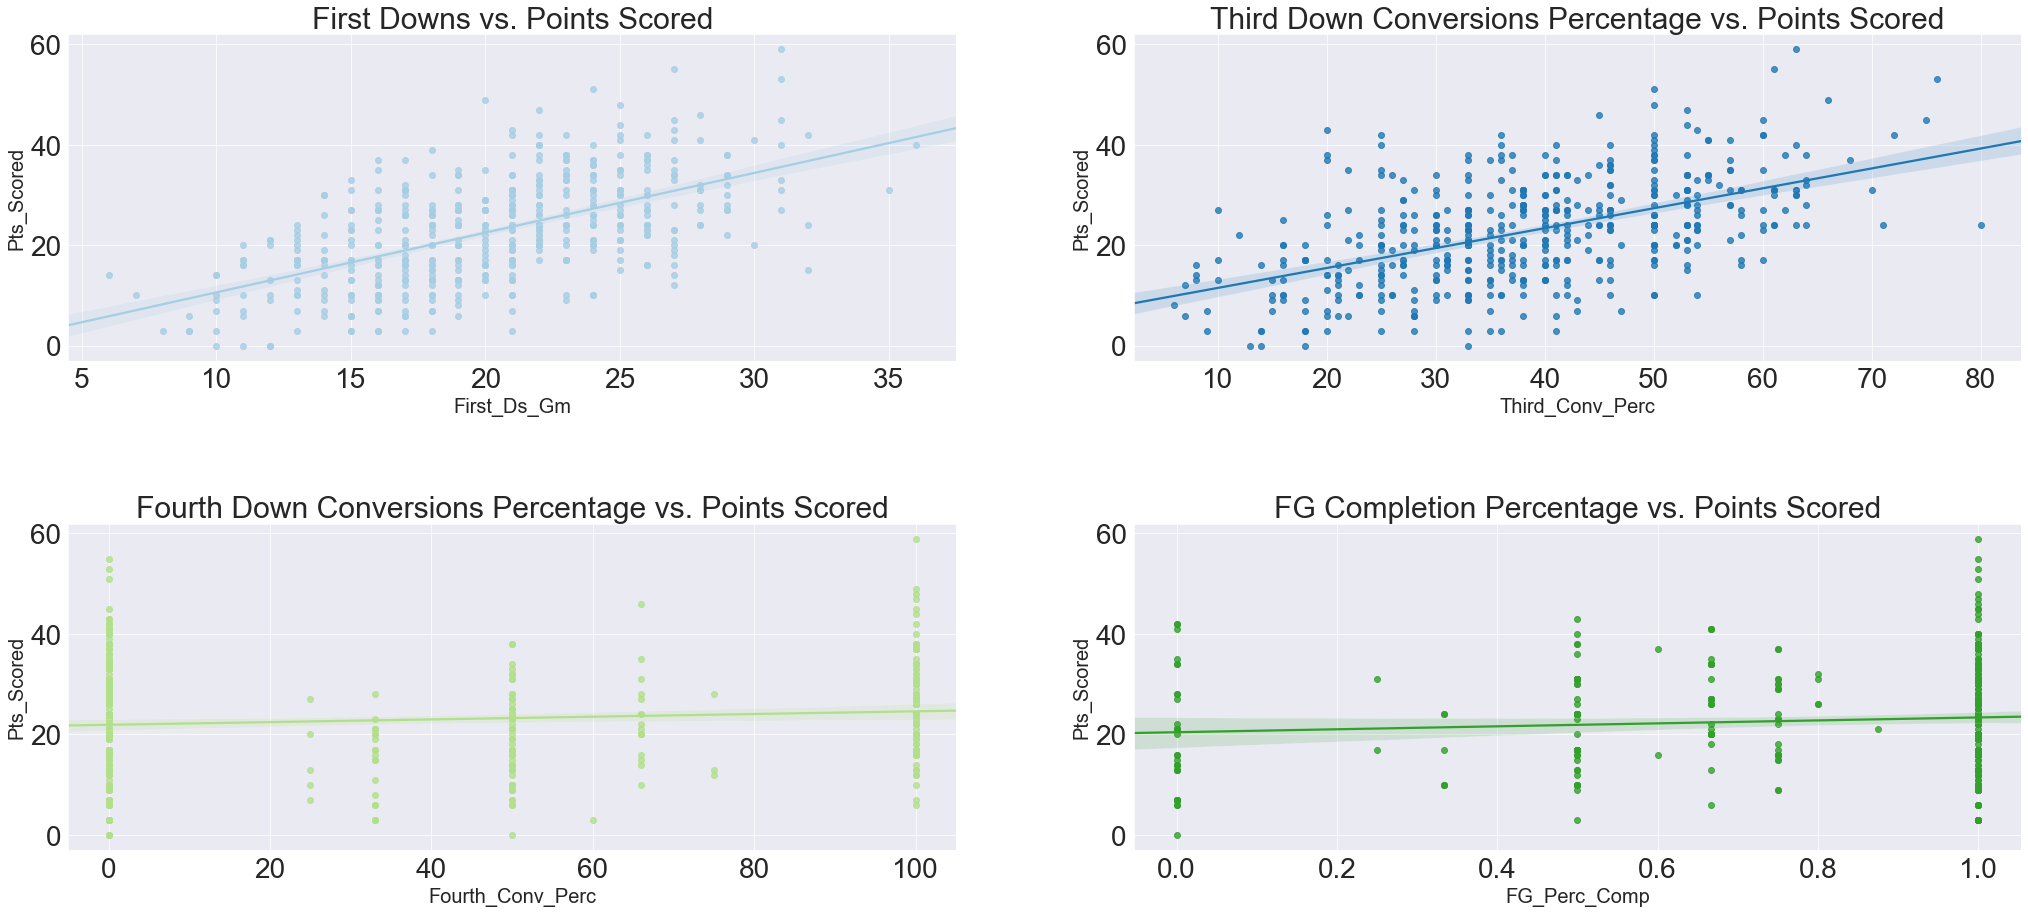

In [48]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(35,15))
palette = iter(sns.color_palette("Paired", 4))

plt.subplots_adjust(hspace = .5);
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["axes.titlesize"] = 30
plt.rcParams["xtick.labelsize"] = 28
plt.rcParams["ytick.labelsize"] = 28

sns.regplot('First_Ds_Gm','Pts_Scored', data=data, color = next(palette),
            ax=axs[0,0]).set_title('First Downs vs. Points Scored');
sns.regplot('Third_Conv_Perc', 'Pts_Scored', data=data,  color = next(palette),
            ax=axs[0,1]).set_title('Third Down Conversions Percentage vs. Points Scored');
sns.regplot('Fourth_Conv_Perc','Pts_Scored', data=data,  color = next(palette),
            ax=axs[1,0]).set_title('Fourth Down Conversions Percentage vs. Points Scored');
sns.regplot('FG_Perc_Comp','Pts_Scored', data=data,  color = next(palette),
            ax=axs[1,1]).set_title('FG Completion Percentage vs. Points Scored');

In [128]:
Wins = data.loc[data['Win'] == 1]
Loses = data.loc[data['Win'] == 0]

In [130]:
print('Average Points Scored in Wins','\n')
print(Wins.Pts_Scored.sum()/len(Wins), '\n')
print('Average Points Scored in Loses', '\n')
print(Loses.Pts_Scored.sum()/len(Loses),'\n')

Average Points Scored in Wins 

28.57421875 

Average Points Scored in Loses 

17.035019455252918 



##### It appears that number of first downs and third down conversion percentage matters quite a lot for scoring points. The average points scored among all wins was 28 points, which corresponds to around 50% third down conversion rate and 25 first downs.

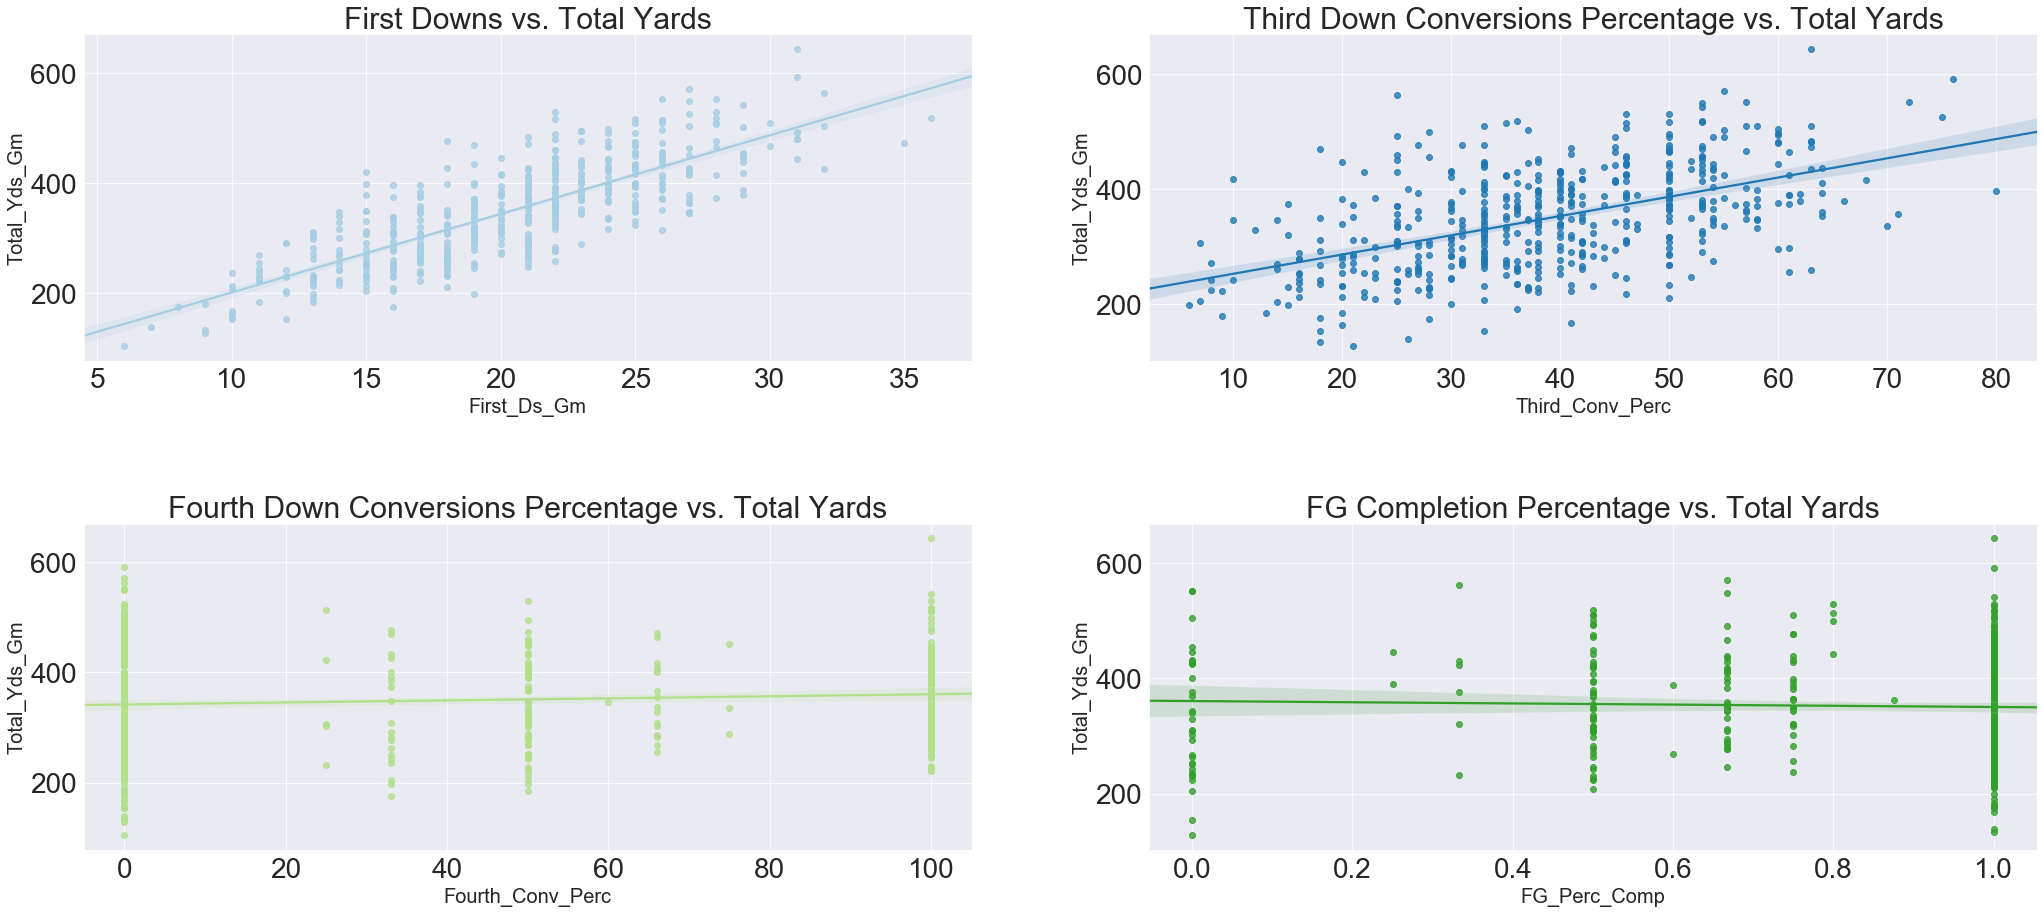

In [52]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(35,15))
palette = iter(sns.color_palette("Paired", 4))

plt.subplots_adjust(hspace = .5);
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["axes.titlesize"] = 30
plt.rcParams["xtick.labelsize"] = 28
plt.rcParams["ytick.labelsize"] = 28

sns.regplot('First_Ds_Gm','Total_Yds_Gm', data=data, color = next(palette),
            ax=axs[0,0]).set_title('First Downs vs. Total Yards');
sns.regplot('Third_Conv_Perc', 'Total_Yds_Gm', data=data,  color = next(palette),
            ax=axs[0,1]).set_title('Third Down Conversions Percentage vs. Total Yards');
sns.regplot('Fourth_Conv_Perc','Total_Yds_Gm', data=data,  color = next(palette),
            ax=axs[1,0]).set_title('Fourth Down Conversions Percentage vs. Total Yards');
sns.regplot('FG_Perc_Comp','Total_Yds_Gm', data=data,  color = next(palette),
            ax=axs[1,1]).set_title('FG Completion Percentage vs. Total Yards');

In [131]:
print('Average Yards per Game in Wins','\n')
print(Wins.Total_Yds_Gm.sum()/len(Wins), '\n')
print('Average Yards per Game in Loses', '\n')
print(Loses.Total_Yds_Gm.sum()/len(Loses),'\n') 

Average Yards per Game in Wins 

376.42578125 

Average Yards per Game in Loses 

319.2568093385214 



##### Amazing - the average difference in yardage between wins and loses is FIFTY YARDS.

##### Now this is interesting. The average yardage in winning games was 376 yds of offense which also happens to correspond to appx. 50% third down completion rate and 25 (maybe a few less) first downs. 

##### Now I'm curious - did any team meet all 3 of these offensive critereon (>29 pts scored, >376 yds offense, >50% third down conversion rate, & >25 first downs) and STILL lose?

In [57]:
data.loc[(data.Pts_Scored >= 28) & (data.Total_Yds_Gm >= 376) &
         (data.First_Ds_Gm >= 25) & (data.Third_Conv_Perc >= .5)]['Win'].value_counts()

1.0    46
0.0     9
Name: Win, dtype: int64

##### There were 55 instances in 2019 where a team met all three criteron, and 15% of the time those teams still lost. Although 15% is not small, that means that 85% of the time at team meets those three criteron they win. Good odds. I'm curious now which teams so frequently met these conditions.

In [61]:
data.loc[(data.Pts_Scored >= 28) & (data.Total_Yds_Gm >= 376) &
         (data.First_Ds_Gm >= 25) & (data.Third_Conv_Perc >= .5)]['Team_Name'].value_counts()

Saints        6
Ravens        5
Seahawks      4
Buccaneers    4
Cowboys       4
Rams          4
49ers         3
Chiefs        3
Vikings       2
Titans        2
Lions         2
Texans        2
Eagles        2
Chargers      2
Dolphins      2
Patriots      2
Browns        1
Falcons       1
Giants        1
Raiders       1
Bengals       1
Cardinals     1
Name: Team_Name, dtype: int64

##### Of the top 10 teams, 7 went to the playoffs. This isn't really necessarily surprising because we know winning corresponds to going to the playoffs but still interesting. 

## Offensive Summary 

##### After doing an analysis of offensive statistics it appears that:

    1. Yardage, TDs, and Scoring are common factors in teams that make the playoffs, but not an exact predictor 

    2. There seems to be some ideal number of Rush and Pass plays/percentage, somewhere near 40 & 60 percent respectively, for optimal scoring and yardage 

    3. Sacks and interception both correspond to an decrease in scoring and total yardage, while fumbles only show a negative correlation with scoring but not total yardage.  

    4. Neither number of penalties nor penalty yards seem to affect yardage or scoring 

    5. Turnovers do correspond with teams making the playoffs (teams making the playoffs tend to have less). 
    
    6. Reaching a minimum of 25 first downs, 28 points scored, 50% third down conversion rate, and 376 yards of offense are reasonable benchmarks which correlate with winning games


## Defense

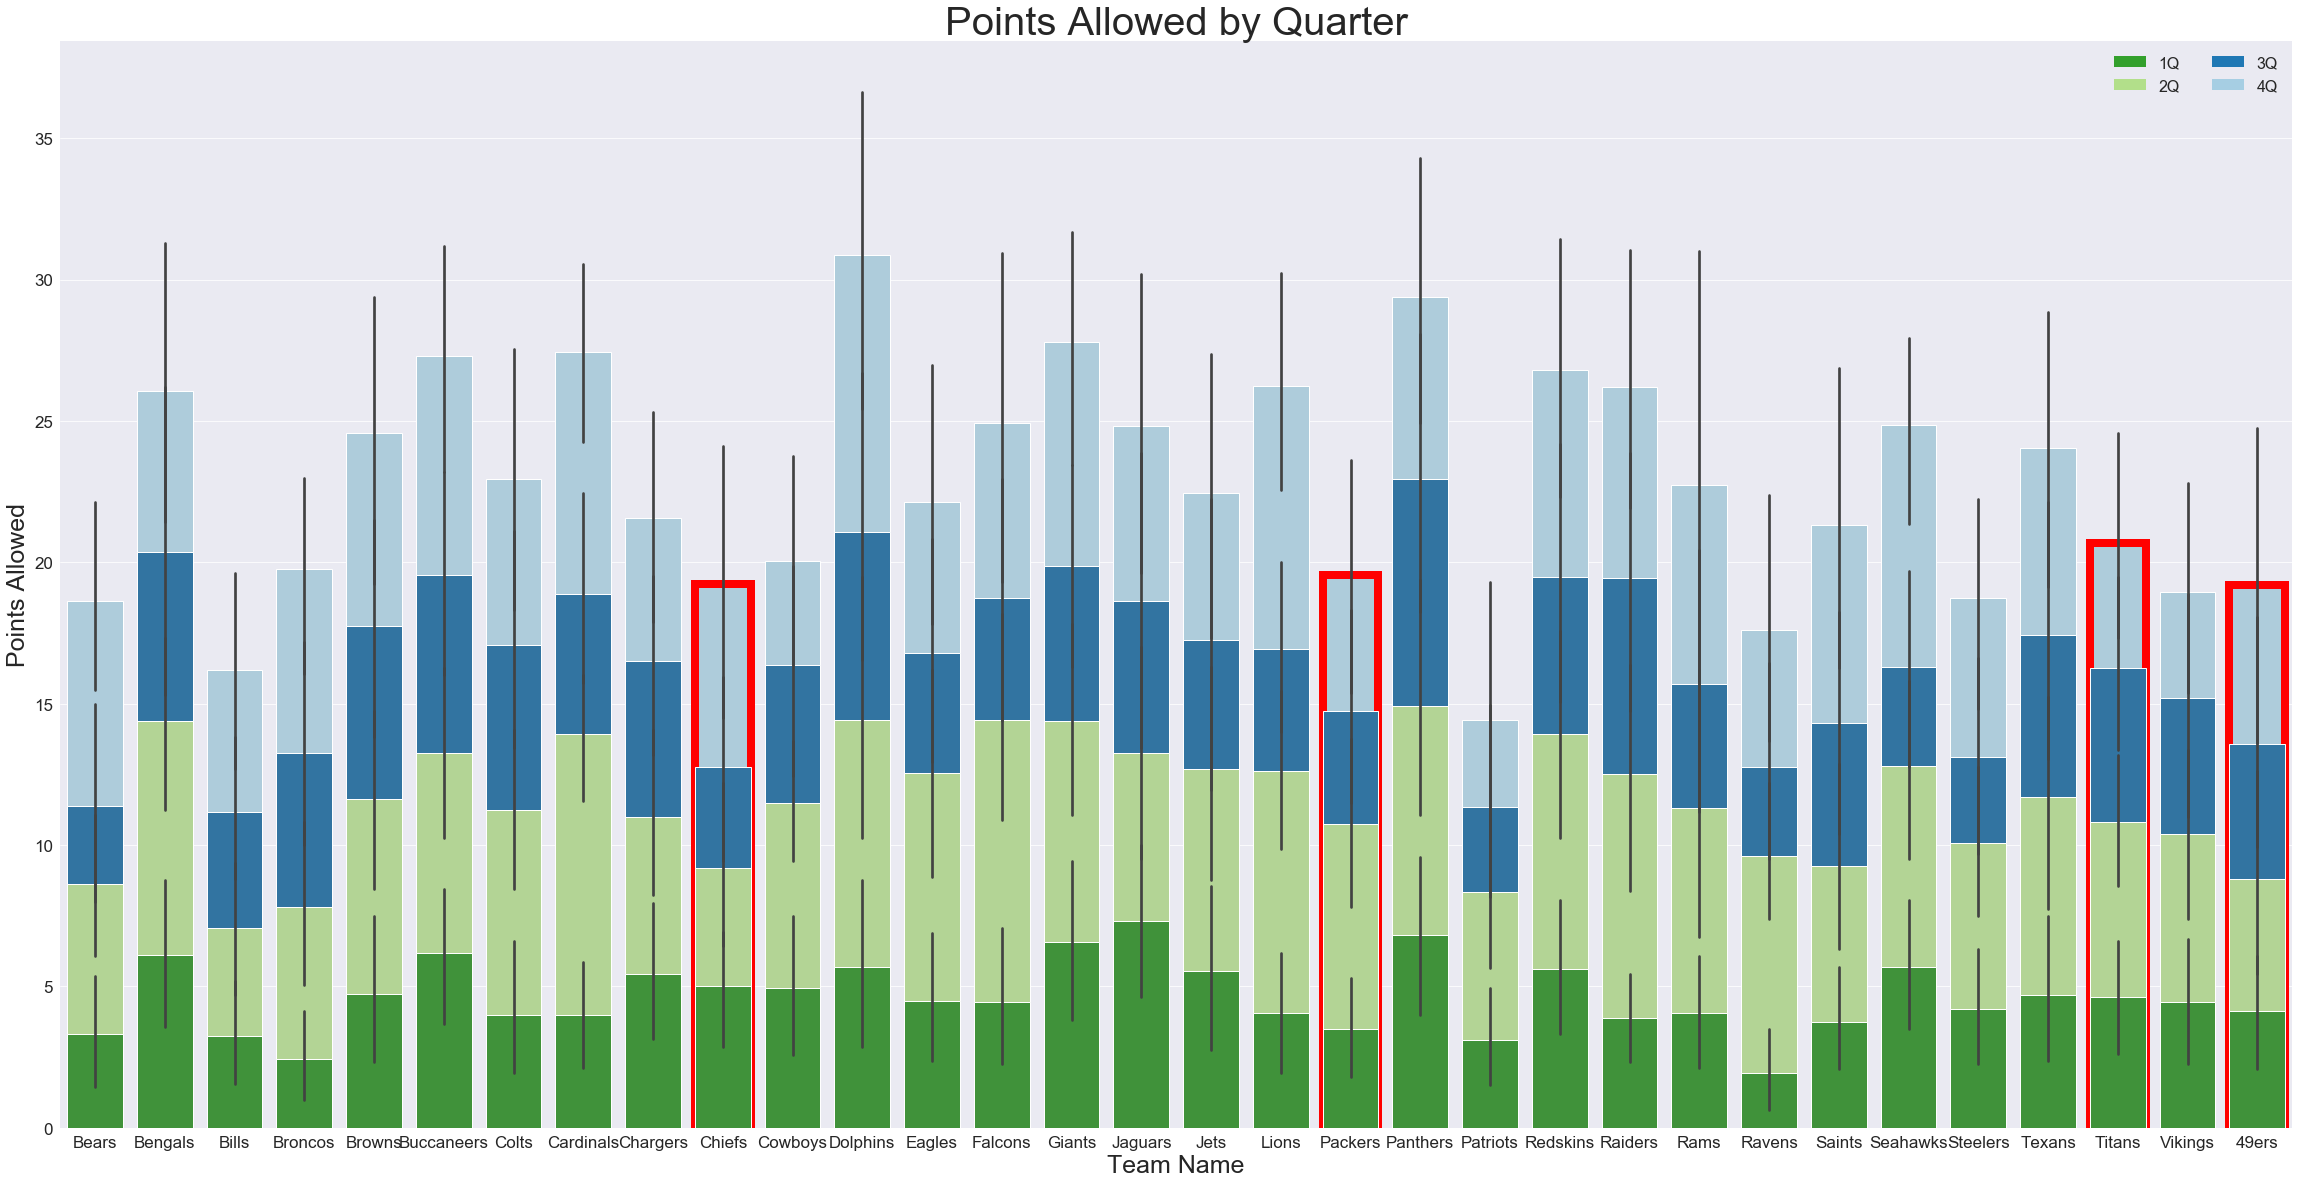

In [24]:
#setup
stacked_bar_data = data
stacked_bar_data["total"] = (stacked_bar_data.First_Al + stacked_bar_data.Second_Al + stacked_bar_data.Third_Al +
stacked_bar_data.Fourth_Al)
stacked_bar_data['third'] = (stacked_bar_data.First_Al + stacked_bar_data.Second_Al + stacked_bar_data.Third_Al)
stacked_bar_data['second'] = (stacked_bar_data.First_Al + stacked_bar_data.Second_Al)

#Set general plot properties
sns.set_style("darkgrid")
sns.set_context({"figure.figsize": (40, 20)})
palette = iter(sns.color_palette("Paired", 4))

#plot
fourQ = sns.barplot(x = stacked_bar_data.Team_Name, y = stacked_bar_data.total, color = next(palette))

threeQ = sns.barplot(x = stacked_bar_data.Team_Name, y = stacked_bar_data.third, color = next(palette))

twoQ = sns.barplot(x = stacked_bar_data.Team_Name, y = stacked_bar_data.second, color=next(palette))

oneQ = sns.barplot(x = stacked_bar_data.Team_Name, y = stacked_bar_data.First_Al, color =next(palette))

# Loop over the bars to set unique edgecolor for top 4
for thisbar in fourQ.patches:
    # Set a different hatch for each bar
    if thisbar == fourQ.patches[9]:
        thisbar.set_edgecolor("red")
        thisbar.set_linewidth(8)
    elif thisbar == fourQ.patches[18]:
        thisbar.set_edgecolor("red")
        thisbar.set_linewidth(8)
    elif thisbar == fourQ.patches[29]:
        thisbar.set_edgecolor("red")
        thisbar.set_linewidth(8)
    elif thisbar == fourQ.patches[31]:
        thisbar.set_edgecolor("red")
        thisbar.set_linewidth(8)  
    else:
        continue

palette = iter(sns.color_palette("Paired", 4))

#more settings
leg4 = plt.Rectangle((0,0),1,1,fc=next(palette), edgecolor = 'none')
leg3 = plt.Rectangle((0,0),1,1,fc=next(palette), edgecolor = 'none')
leg2 = plt.Rectangle((0,0),1,1,fc=next(palette), edgecolor = 'none')
leg1 = plt.Rectangle((0,0),1,1,fc=next(palette),  edgecolor = 'none')
l = plt.legend([leg1, leg2, leg3, leg4], ['1Q', '2Q', '3Q','4Q'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)
fourQ.set_ylabel("Points Allowed")
fourQ.set_xlabel("Team Name")
fourQ.set_title("Points Allowed by Quarter", fontsize=40)

#Set fonts to consistent 16pt size
for item in ([fourQ.xaxis.label, fourQ.yaxis.label]):
    item.set_fontsize(25)
    
for item in (fourQ.get_xticklabels() + fourQ.get_yticklabels()):
    item.set_fontsize(17)

##### It appears that the top 4 teams are in the lower half of average points allowed but certainly aren't in the bottom. 

In [25]:
teams = data.Team_Name.unique()
Total_Allowed = {}

for team in teams:
    Total_Allowed.update({team : data.loc[data['Team_Name'] == team]['Pts_Al'].sum()})

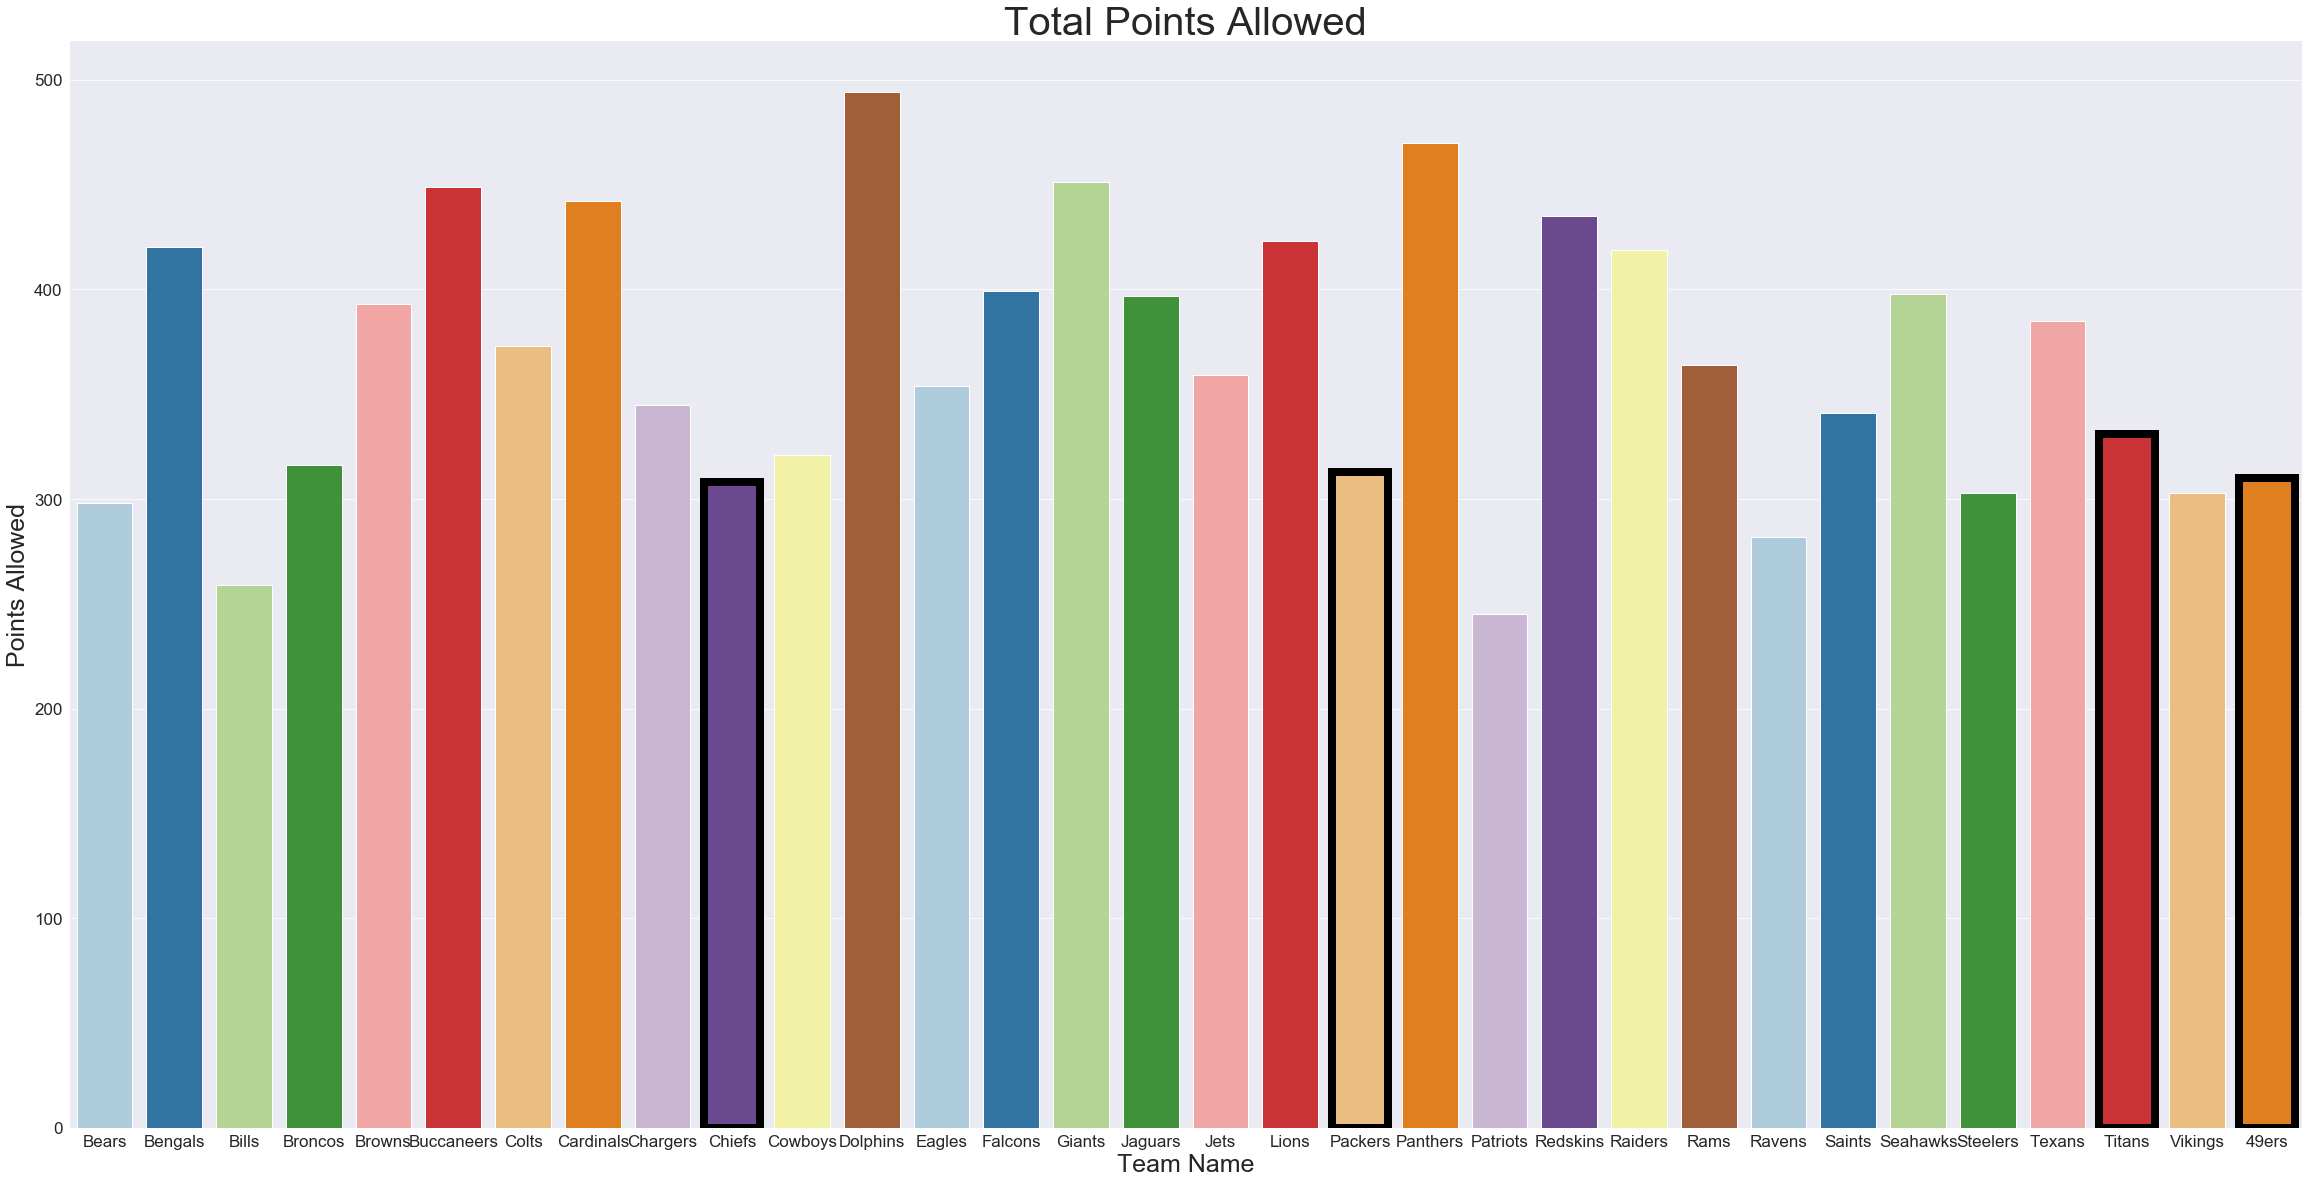

In [26]:
sns.set_style("darkgrid")
sns.set_context({"figure.figsize": (40, 20)})

scores = sns.barplot(x=list(Total_Allowed.keys()), y=list(Total_Allowed.values()), 
                     palette = sns.color_palette('Paired',32))

for thisbar in scores.patches:
    # Set a different hatch for each bar
    if thisbar == scores.patches[9]:
        thisbar.set_edgecolor("black")
        thisbar.set_linewidth(8)
    elif thisbar == scores.patches[18]:
        thisbar.set_edgecolor("black")
        thisbar.set_linewidth(8)
    elif thisbar == scores.patches[29]:
        thisbar.set_edgecolor("black")
        thisbar.set_linewidth(8)
    elif thisbar == scores.patches[31]:
        thisbar.set_edgecolor("black")
        thisbar.set_linewidth(8)  
    else:
        continue
        
        #Labeling
sns.despine(left=True)
scores.set_ylabel("Points Allowed")
scores.set_xlabel("Team Name")
scores.set_title("Total Points Allowed", fontsize=40)

#Set fonts to consistent 16pt size
for item in ([scores.xaxis.label, scores.yaxis.label]):
    item.set_fontsize(25)
    
for item in (scores.get_xticklabels() + scores.get_yticklabels()):
    item.set_fontsize(17)

In [27]:
Sorted_Allowed = sorted(Total_Allowed.items(), key=lambda x: x[1])


print("Points Allowed: Least to Greatest",'\n')

for i in Sorted_Allowed:
    print(i[0], i[1])

Points Allowed: Least to Greatest 

Patriots 245
Bills 259
Ravens 282
Bears 298
Steelers 303
Vikings 303
Chiefs 308
49ers 310
Packers 313
Broncos 316
Cowboys 321
Titans 331
Saints 341
Chargers 345
Eagles 354
Jets 359
Rams 364
Colts 373
Texans 385
Browns 393
Jaguars 397
Seahawks 398
Falcons 399
Raiders 419
Bengals 420
Lions 423
Redskins 435
Cardinals 442
Buccaneers 449
Giants 451
Panthers 470
Dolphins 494


##### Similar to the offensive side of the ball, it appears that scoring matters but couldn't be used as a predictive measure. Of the top ten lowerst points allowed 7 made the playoffs and both superbowl contenders are present. 

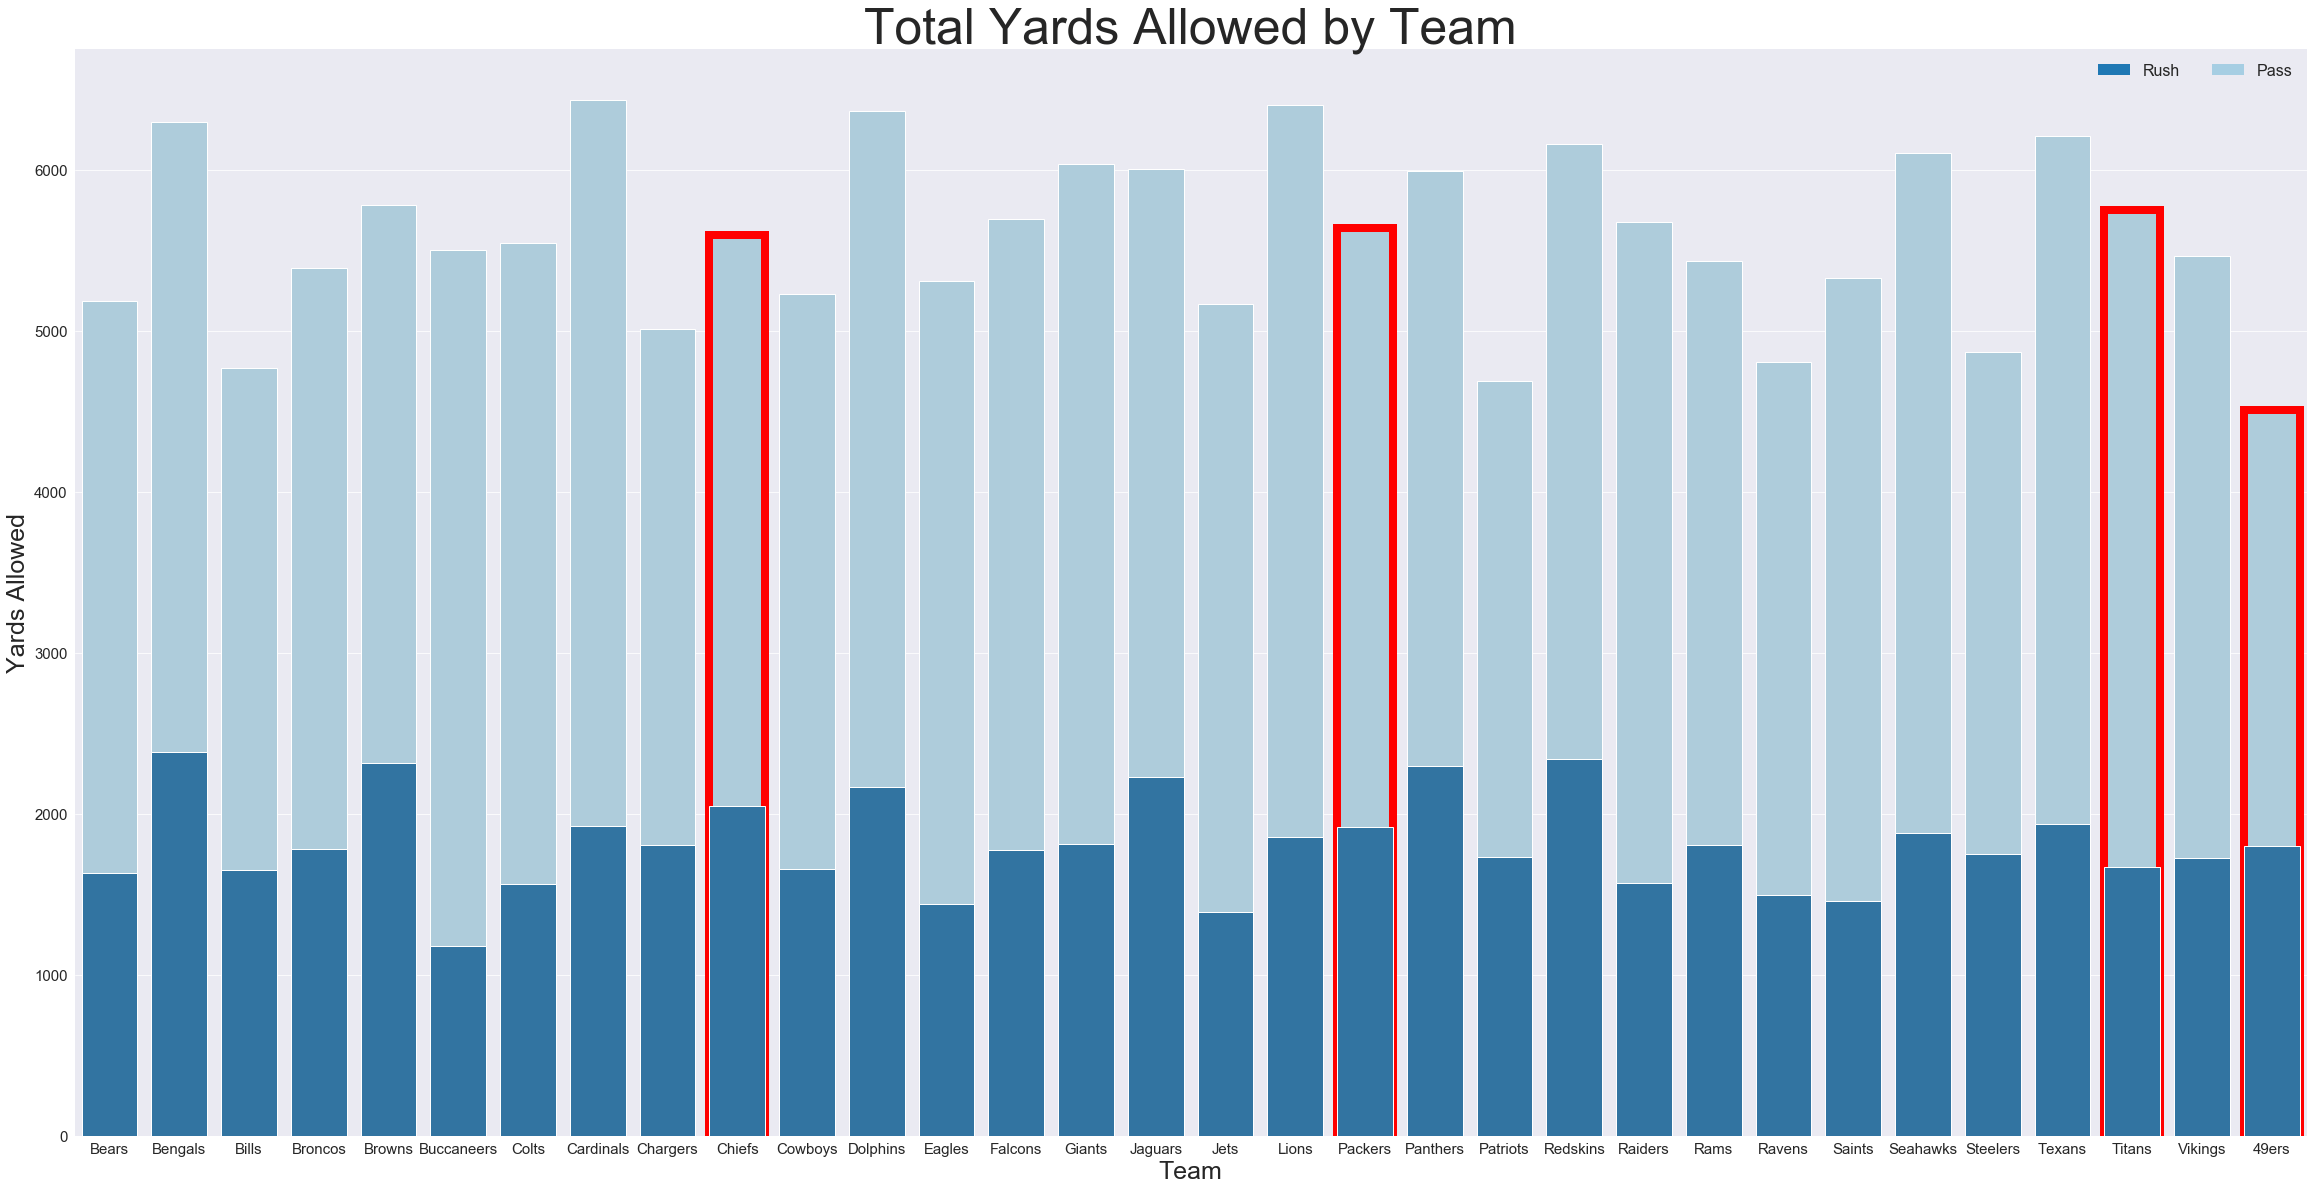

In [28]:
#prep data 
stacked_bar_data = data
stacked_bar_data["total"] = stacked_bar_data.loc[stacked_bar_data['Week'] == 'Week_17']['Total_Rush_Yds_Al'] + stacked_bar_data.loc[stacked_bar_data['Week'] == 'Week_17']['Total_Pass_Yds_Al']
palette = iter(sns.color_palette("Paired", 2))

#plot top series
top_plot = sns.barplot(x = stacked_bar_data['Team_Name'], y = stacked_bar_data.total, color = next(palette))

#plot bottom series
bottom_plot = sns.barplot(x = stacked_bar_data['Team_Name'], y = stacked_bar_data.loc[stacked_bar_data['Week'] == 'Week_17']['Total_Rush_Yds_Al'], 
                          color = next(palette))

# Loop over the bars to set unique edgecolor for top 4
for thisbar in top_plot.patches:
    # Set a different hatch for each bar
    if thisbar == top_plot.patches[9]:
        thisbar.set_edgecolor("red")
        thisbar.set_linewidth(8)
    elif thisbar == top_plot.patches[18]:
        thisbar.set_edgecolor("red")
        thisbar.set_linewidth(8)
    elif thisbar == top_plot.patches[29]:
        thisbar.set_edgecolor("red")
        thisbar.set_linewidth(8)
    elif thisbar == top_plot.patches[31]:
        thisbar.set_edgecolor("red")
        thisbar.set_linewidth(8)  
    else:
        continue 

#prep plot
palette = iter(sns.color_palette("Paired", 2))

topbar = plt.Rectangle((0,0),1,1,fc=next(palette), edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc=next(palette),  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Rush', 'Pass'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

#graph beautifucation
sns.set_context({"figure.figsize": (40, 20)})
sns.despine(left=True)
bottom_plot.set_ylabel("Yards Allowed")
bottom_plot.set_xlabel("Team")
bottom_plot.set_title("Total Yards Allowed by Team", fontsize=50)

#font regularization
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label]):
    item.set_fontsize(25)
    
for item in (bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(15)

##### Interestingly, yardage allowed doesn't seem to matter quite as much as some other things we have looked at. It appears the 49ers are quite low but the top 4 teams and several other playoff teams are closer to the upper end. This doesn't seem to correspond much with making the playoffs but let's look at a list.

In [29]:
teams = data.Team_Name.unique()
Total_Yds_Al = {}

for team in teams:
    Total_Yds_Al.update({team : data.loc[data['Team_Name'] == team]['Total_Yds_Gm_Al'].sum()})

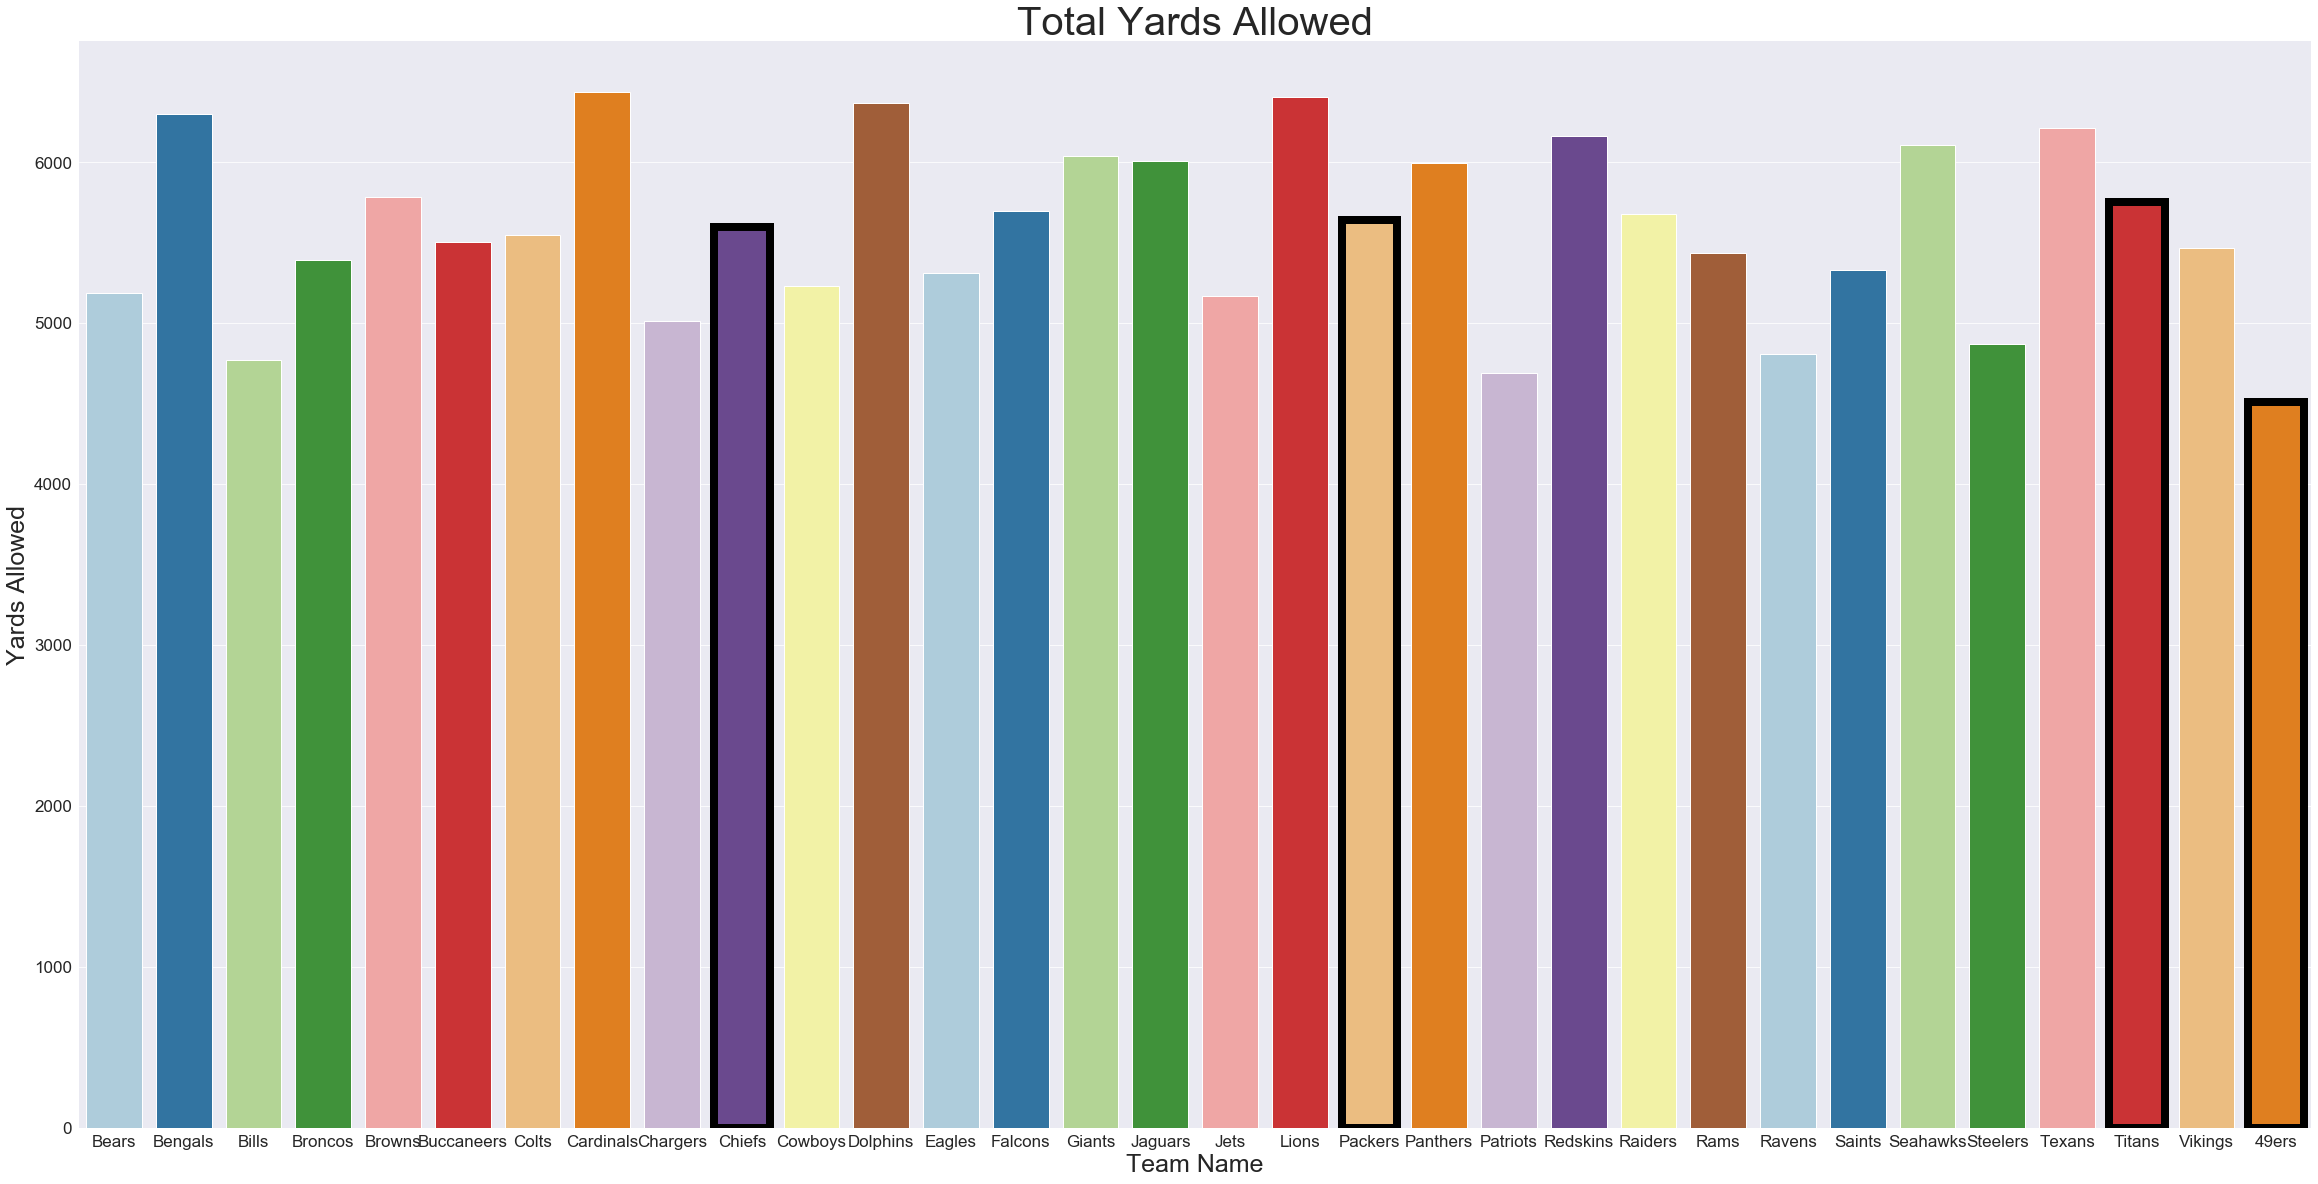

In [30]:
sns.set_style("darkgrid")
sns.set_context({"figure.figsize": (40, 20)})

scores = sns.barplot(x=list(Total_Yds_Al.keys()), y=list(Total_Yds_Al.values()), 
                     palette = sns.color_palette('Paired',32))

for thisbar in scores.patches:
    # Set a different hatch for each bar
    if thisbar == scores.patches[9]:
        thisbar.set_edgecolor("black")
        thisbar.set_linewidth(8)
    elif thisbar == scores.patches[18]:
        thisbar.set_edgecolor("black")
        thisbar.set_linewidth(8)
    elif thisbar == scores.patches[29]:
        thisbar.set_edgecolor("black")
        thisbar.set_linewidth(8)
    elif thisbar == scores.patches[31]:
        thisbar.set_edgecolor("black")
        thisbar.set_linewidth(8)  
    else:
        continue
        
        #Labeling
sns.despine(left=True)
scores.set_ylabel("Yards Allowed")
scores.set_xlabel("Team Name")
scores.set_title("Total Yards Allowed", fontsize=40)

#Set fonts to consistent 16pt size
for item in ([scores.xaxis.label, scores.yaxis.label]):
    item.set_fontsize(25)
    
for item in (scores.get_xticklabels() + scores.get_yticklabels()):
    item.set_fontsize(17)

^^ same as the previous graph but without the run/pass breakdown

In [35]:
Sorted_Yds_Allowed = sorted(Total_Yds_Al.items(), key=lambda x: x[1])


print("Points Allowed: Least to Greatest",'\n')

for i in Sorted_Yds_Allowed:
    print(i[0], i[1])

Points Allowed: Least to Greatest 

49ers 4509.0
Patriots 4686.0
Bills 4772.0
Ravens 4809.0
Steelers 4866.0
Chargers 5009.0
Jets 5170.0
Bears 5186.0
Cowboys 5232.0
Eagles 5307.0
Saints 5329.0
Broncos 5392.0
Rams 5434.0
Vikings 5465.0
Buccaneers 5503.0
Colts 5549.0
Chiefs 5594.0
Packers 5642.0
Raiders 5677.0
Falcons 5693.0
Titans 5752.0
Browns 5785.0
Panthers 5992.0
Jaguars 6007.0
Giants 6037.0
Seahawks 6106.0
Redskins 6162.0
Texans 6213.0
Bengals 6299.0
Dolphins 6364.0
Lions 6406.0
Cardinals 6432.0


##### Unlike the offensive side of the ball, yaradage allowed doesn't appear to do a great job of predicting success. Although there are 5 playoff contenders in the top 10 lowest yardage allowed, our superbowl winner is 17th on the list. Also, the texans and seahawks are both in the bottom ten but still made the playoffs. 

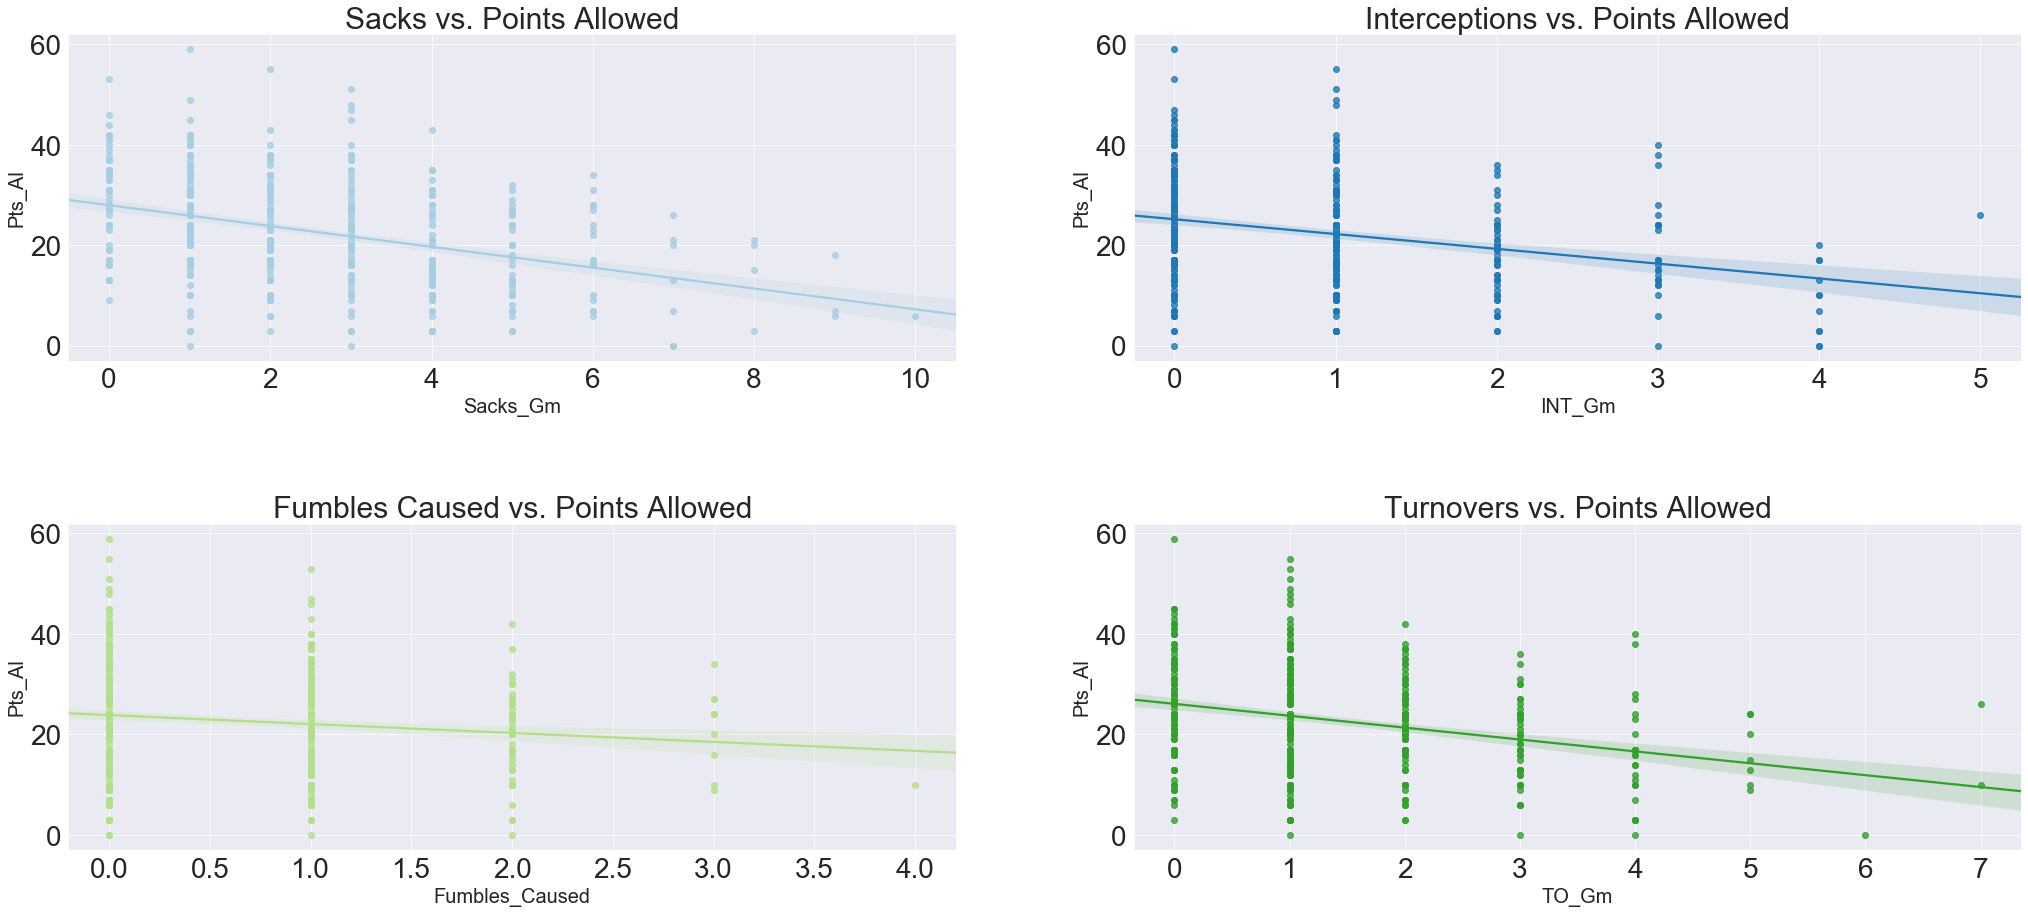

In [72]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(35,15))
palette = iter(sns.color_palette("Paired", 4))

plt.subplots_adjust(hspace = .5);
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["axes.titlesize"] = 30
plt.rcParams["xtick.labelsize"] = 28
plt.rcParams["ytick.labelsize"] = 28

sns.regplot('Sacks_Gm','Pts_Al', data=data, color = next(palette),
            ax=axs[0,0]).set_title('Sacks vs. Points Allowed');
sns.regplot('INT_Gm', 'Pts_Al', data=data,  color = next(palette),
            ax=axs[0,1]).set_title('Interceptions vs. Points Allowed');
sns.regplot('Fumbles_Caused','Pts_Al', data=data,  color = next(palette),
            ax=axs[1,0]).set_title('Fumbles Caused vs. Points Allowed');
sns.regplot('TO_Gm','Pts_Al', data=data,  color = next(palette),
            ax=axs[1,1]).set_title('Turnovers vs. Points Allowed');

##### This seems obvious but all turnovers have a negative correlation with points allowed. 

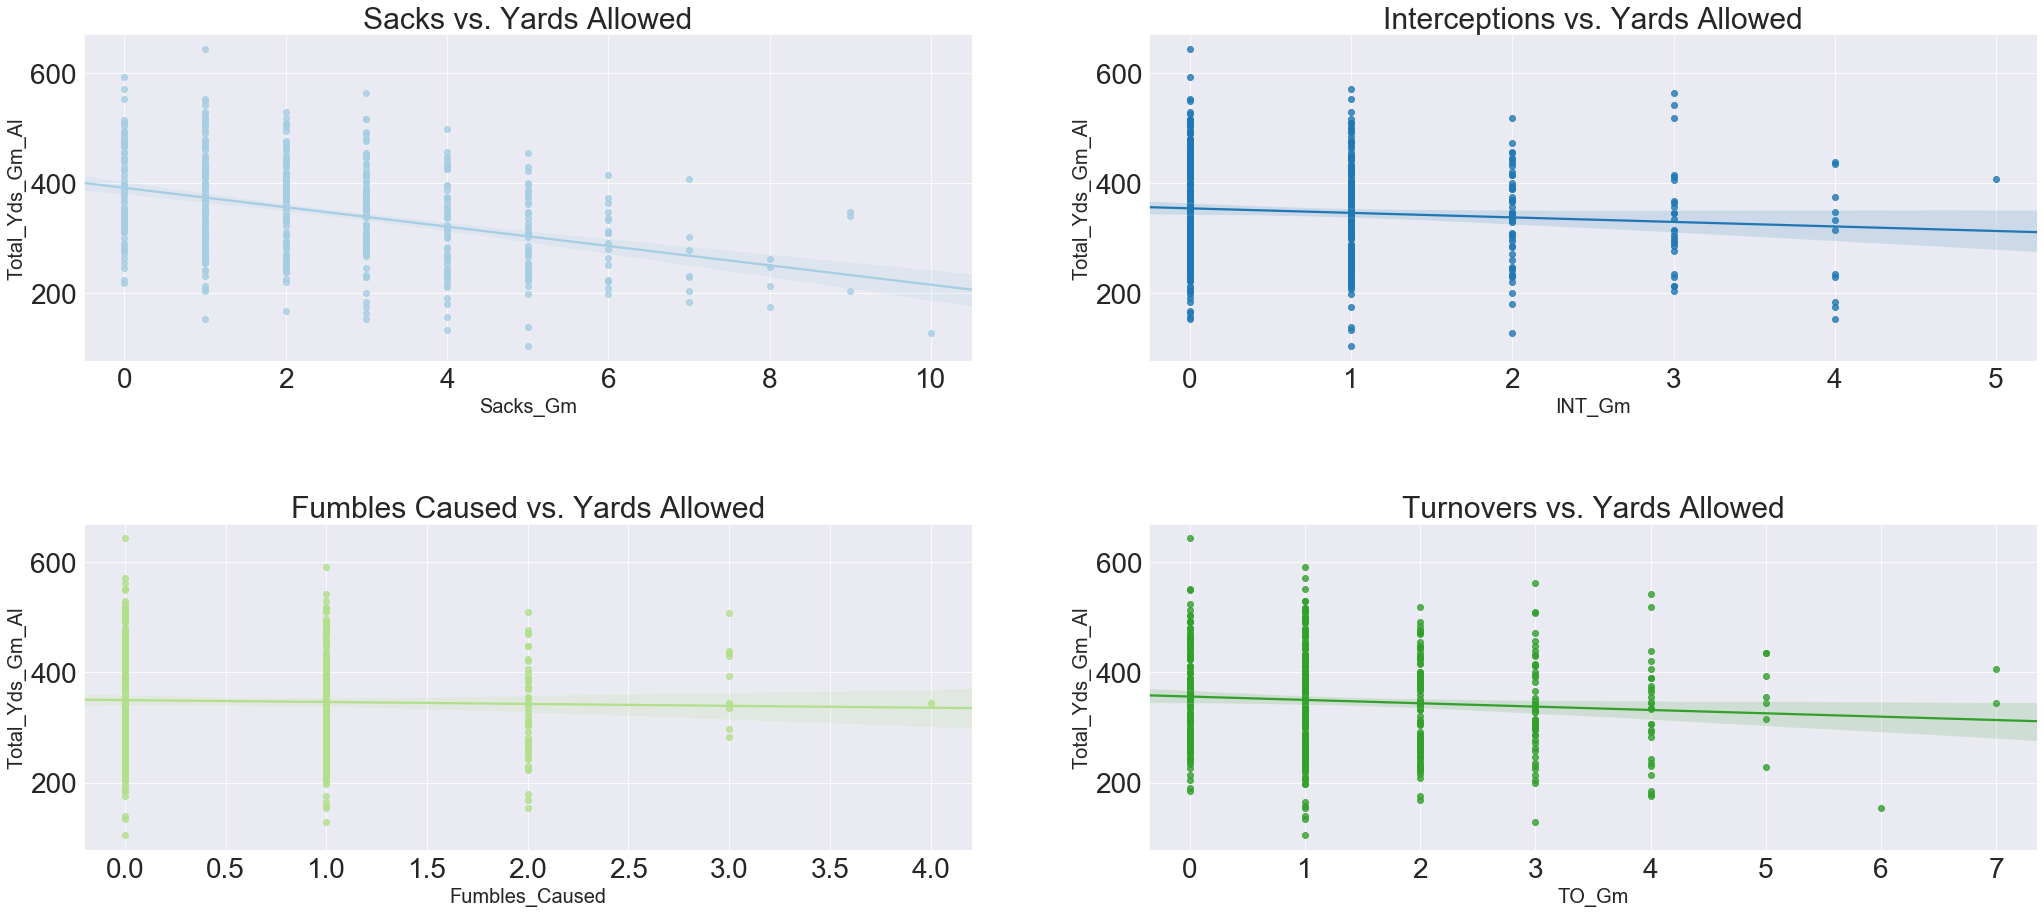

In [64]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(35,15))
palette = iter(sns.color_palette("Paired", 4))

plt.subplots_adjust(hspace = .5);
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["axes.titlesize"] = 30
plt.rcParams["xtick.labelsize"] = 28
plt.rcParams["ytick.labelsize"] = 28

sns.regplot('Sacks_Gm','Total_Yds_Gm_Al', data=data, color = next(palette),
            ax=axs[0,0]).set_title('Sacks vs. Yards Allowed');
sns.regplot('INT_Gm', 'Total_Yds_Gm_Al', data=data,  color = next(palette),
            ax=axs[0,1]).set_title('Interceptions vs. Yards Allowed');
sns.regplot('Fumbles_Caused','Total_Yds_Gm_Al', data=data,  color = next(palette),
            ax=axs[1,0]).set_title('Fumbles Caused vs. Yards Allowed');
sns.regplot('TO_Gm','Total_Yds_Gm_Al', data=data,  color = next(palette),
            ax=axs[1,1]).set_title('Turnovers vs. Yards Allowed');

##### Although yards allowed wasn't as strong a correlation with success, it's still an important measure. This graph demonstrates that interceptions, fumbles caused, and total turnovers did have slightly negative correlation to yards allowed but sacks has quite a strong correlation. We couldn't definitively say that sacks matter more than interceptions or fumbles but this suggests that they may be.

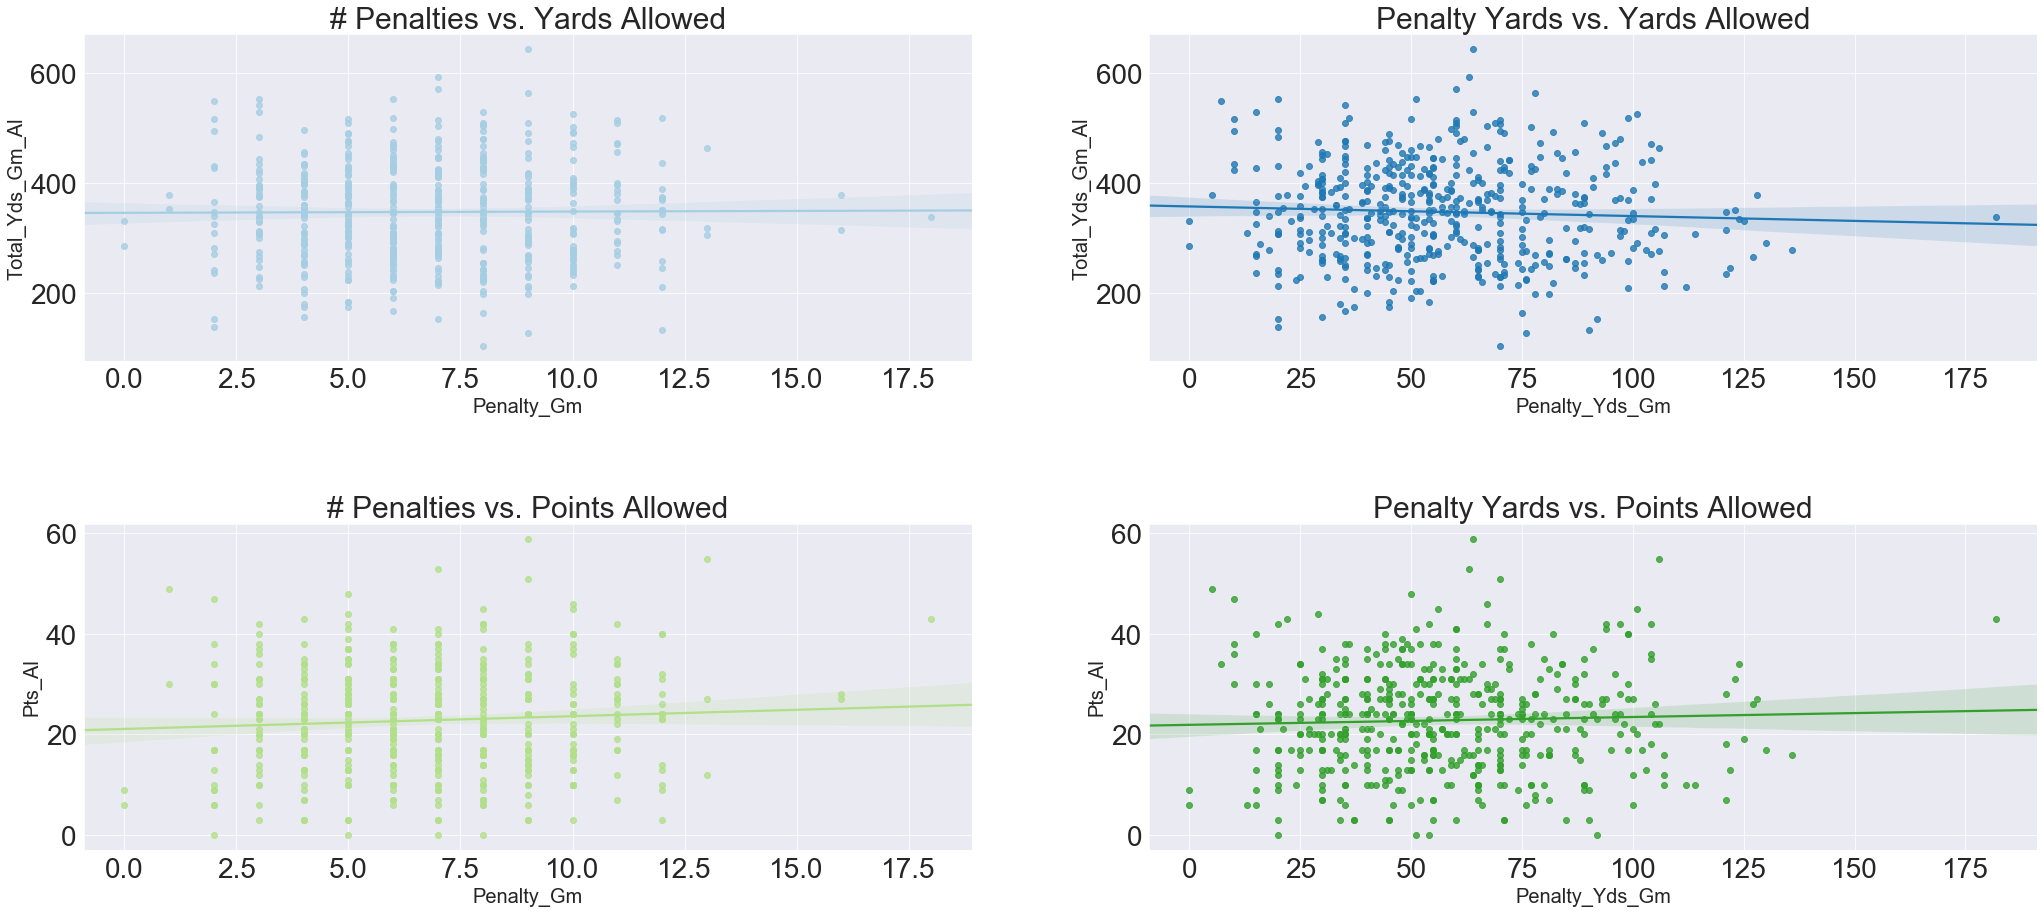

In [77]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(35,15))
palette = iter(sns.color_palette("Paired", 4))

plt.subplots_adjust(hspace = .5);
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["axes.titlesize"] = 30
plt.rcParams["xtick.labelsize"] = 28
plt.rcParams["ytick.labelsize"] = 28

sns.regplot('Penalty_Gm','Total_Yds_Gm_Al', data=data, color = next(palette),
            ax=axs[0,0]).set_title('# Penalties vs. Yards Allowed');
sns.regplot('Penalty_Yds_Gm', 'Total_Yds_Gm_Al', data=data,  color = next(palette),
            ax=axs[0,1]).set_title('Penalty Yards vs. Yards Allowed');
sns.regplot('Penalty_Gm','Pts_Al', data=data,  color = next(palette),
            ax=axs[1,0]).set_title('# Penalties vs. Points Allowed');
sns.regplot('Penalty_Yds_Gm','Pts_Al', data=data,  color = next(palette),
            ax=axs[1,1]).set_title('Penalty Yards vs. Points Allowed');

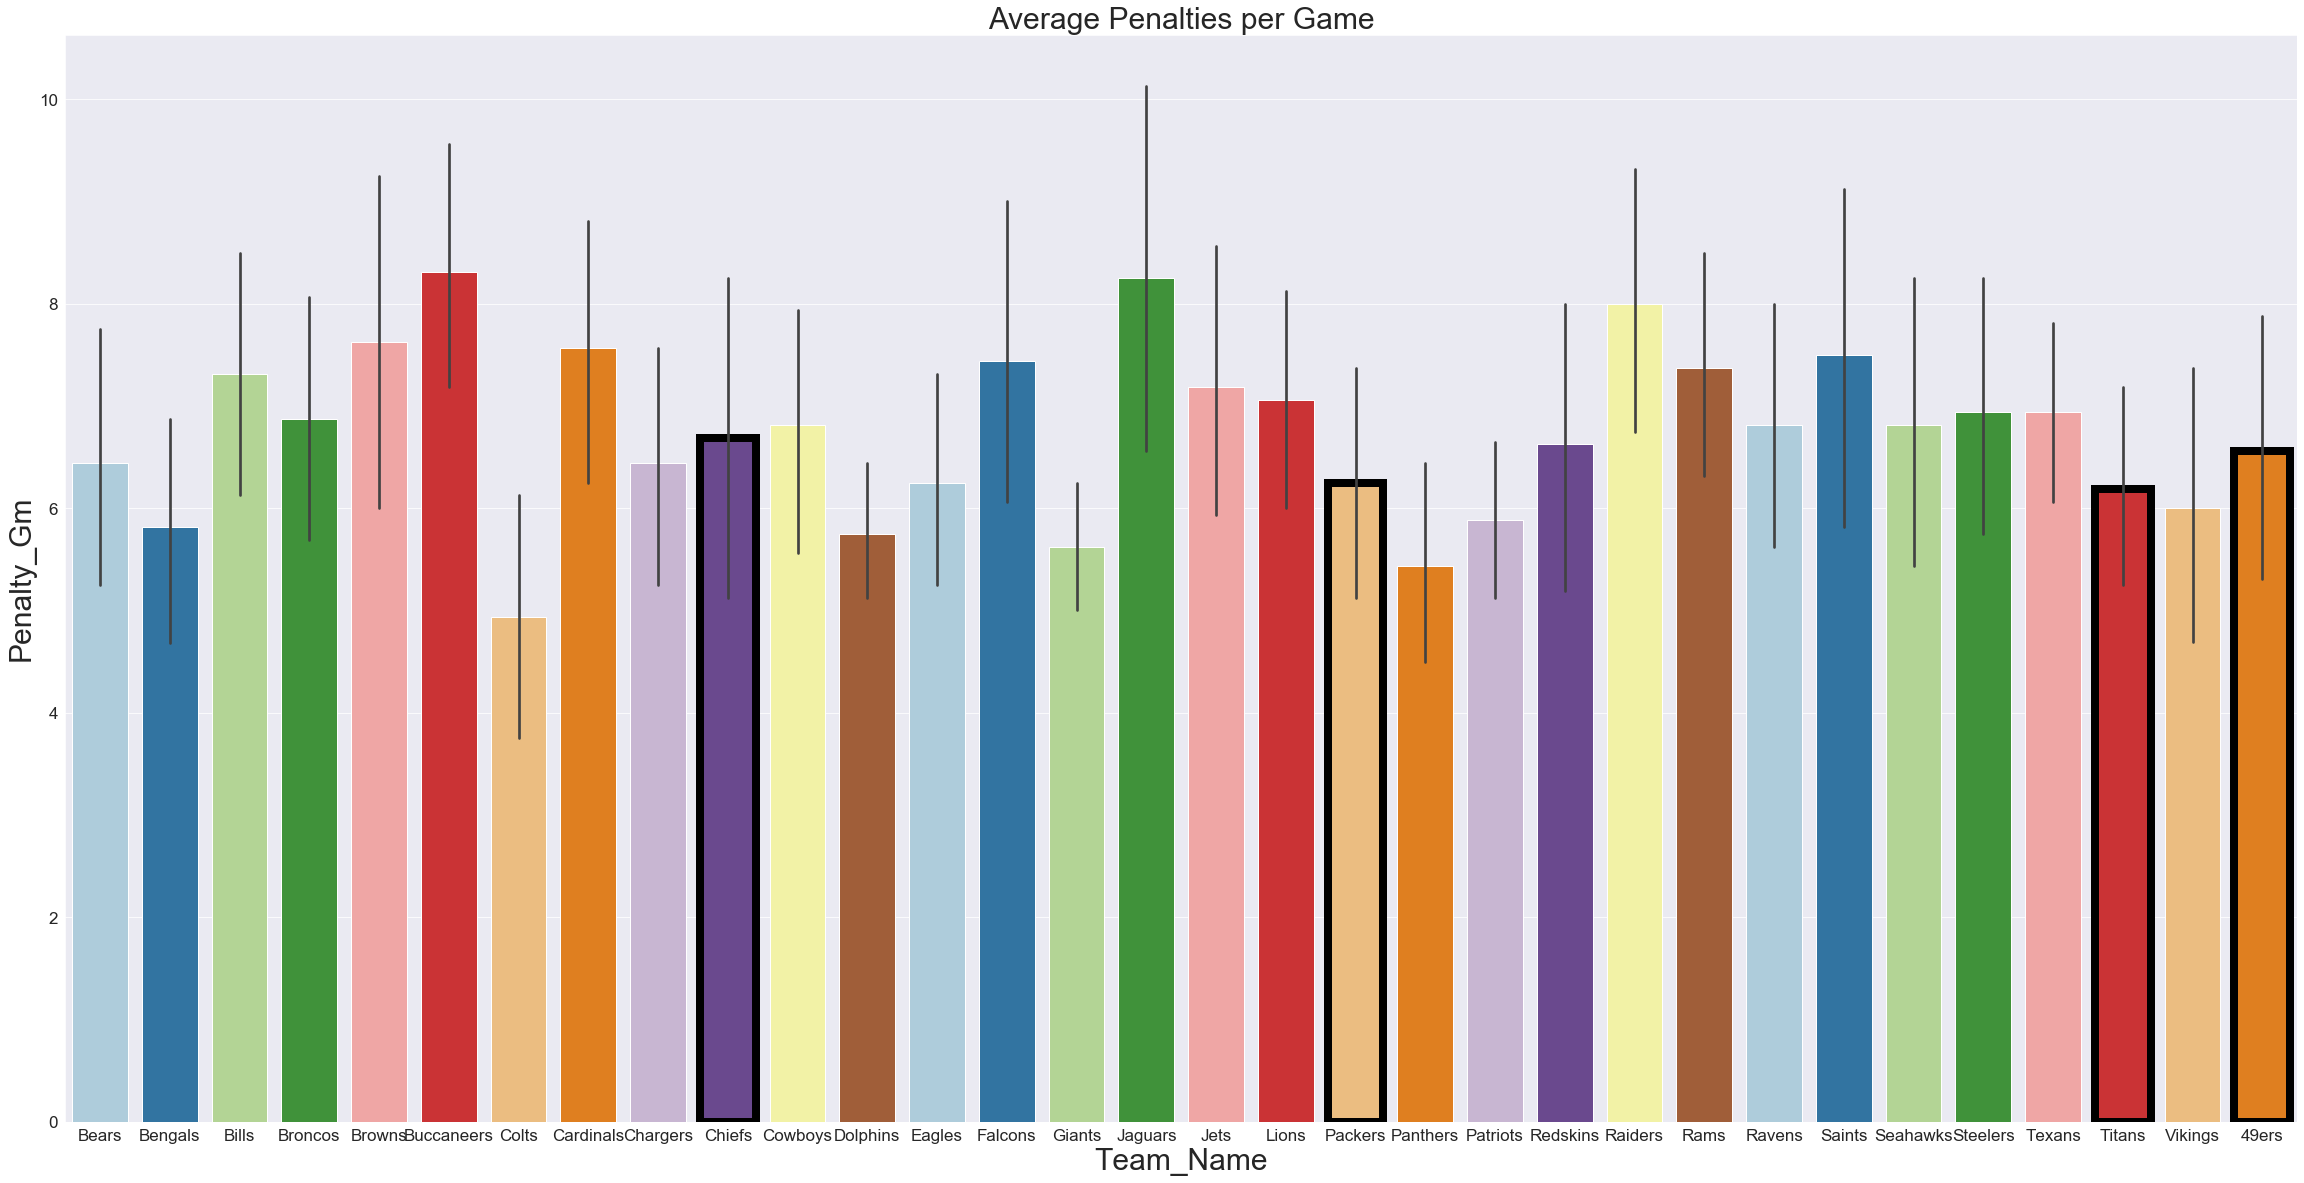

In [112]:
penalties = sns.barplot(x=data.Team_Name, y=data.Penalty_Gm, palette = sns.color_palette('Paired'))

penalties.set_title('Average Penalties per Game')

for thisbar in penalties.patches:
    # Set a different hatch for each bar
    if thisbar == penalties.patches[9]:
        thisbar.set_edgecolor("black")
        thisbar.set_linewidth(8)
    elif thisbar == penalties.patches[18]:
        thisbar.set_edgecolor("black")
        thisbar.set_linewidth(8)
    elif thisbar == penalties.patches[29]:
        thisbar.set_edgecolor("black")
        thisbar.set_linewidth(8)
    elif thisbar == penalties.patches[31]:
        thisbar.set_edgecolor("black")
        thisbar.set_linewidth(8)  
    else:
        continue

for item in ([penalties.xaxis.label, penalties.yaxis.label]):
    item.set_fontsize(30)
    
for item in (penalties.get_xticklabels() + penalties.get_yticklabels()):
    item.set_fontsize(17)

##### Mirroring the offensive side of the ball, penalties have little to no corelation with yards allowed or points allowed

In [133]:
print('Average Points Allowed in Wins','\n')
print(Wins.Pts_Al.sum()/len(Wins), '\n')
print('Average Points Allowed in Loses', '\n')
print(Loses.Pts_Al.sum()/len(Loses),'\n')

Average Points Allowed in Wins 

17.05078125 

Average Points Allowed in Loses 

28.540856031128406 



In [134]:
print('Average Yards Allowed in Wins','\n')
print(Wins.Total_Yds_Gm_Al.sum()/len(Wins), '\n')
print('Average Yards Allowed in Loses', '\n')
print(Loses.Total_Yds_Gm_Al.sum()/len(Loses),'\n')

Average Yards Allowed in Wins 

319.28515625 

Average Yards Allowed in Loses 

376.03891050583655 



##### Noted: this information, as it should, mirrors the information seen earlier in the offensive section. This is somewhat repetitive but a good reminder and direct comparison.

##### Teams which won games had an average of 17 points allowed and 319 yards allowed. This additionally corresponds with 3 sacks & 2 turnovers.

In [92]:
data.loc[(data.Pts_Al <= 18) & (data.Total_Yds_Gm_Al <= 319)
        & (data.Sacks_Gm >= 3) & (data.TO_Gm >= 2)]['Win'].value_counts()

1.0    34
0.0     3
Name: Win, dtype: int64

In [93]:
data.loc[(data.Pts_Al <= 18) & (data.Total_Yds_Gm_Al <= 319)
        & (data.Sacks_Gm >= 3) & (data.TO_Gm >= 2)]['Team_Name'].value_counts()

Steelers      6
Patriots      3
49ers         3
Vikings       2
Ravens        2
Cowboys       2
Rams          2
Colts         2
Buccaneers    1
Broncos       1
Panthers      1
Chiefs        1
Jets          1
Texans        1
Browns        1
Giants        1
Raiders       1
Redskins      1
Eagles        1
Jaguars       1
Bears         1
Bills         1
Packers       1
Name: Team_Name, dtype: int64

##### Although the Steelers surmounted an incredible 6 games touting these standards they still went a sub-par 8-8. This appears to make a good defense BUT still doesn't necessarily predict success.

##### I'm curious now what this will look like if I only include points allowed and sacks which seemed to have the strongest effect on success. 

In [94]:
data.loc[(data.Pts_Al <= 18) & (data.Sacks_Gm >= 3)]['Win'].value_counts()

1.0    101
0.0     12
Name: Win, dtype: int64

##### Wow. Teams who met just these two critereon won games 90% of the time. 

In [95]:
data.loc[(data.Pts_Al <= 18) & (data.Sacks_Gm >= 3)]['Team_Name'].value_counts()

Rams          7
Patriots      7
49ers         7
Vikings       6
Steelers      6
Packers       6
Bills         6
Jaguars       5
Colts         5
Eagles        5
Titans        5
Ravens        4
Chiefs        4
Cowboys       4
Broncos       3
Falcons       3
Bengals       3
Texans        3
Bears         3
Chargers      3
Buccaneers    2
Redskins      2
Saints        2
Seahawks      2
Browns        2
Raiders       2
Jets          2
Dolphins      1
Giants        1
Panthers      1
Cardinals     1
Name: Team_Name, dtype: int64

##### These critereon did lead to teams winning more games BUT it appears not enough to be "successful" enough. That said, 6 of the top 10 did end up making the playoffs. 

### Defensive Summary

##### After performing an analysis of the defensive statistics I found:

        1. Points allowed appears to have a much stronger correlation with success than yardage allowed (which didn't seem to matter much at all)/ 
        
        2. Turnovers did appear to have a negative correlation with both points scored and yardage allowed. 
        
        3. Sacks had a strong negative correlation with both points scored and yardage allowed.
        
        4. Like offense, penalties seemed to have very little effect on success
        
        5. Defenses that held opponents to 18 points or less and leveed at least 3 sacks won 90% of the time. 

## Special Teams

##### Historically special teams has been thought of in a "could lose you a game but will never win you a game". Let's explore.

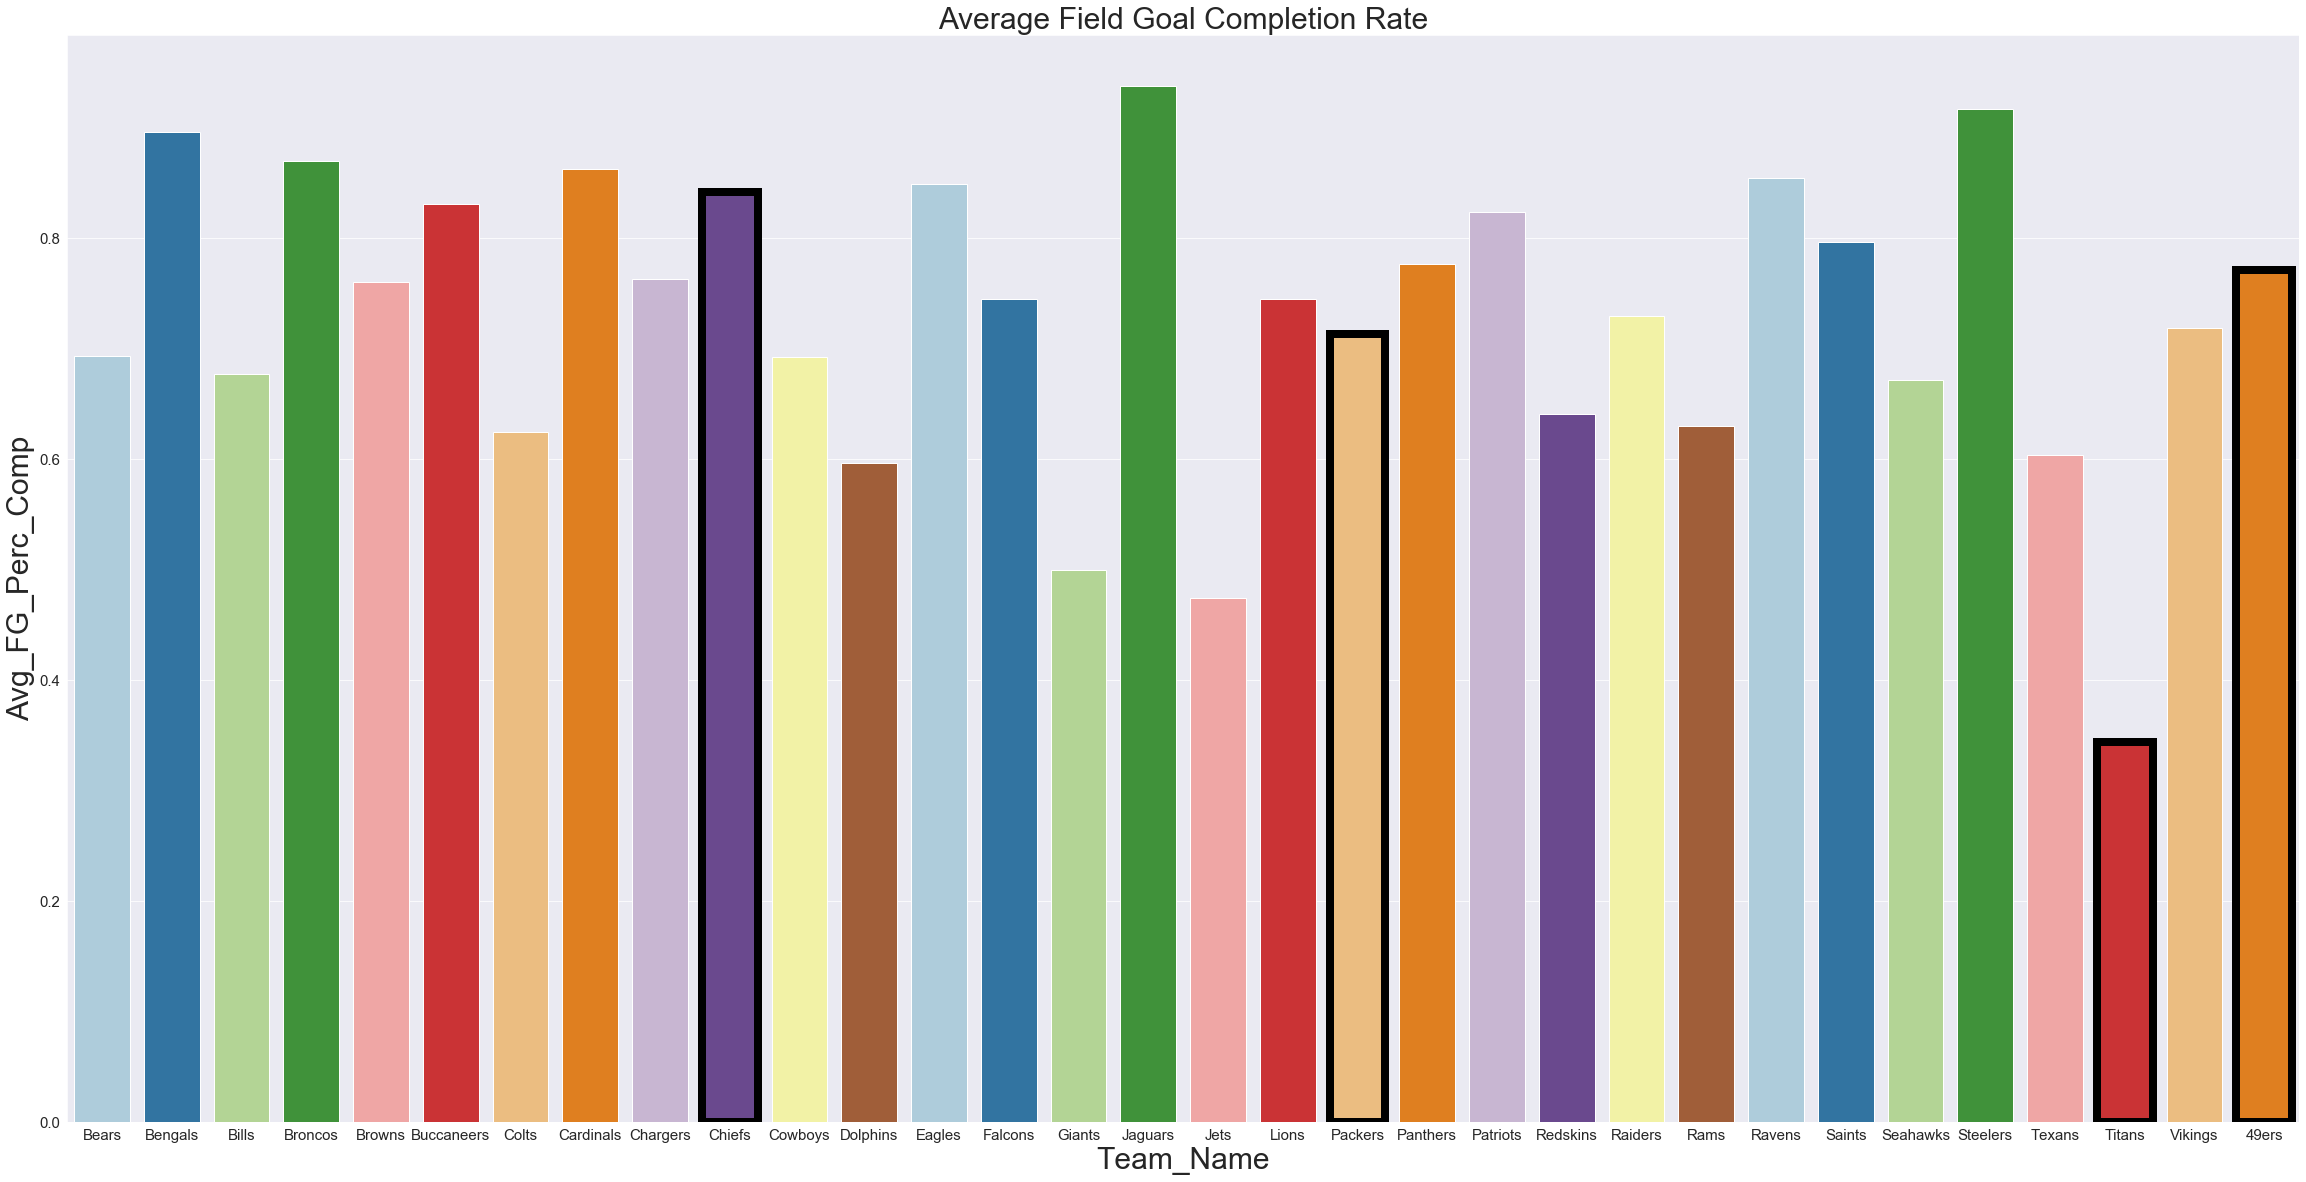

In [110]:
FG = sns.barplot(x = data.Team_Name, y=data.loc[data.Week == 'Week_17']['Avg_FG_Perc_Comp'],
           palette = sns.color_palette('Paired', 32))

FG.set_title('Average Field Goal Completion Rate')

for thisbar in FG.patches:
    # Set a different hatch for each bar
    if thisbar == FG.patches[9]:
        thisbar.set_edgecolor("black")
        thisbar.set_linewidth(8)
    elif thisbar == FG.patches[18]:
        thisbar.set_edgecolor("black")
        thisbar.set_linewidth(8)
    elif thisbar == FG.patches[29]:
        thisbar.set_edgecolor("black")
        thisbar.set_linewidth(8)
    elif thisbar == FG.patches[31]:
        thisbar.set_edgecolor("black")
        thisbar.set_linewidth(8)  
    else:
        continue

for item in ([FG.xaxis.label, FG.yaxis.label]):
    item.set_fontsize(30)
    
for item in (FG.get_xticklabels() + FG.get_yticklabels()):
    item.set_fontsize(15)

##### This is probably not very surprising, but it doesn't seem that FG completion rate are necessarily important for success. The Titans made it to the final four with the lowest completion rate! The other three teams in the top four are admittedly towards the top though so let's get a list.

In [124]:
data.loc[(data.Week == 'Week_17'), ['Team_Name', 
                                    'Avg_FG_Perc_Comp']].sort_values(by='Avg_FG_Perc_Comp')

Team_Name  Avg_FG_Perc_Comp
493      Titans          0.343750
276        Jets          0.473958
244      Giants          0.500000
195    Dolphins          0.596354
475      Texans          0.604167
112       Colts          0.625000
391        Rams          0.630208
359    Redskins          0.640625
441    Seahawks          0.671875
47        Bills          0.677083
179     Cowboys          0.692708
15        Bears          0.693750
308     Packers          0.713542
512     Vikings          0.718750
375     Raiders          0.729167
228     Falcons          0.744792
292       Lions          0.744792
80       Browns          0.760417
144    Chargers          0.763542
530       49ers          0.770833
326    Panthers          0.777083
424      Saints          0.796875
343    Patriots          0.823529
96   Buccaneers          0.831250
160      Chiefs          0.841667
211      Eagles          0.848958
407      Ravens          0.854167
128   Cardinals          0.862500
64      Broncos          0.869792
31      Bengals          0.895833
459    Steelers          0.916667
260     Jaguars          0.937500

##### This confirms it for me - of the ten best FG percentages only 4 of the playoff contenders are found, which is the same number we find in the bottom 10. 

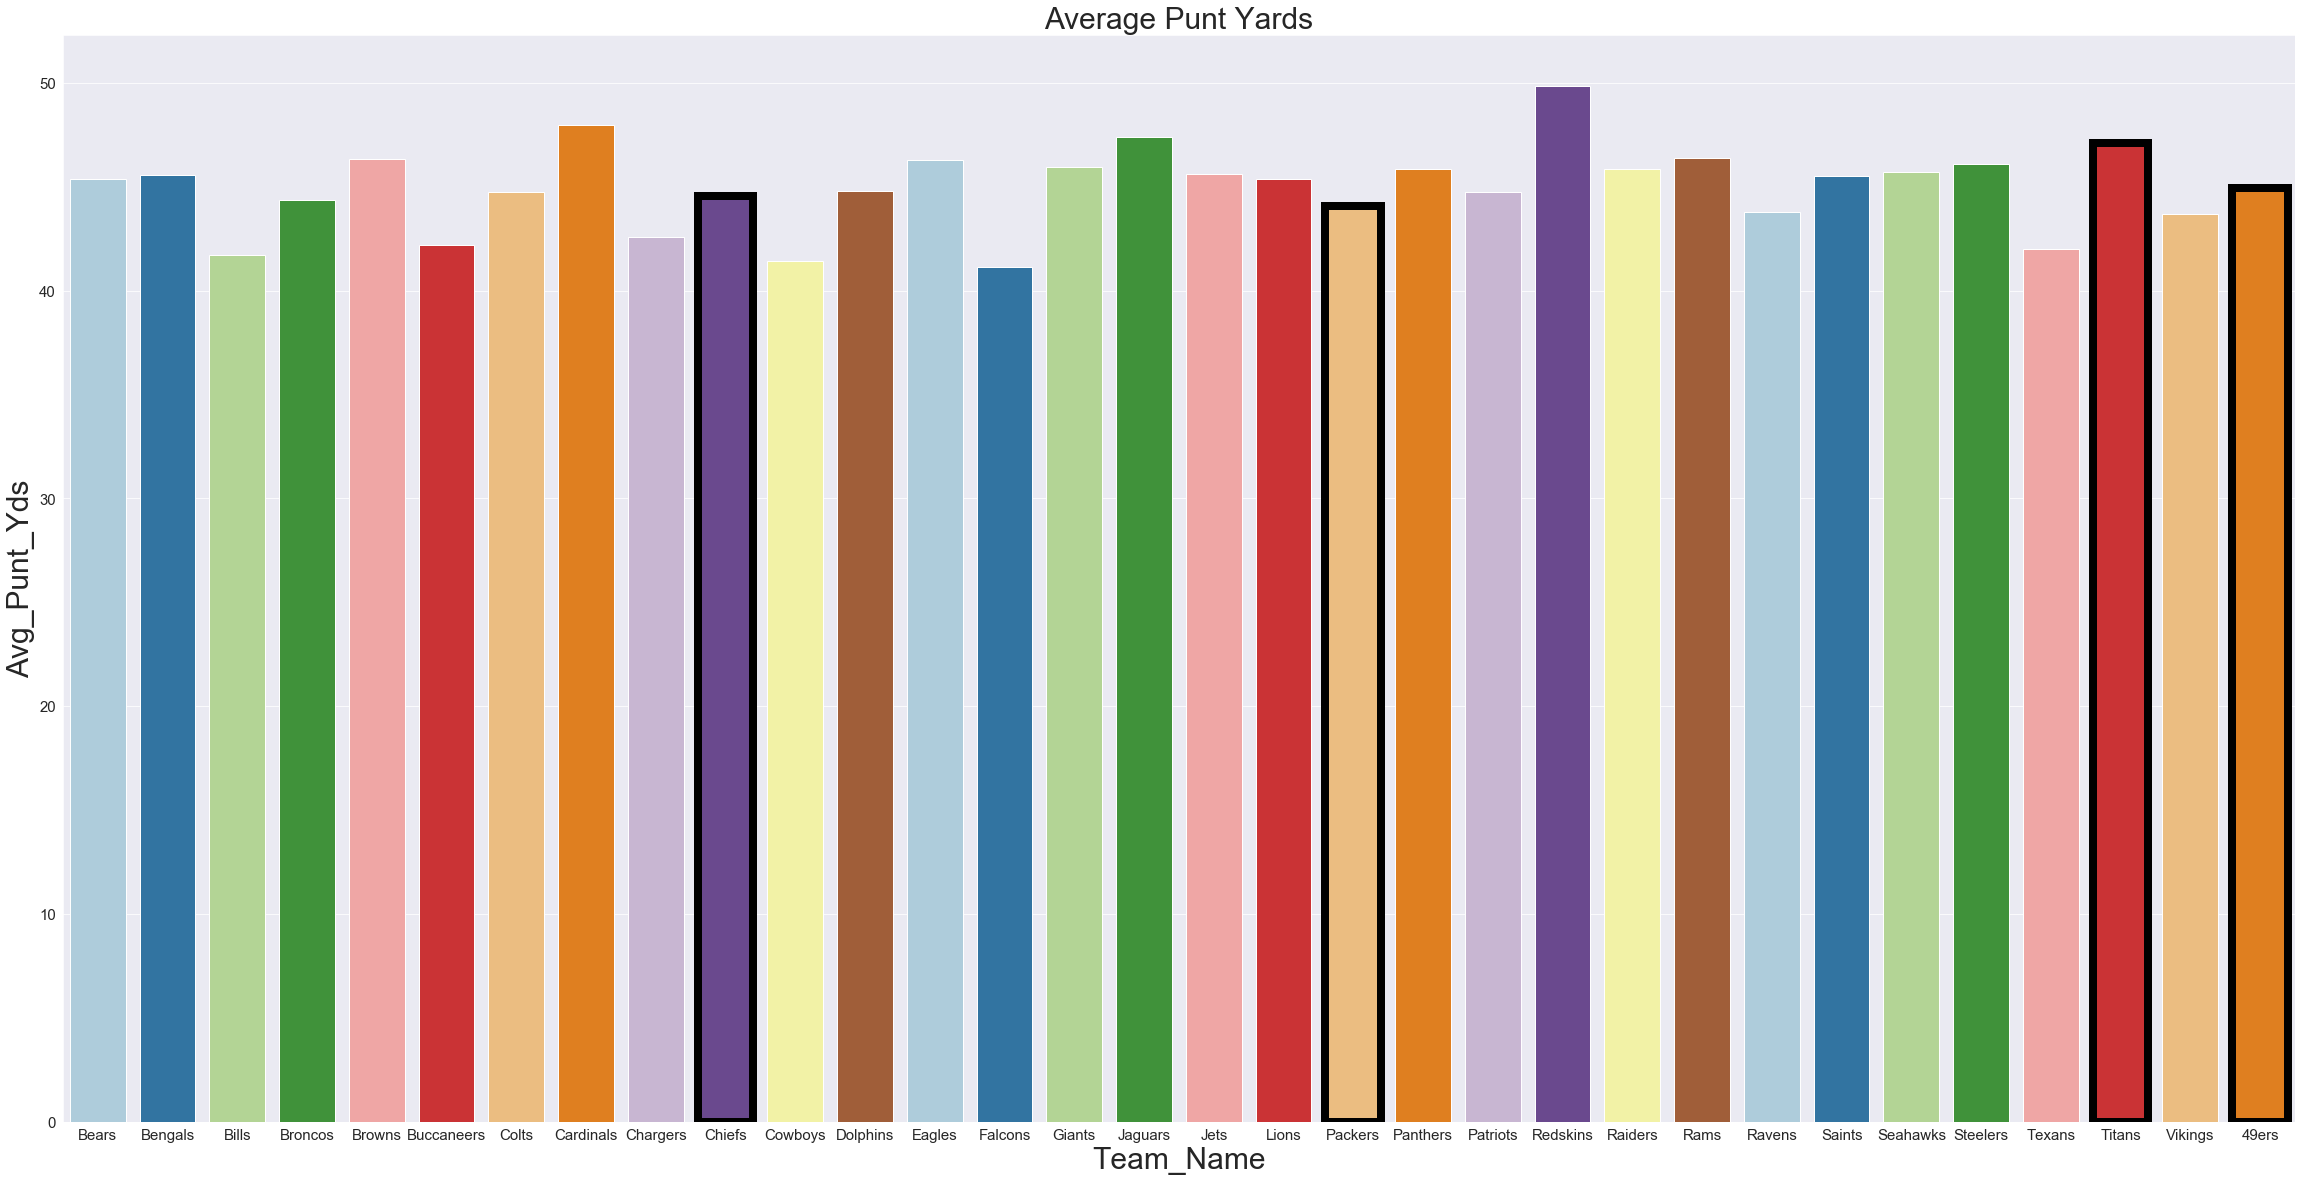

In [125]:
Punts = sns.barplot(x = data.Team_Name, y=data.loc[data.Week == 'Week_17']['Avg_Punt_Yds'],
           palette = sns.color_palette('Paired', 32))

Punts.set_title('Average Punt Yards')

for thisbar in Punts.patches:
    # Set a different hatch for each bar
    if thisbar == Punts.patches[9]:
        thisbar.set_edgecolor("black")
        thisbar.set_linewidth(8)
    elif thisbar == Punts.patches[18]:
        thisbar.set_edgecolor("black")
        thisbar.set_linewidth(8)
    elif thisbar == Punts.patches[29]:
        thisbar.set_edgecolor("black")
        thisbar.set_linewidth(8)
    elif thisbar == Punts.patches[31]:
        thisbar.set_edgecolor("black")
        thisbar.set_linewidth(8)  
    else:
        continue

for item in ([Punts.xaxis.label, Punts.yaxis.label]):
    item.set_fontsize(30)
    
for item in (Punts.get_xticklabels() + Punts.get_yticklabels()):
    item.set_fontsize(15)

##### Well, I wouldnt necessarily say punt yards don't matter BUT it seems like it's essentially automated at this point. 

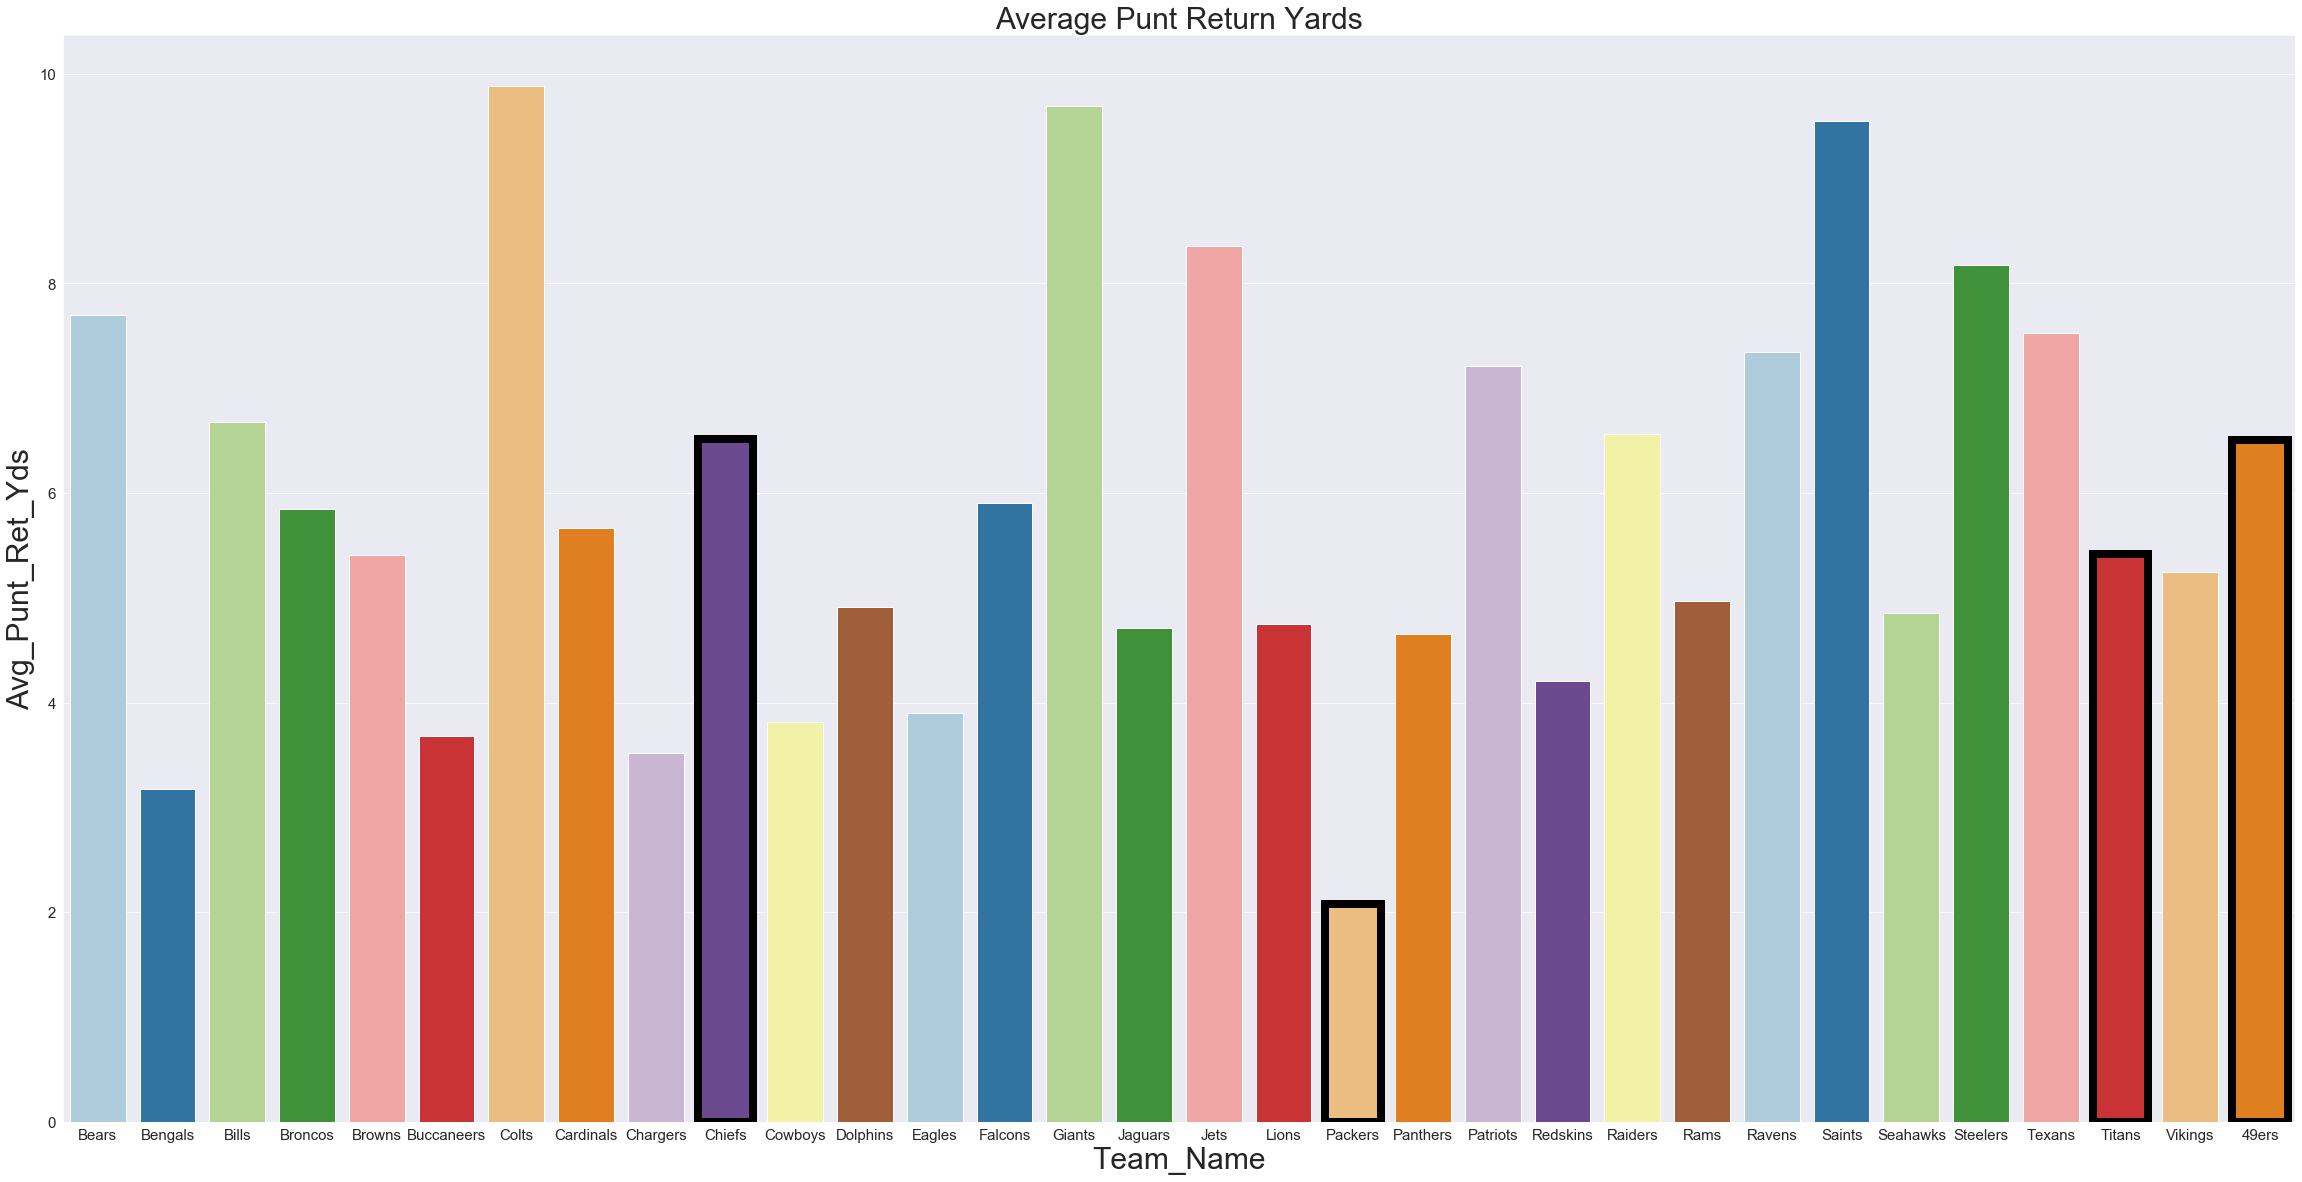

In [126]:
Punts = sns.barplot(x = data.Team_Name, y=data.loc[data.Week == 'Week_17']['Avg_Punt_Ret_Yds'],
           palette = sns.color_palette('Paired', 32))

Punts.set_title('Average Punt Return Yards')

for thisbar in Punts.patches:
    # Set a different hatch for each bar
    if thisbar == Punts.patches[9]:
        thisbar.set_edgecolor("black")
        thisbar.set_linewidth(8)
    elif thisbar == Punts.patches[18]:
        thisbar.set_edgecolor("black")
        thisbar.set_linewidth(8)
    elif thisbar == Punts.patches[29]:
        thisbar.set_edgecolor("black")
        thisbar.set_linewidth(8)
    elif thisbar == Punts.patches[31]:
        thisbar.set_edgecolor("black")
        thisbar.set_linewidth(8)  
    else:
        continue

for item in ([Punts.xaxis.label, Punts.yaxis.label]):
    item.set_fontsize(30)
    
for item in (Punts.get_xticklabels() + Punts.get_yticklabels()):
    item.set_fontsize(15)

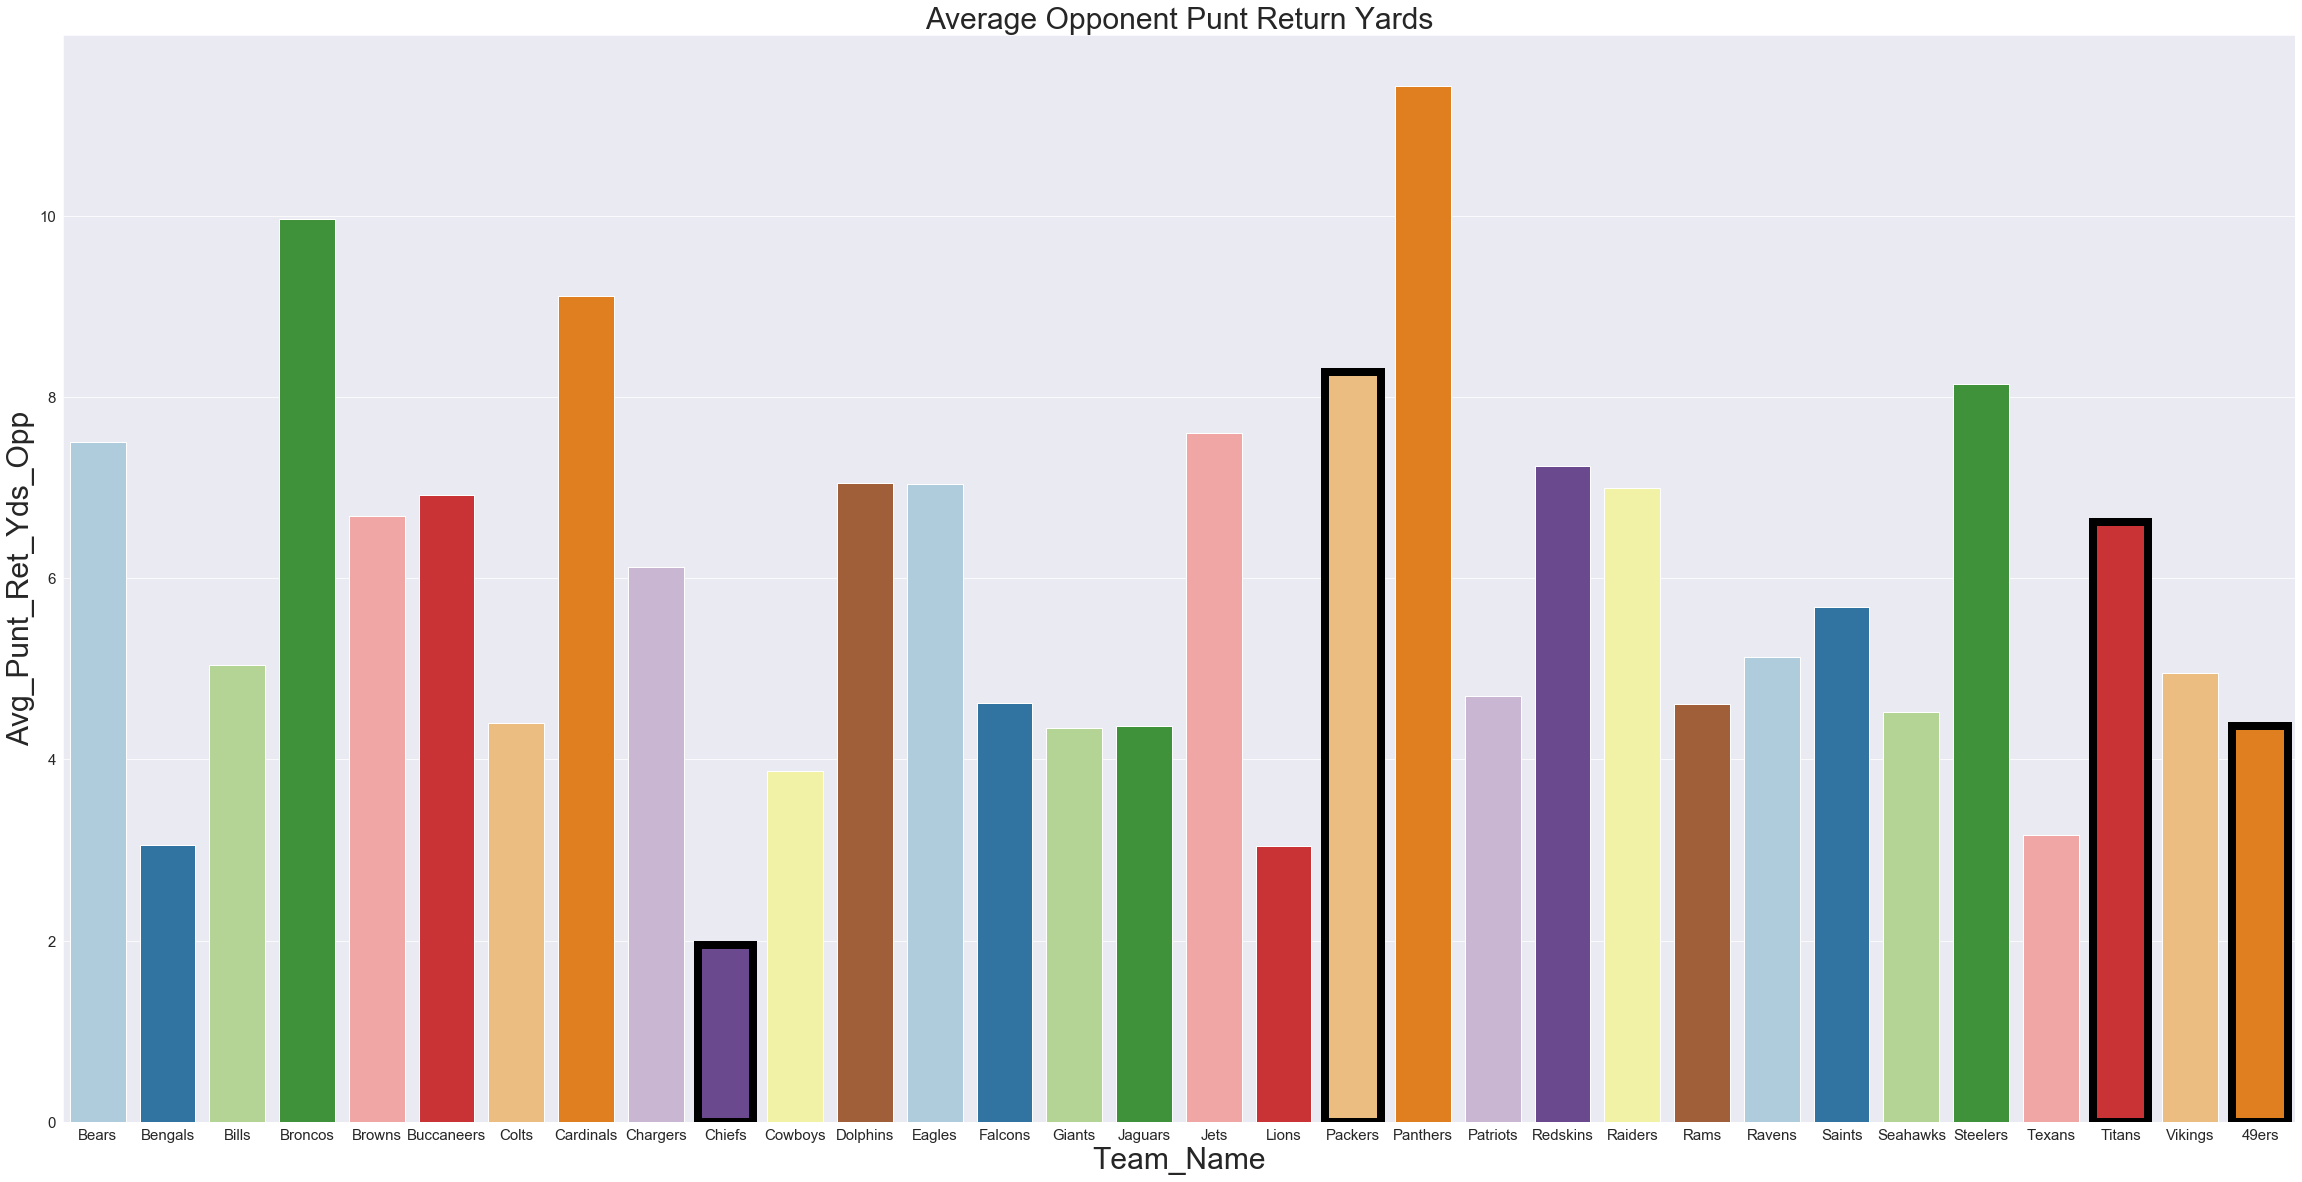

In [135]:
Punts = sns.barplot(x = data.Team_Name, y=data.loc[data.Week == 'Week_17']['Avg_Punt_Ret_Yds_Opp'],
           palette = sns.color_palette('Paired', 32))

Punts.set_title('Average Opponent Punt Return Yards')

for thisbar in Punts.patches:
    # Set a different hatch for each bar
    if thisbar == Punts.patches[9]:
        thisbar.set_edgecolor("black")
        thisbar.set_linewidth(8)
    elif thisbar == Punts.patches[18]:
        thisbar.set_edgecolor("black")
        thisbar.set_linewidth(8)
    elif thisbar == Punts.patches[29]:
        thisbar.set_edgecolor("black")
        thisbar.set_linewidth(8)
    elif thisbar == Punts.patches[31]:
        thisbar.set_edgecolor("black")
        thisbar.set_linewidth(8)  
    else:
        continue

for item in ([Punts.xaxis.label, Punts.yaxis.label]):
    item.set_fontsize(30)
    
for item in (Punts.get_xticklabels() + Punts.get_yticklabels()):
    item.set_fontsize(15)

##### I hesitate to put much weight in this no matter what because the scale only extends to ten yards which is overall insignificant. However, I'm even more convinced by the face that the teams who were playoff contenders are largely not in the top.

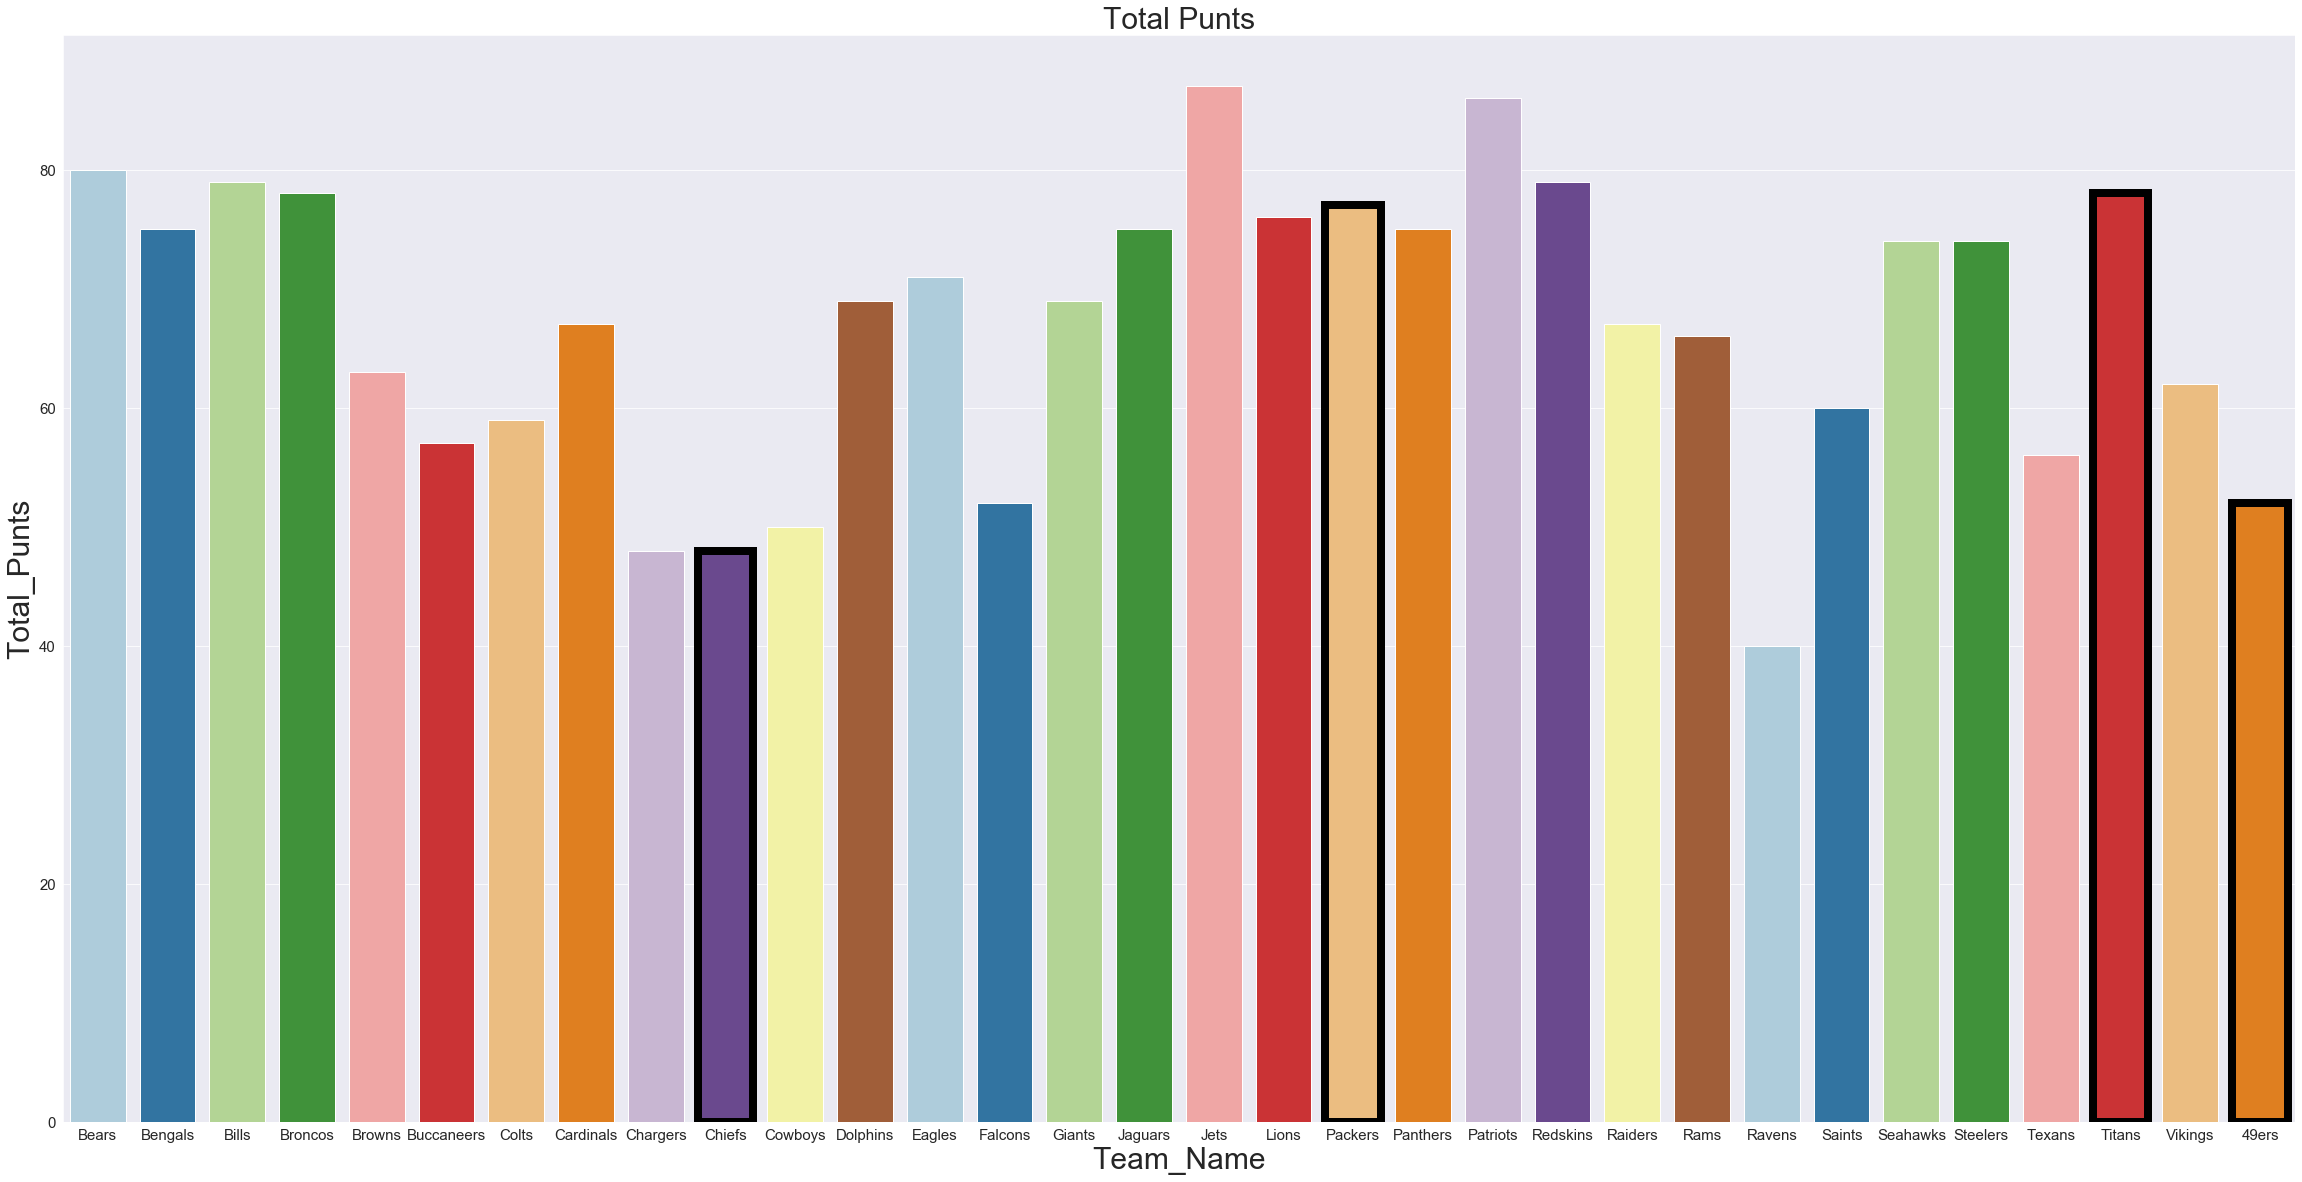

In [127]:
Punts = sns.barplot(x = data.Team_Name, y=data.loc[data.Week == 'Week_17']['Total_Punts'],
           palette = sns.color_palette('Paired', 32))

Punts.set_title('Total Punts')

for thisbar in Punts.patches:
    # Set a different hatch for each bar
    if thisbar == Punts.patches[9]:
        thisbar.set_edgecolor("black")
        thisbar.set_linewidth(8)
    elif thisbar == Punts.patches[18]:
        thisbar.set_edgecolor("black")
        thisbar.set_linewidth(8)
    elif thisbar == Punts.patches[29]:
        thisbar.set_edgecolor("black")
        thisbar.set_linewidth(8)
    elif thisbar == Punts.patches[31]:
        thisbar.set_edgecolor("black")
        thisbar.set_linewidth(8)  
    else:
        continue

for item in ([Punts.xaxis.label, Punts.yaxis.label]):
    item.set_fontsize(30)
    
for item in (Punts.get_xticklabels() + Punts.get_yticklabels()):
    item.set_fontsize(15)

##### Earlier we found that punts held a negative correlation with both points scored and total yards, however we're seeing here that two of our top four are in the upper section of the crowd. 

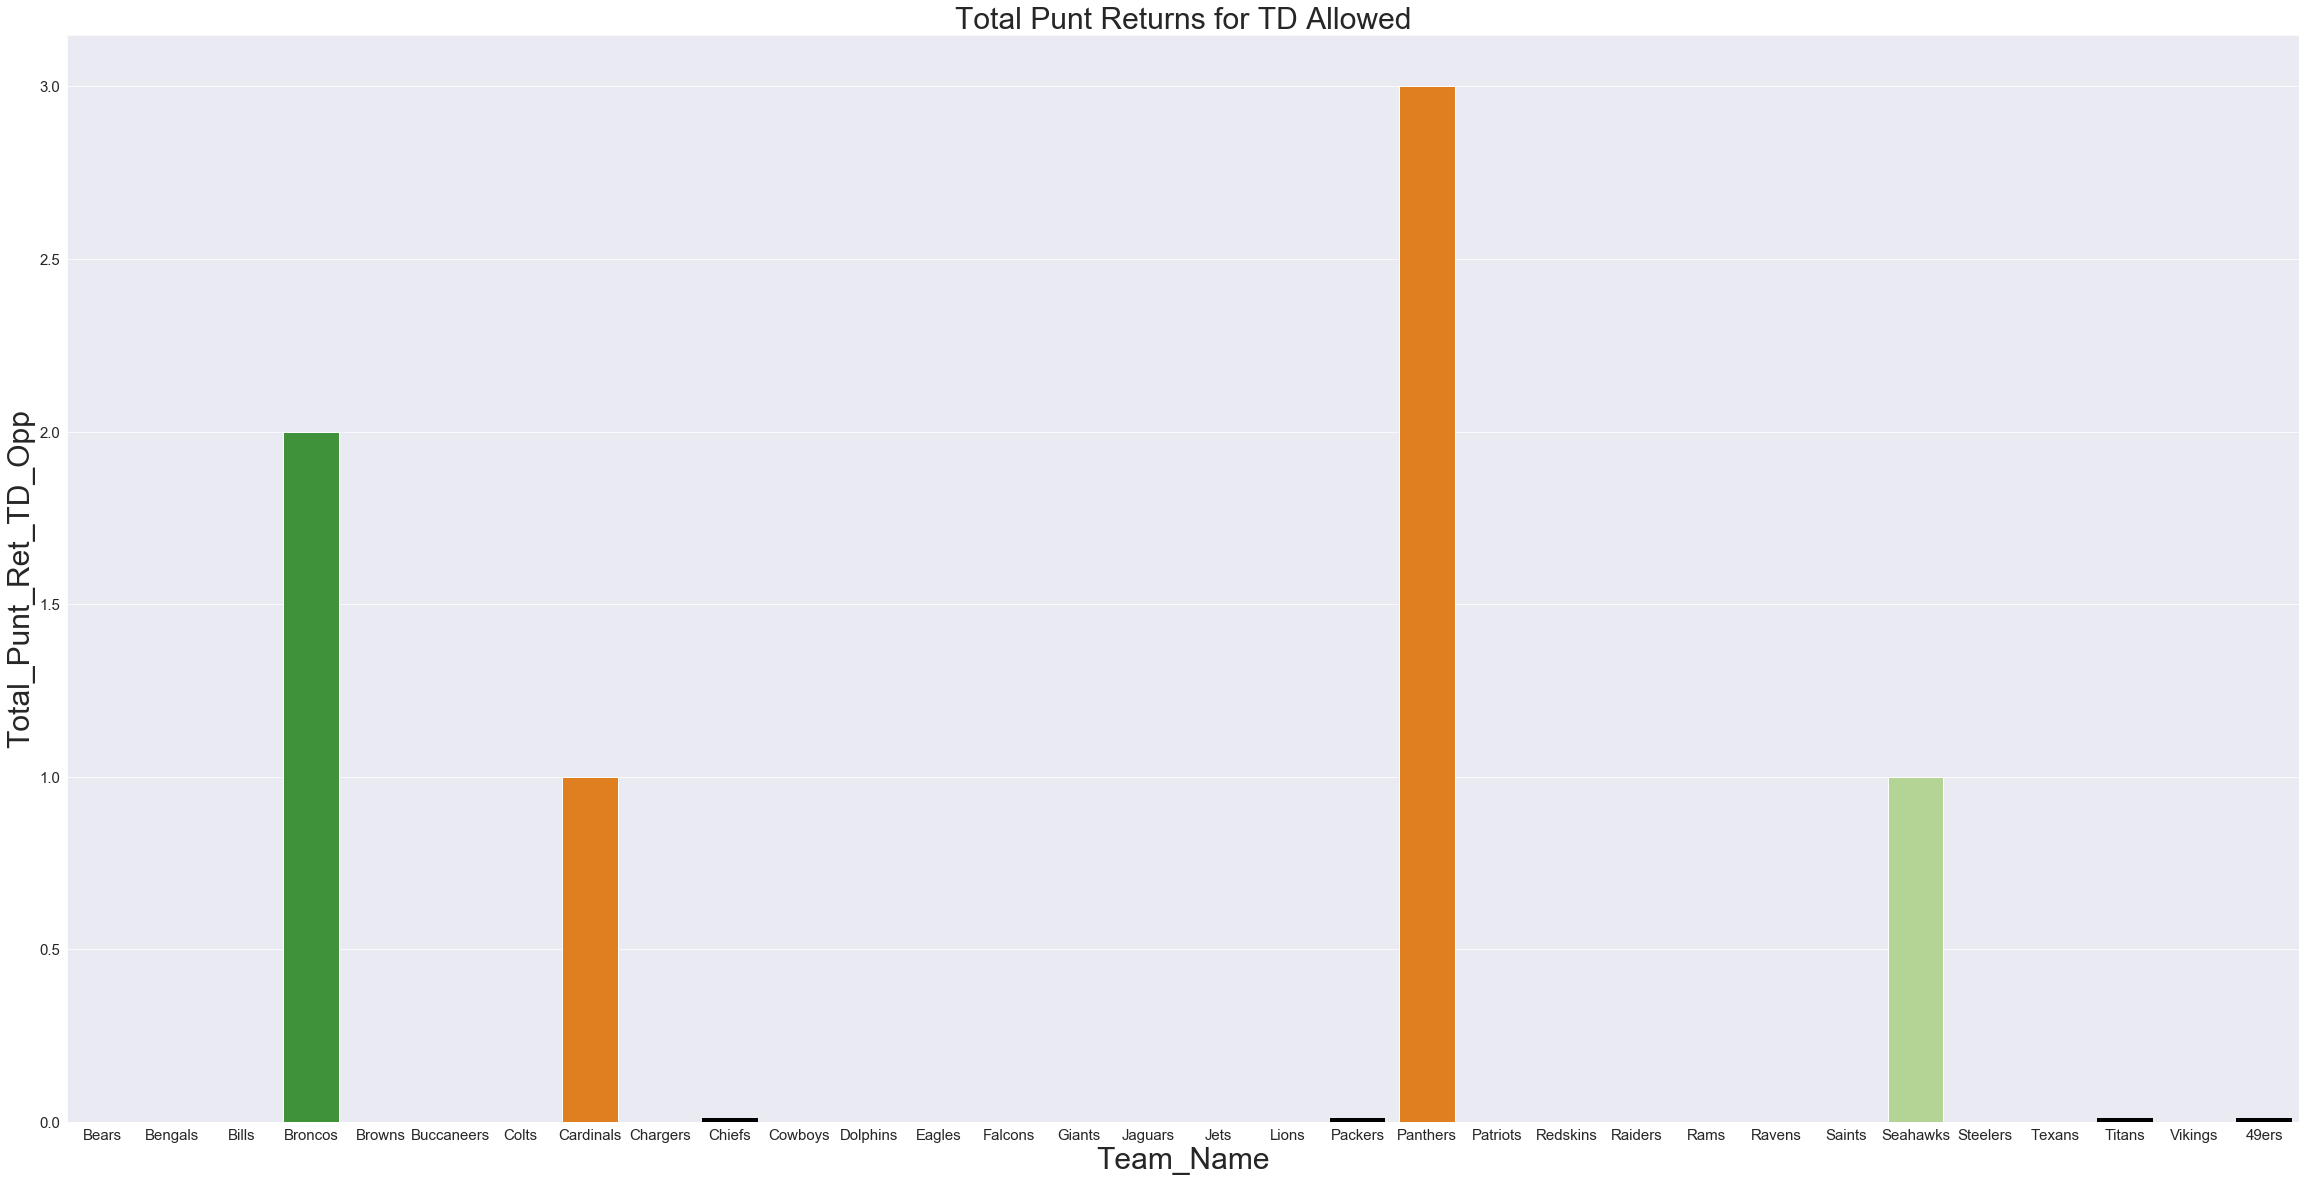

In [136]:
Punts = sns.barplot(x = data.Team_Name, y=data.loc[data.Week == 'Week_17']['Total_Punt_Ret_TD_Opp'],
           palette = sns.color_palette('Paired', 32))

Punts.set_title('Total Punt Returns for TD Allowed')

for thisbar in Punts.patches:
    # Set a different hatch for each bar
    if thisbar == Punts.patches[9]:
        thisbar.set_edgecolor("black")
        thisbar.set_linewidth(8)
    elif thisbar == Punts.patches[18]:
        thisbar.set_edgecolor("black")
        thisbar.set_linewidth(8)
    elif thisbar == Punts.patches[29]:
        thisbar.set_edgecolor("black")
        thisbar.set_linewidth(8)
    elif thisbar == Punts.patches[31]:
        thisbar.set_edgecolor("black")
        thisbar.set_linewidth(8)  
    else:
        continue

for item in ([Punts.xaxis.label, Punts.yaxis.label]):
    item.set_fontsize(30)
    
for item in (Punts.get_xticklabels() + Punts.get_yticklabels()):
    item.set_fontsize(15)

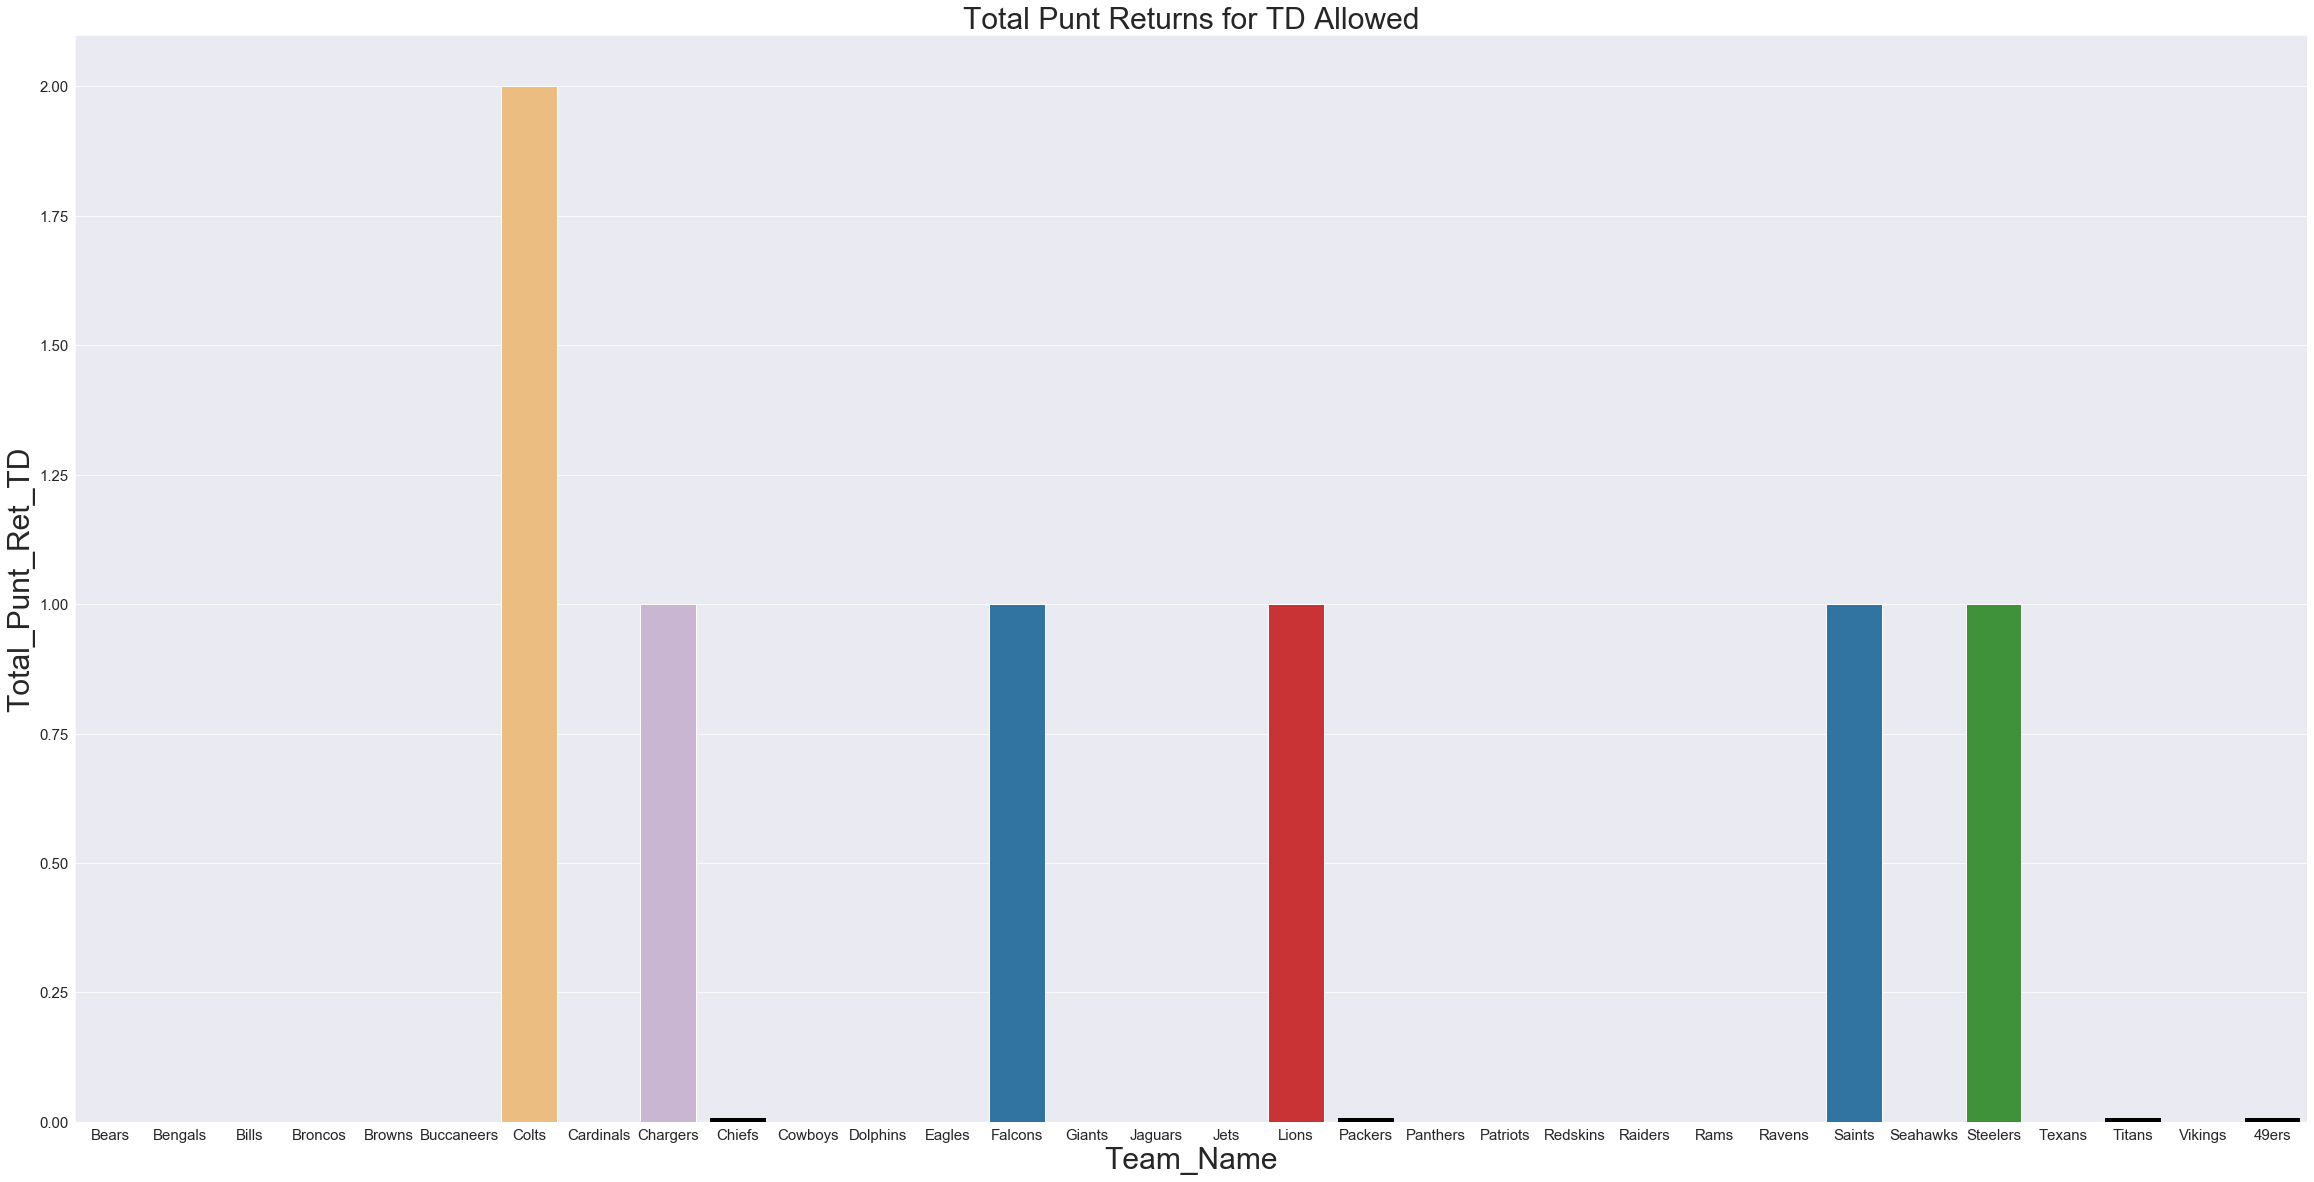

In [137]:
Punts = sns.barplot(x = data.Team_Name, y=data.loc[data.Week == 'Week_17']['Total_Punt_Ret_TD'],
           palette = sns.color_palette('Paired', 32))

Punts.set_title('Total Punt Returns for TD Allowed')

for thisbar in Punts.patches:
    # Set a different hatch for each bar
    if thisbar == Punts.patches[9]:
        thisbar.set_edgecolor("black")
        thisbar.set_linewidth(8)
    elif thisbar == Punts.patches[18]:
        thisbar.set_edgecolor("black")
        thisbar.set_linewidth(8)
    elif thisbar == Punts.patches[29]:
        thisbar.set_edgecolor("black")
        thisbar.set_linewidth(8)
    elif thisbar == Punts.patches[31]:
        thisbar.set_edgecolor("black")
        thisbar.set_linewidth(8)  
    else:
        continue

for item in ([Punts.xaxis.label, Punts.yaxis.label]):
    item.set_fontsize(30)
    
for item in (Punts.get_xticklabels() + Punts.get_yticklabels()):
    item.set_fontsize(15)

##### To the above two graphs - LOL.

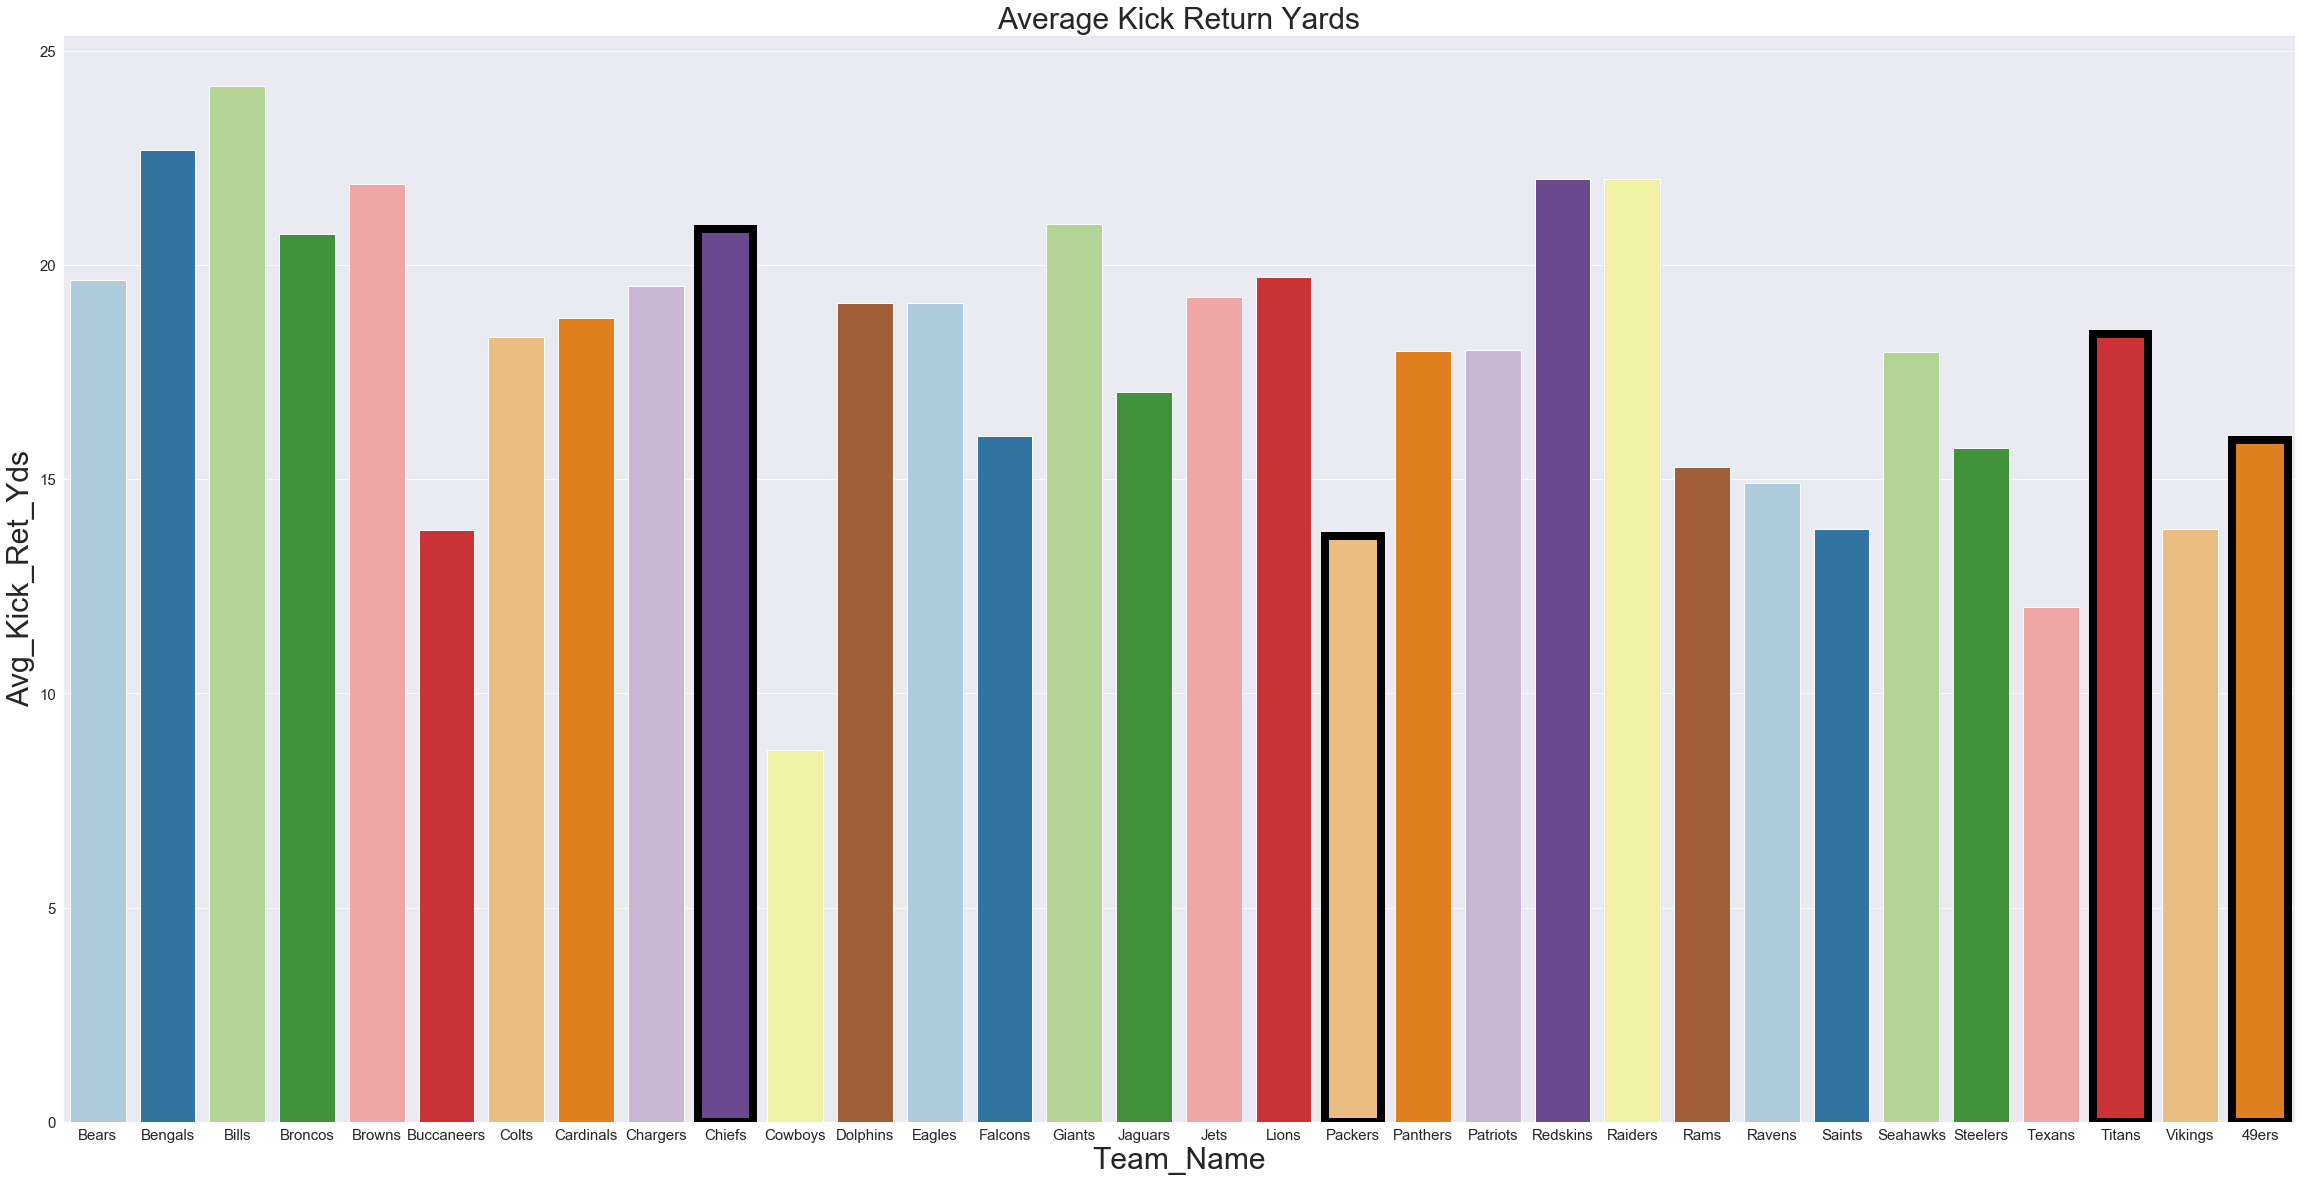

In [140]:
Kicks = sns.barplot(x = data.Team_Name, y=data.loc[data.Week == 'Week_17']['Avg_Kick_Ret_Yds'],
           palette = sns.color_palette('Paired', 32))

Kicks.set_title('Average Kick Return Yards')

for thisbar in Kicks.patches:
    # Set a different hatch for each bar
    if thisbar == Kicks.patches[9]:
        thisbar.set_edgecolor("black")
        thisbar.set_linewidth(8)
    elif thisbar == Kicks.patches[18]:
        thisbar.set_edgecolor("black")
        thisbar.set_linewidth(8)
    elif thisbar == Kicks.patches[29]:
        thisbar.set_edgecolor("black")
        thisbar.set_linewidth(8)
    elif thisbar == Kicks.patches[31]:
        thisbar.set_edgecolor("black")
        thisbar.set_linewidth(8)  
    else:
        continue

for item in ([Kicks.xaxis.label, Kicks.yaxis.label]):
    item.set_fontsize(30)
    
for item in (Kicks.get_xticklabels() + Kicks.get_yticklabels()):
    item.set_fontsize(15)

##### Once again, this doesn't demonstrate that kick returns don't matter but that they are quite automated. 

### Special Teams Summary

##### Finding no to few significant results in the special teams section does NOT mean they are not significant. What this means to me looking at this data is that the NFL has largely automated special teams, they're all fairly equally good at it so it's made it only consquential for some reason if you do not meet the standard. There are many statistical conversations about the use of special teams or not, but in general most NFL teams follow the same special teams patterns.

## Miscellaneous Information

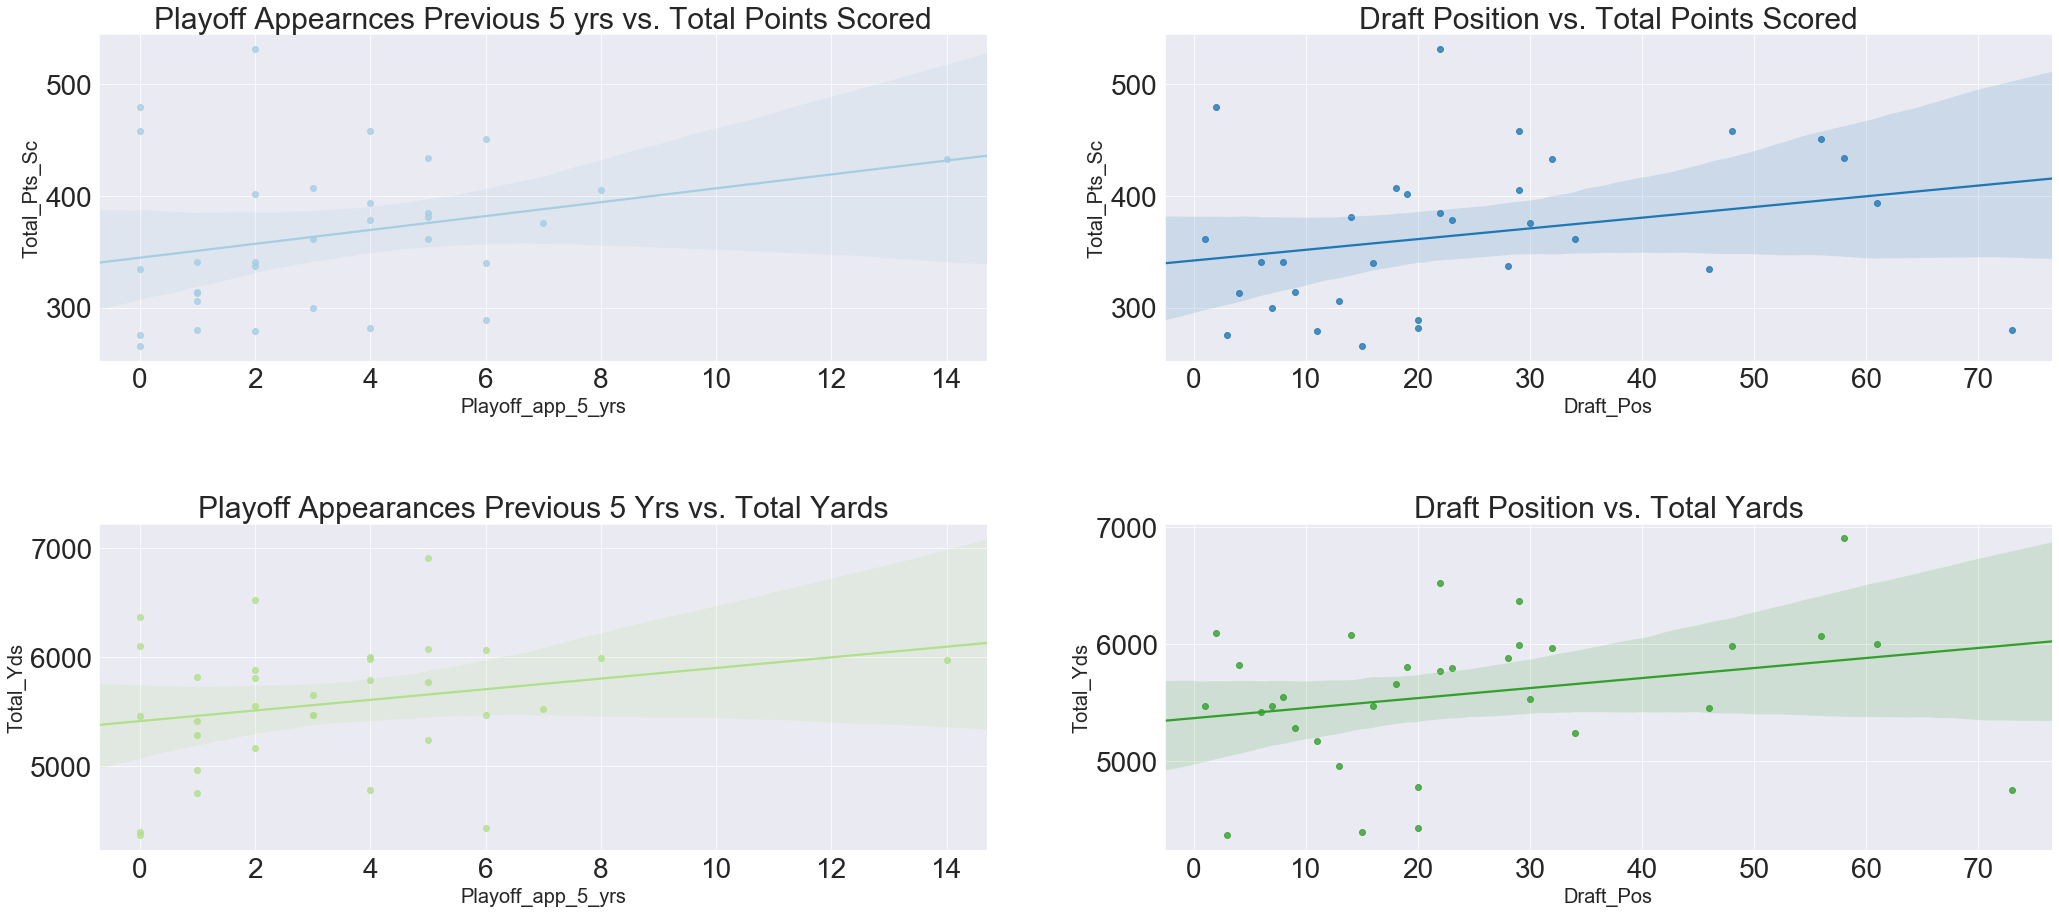

In [152]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(35,15))
palette = iter(sns.color_palette("Paired", 4))

plt.subplots_adjust(hspace = .5);
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["axes.titlesize"] = 30
plt.rcParams["xtick.labelsize"] = 28
plt.rcParams["ytick.labelsize"] = 28

sns.regplot(x = data.loc[data.Week == 'Week_17']['Playoff_app_5_yrs'], y=data.loc[data.Week == 'Week_17']['Total_Pts_Sc'], data=data, color = next(palette), 
                        ax=axs[0,0]).set_title('Playoff Appearnces Previous 5 yrs vs. Total Points Scored');
sns.regplot(x = data.loc[data.Week == 'Week_17']['Draft_Pos'], y=data.loc[data.Week == 'Week_17']['Total_Pts_Sc'], data=data,  color = next(palette),
            ax=axs[0,1]).set_title('Draft Position vs. Total Points Scored');
sns.regplot(x = data.loc[data.Week == 'Week_17']['Playoff_app_5_yrs'],y=data.loc[data.Week == 'Week_17']['Total_Yds'], data=data,  color = next(palette),
            ax=axs[1,0]).set_title('Playoff Appearances Previous 5 Yrs vs. Total Yards');
sns.regplot(x = data.loc[data.Week == 'Week_17']['Draft_Pos'],y=data.loc[data.Week == 'Week_17']['Total_Yds'], data=data,  color = next(palette),
            ax=axs[1,1]).set_title('Draft Position vs. Total Yards');


##### This largely makes sense. More playoff appearances will often correlate with a high draft position, as well as higher rates of success (correlating with more yardage and points scored). Not surprising but still interesting.

## Conclusions:

Although this analysis has outlined some interesting correlations, the biggest takeaway is that it is quite difficult to pin down any one or even five statistics that points to wins or loses. 